# Project Team Id : "PTID-CDS-JUL-23-1571"

# PRCP-1010-InsClaimPred

# TEAM MEMBERS
- Thirunavukkarasu K A (parthiru2651@gmail.com)
- Arjun M (0203arjun@gmail.com)
- Divya R (divyardivya2020@gmail.com)

# Problem Statement

Task 1:-
    Create a predictive model which will help the insurance marketing team to know which customer will buy the product.

Task 2:-
    Suggestions to the Insurance market team to make  customers  buy the product.


# Import Liberary

In [3]:
# IMPORT BASIC LIBRARIES
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
from scipy import stats 
import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [4]:
# LOAD DATA
data=pd.read_csv('train.csv')

In [23]:
data

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
0             7       0          2              2          5              1   
1             9       0          1              1          7              0   
2            13       0          5              4          9              1   
3            16       0          0              1          2              0   
4            17       0          0              2          0              1   
...         ...     ...        ...            ...        ...            ...   
595207  1488013       0          3              1         10              0   
595208  1488016       0          5              1          3              0   
595209  1488017       0          1              1         10              0   
595210  1488021       0          5              2          3              1   
595211  1488027       0          0              1          8              0   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  \
0                   0              0              1              0   
1                   0              0              0              1   
2                   0              0              0              1   
3                   0              1              0              0   
4                   0              1              0              0   
...               ...            ...            ...            ...   
595207              0              0              0              0   
595208              0              0              0              0   
595209              0              1              0              0   
595210              0              0              0              1   
595211              0              1              0              0   

        ps_ind_09_bin  ps_ind_10_bin  ps_ind_11_bin  ps_ind_12_bin  \
0                   0              0              0              0   
1                   0              0              0              0   
2                   0              0              0              0   
3                   0              0              0              0   
4                   0              0              0              0   
...               ...            ...            ...            ...   
595207              1              0              0              0   
595208              1              0              0              0   
595209              0              0              0              0   
595210              0              0              0              0   
595211              0              0              0              0   

        ps_ind_13_bin  ps_ind_14  ps_ind_15  ps_ind_16_bin  ps_ind_17_bin  \
0                   0          0         11              0              1   
1                   0          0          3              0              0   
2                   0          0         12              1              0   
3                   0          0          8              1              0   
4                   0          0          9              1              0   
...               ...        ...        ...            ...            ...   
595207              0          0         13              1              0   
595208              0          0          6              1              0   
595209              0          0         12              1              0   
595210              0          0         12              1              0   
595211              0          0          7              1              0   

        ps_ind_18_bin  ps_reg_01  ps_reg_02  ps_reg_03  ps_car_01_cat  \
0                   0        0.7        0.2   0.718070             10   
1                   1        0.8        0.4   0.766078             11   
2                   0        0.0        0.0  -1.000000              7   
3                   0        0.9        0.2   0.580948              7   
4                   0        0.7        0.6   0.840759             11   
...               .

# Basic Checks

In [24]:
# CHECKING HEADER
data.head()

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
0   7       0          2              2          5              1   
1   9       0          1              1          7              0   
2  13       0          5              4          9              1   
3  16       0          0              1          2              0   
4  17       0          0              2          0              1   

   ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ps_ind_09_bin  \
0              0              0              1              0              0   
1              0              0              0              1              0   
2              0              0              0              1              0   
3              0              1              0              0              0   
4              0              1              0              0              0   

   ps_ind_10_bin  ps_ind_11_bin  ps_ind_12_bin  ps_ind_13_bin  ps_ind_14  \
0              0              0              0              0          0   
1              0              0              0              0          0   
2              0              0              0              0          0   
3              0              0              0              0          0   
4              0              0              0              0          0   

   ps_ind_15  ps_ind_16_bin  ps_ind_17_bin  ps_ind_18_bin  ps_reg_01  \
0         11              0              1              0        0.7   
1          3              0              0              1        0.8   
2         12              1              0              0        0.0   
3          8              1              0              0        0.9   
4          9              1              0              0        0.7   

   ps_reg_02  ps_reg_03  ps_car_01_cat  ps_car_02_cat  ps_car_03_cat  \
0        0.2   0.718070             10              1             -1   
1        0.4   0.766078             11              1             -1   
2        0.0  -1.000000              7              1             -1   
3        0.2   0.580948              7              1              0   
4        0.6   0.840759             11              1             -1   

   ps_car_04_cat  ps_car_05_cat  ps_car_06_cat  ps_car_07_cat  ps_car_08_cat  \
0              0              1              4              1              0   
1              0             -1             11              1              1   
2              0             -1             14              1              1   
3              0              1             11              1              1   
4              0             -1             14              1              1   

   ps_car_09_cat  ps_car_10_cat  ps_car_11_cat  ps_car_11  ps_car_12  \
0              0              1             12          2   0.400000   
1              2              1             19          3   0.316228   
2              2              1             60          1   0.316228   
3              3              1            104          1   0.374166   
4              2              1             82          3   0.316070   

   ps_car_13  ps_car_14  ps_car_15  ps_calc_01  ps_calc_02  ps_calc_03  \
0   0.883679   0.370810   3.605551         0.6         0.5         0.2   
1   0.618817   0.388716   2.449490         0.3         0.1         0.3   
2   0.641586   0.347275   3.316625         0.5         0.7         0.1   
3   0.542949   0.294958   2.000000         0.6         0.9         0.1   
4   0.565832   0.365103   2.000000         0.4         0.6         0.0   

   ps_calc_04  ps_calc_05  ps_calc_06  ps_calc_07  ps_calc_08  ps_calc_09  \
0           3           1          10           1          10           1   
1           2           1           9           5           8           1   
2           2           2           9           1           8           2   
3           2           4           7           1           8           4   
4           2           2           6   

In [7]:
# USING SET OPTION TO DISPLAY MAX COLUMNS
data.head(pd.set_option('display.max_columns',None))

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
0             7       0          2              2          5              1   
1             9       0          1              1          7              0   
2            13       0          5              4          9              1   
3            16       0          0              1          2              0   
4            17       0          0              2          0              1   
...         ...     ...        ...            ...        ...            ...   
595207  1488013       0          3              1         10              0   
595208  1488016       0          5              1          3              0   
595209  1488017       0          1              1         10              0   
595210  1488021       0          5              2          3              1   
595211  1488027       0          0              1          8              0   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  \
0                   0              0              1              0   
1                   0              0              0              1   
2                   0              0              0              1   
3                   0              1              0              0   
4                   0              1              0              0   
...               ...            ...            ...            ...   
595207              0              0              0              0   
595208              0              0              0              0   
595209              0              1              0              0   
595210              0              0              0              1   
595211              0              1              0              0   

        ps_ind_09_bin  ps_ind_10_bin  ps_ind_11_bin  ps_ind_12_bin  \
0                   0              0              0              0   
1                   0              0              0              0   
2                   0              0              0              0   
3                   0              0              0              0   
4                   0              0              0              0   
...               ...            ...            ...            ...   
595207              1              0              0              0   
595208              1              0              0              0   
595209              0              0              0              0   
595210              0              0              0              0   
595211              0              0              0              0   

        ps_ind_13_bin  ps_ind_14  ps_ind_15  ps_ind_16_bin  ps_ind_17_bin  \
0                   0          0         11              0              1   
1                   0          0          3              0              0   
2                   0          0         12              1              0   
3                   0          0          8              1              0   
4                   0          0          9              1              0   
...               ...        ...        ...            ...            ...   
595207              0          0         13              1              0   
595208              0          0          6              1              0   
595209              0          0         12              1              0   
595210              0          0         12              1              0   
595211              0          0          7              1              0   

        ps_ind_18_bin  ps_reg_01  ps_reg_02  ps_reg_03  ps_car_01_cat  \
0                   0        0.7        0.2   0.718070             10   
1                   1        0.8        0.4   0.766078             11   
2                   0        0.0        0.0  -1.000000              7   
3                   0        0.9        0.2   0.580948              7   
4                   0        0.7        0.6   0.840759             11   
...               .

In [8]:
# CHECKING LAST 5 ROWS
data.tail()

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
595207  1488013       0          3              1         10              0   
595208  1488016       0          5              1          3              0   
595209  1488017       0          1              1         10              0   
595210  1488021       0          5              2          3              1   
595211  1488027       0          0              1          8              0   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  \
595207              0              0              0              0   
595208              0              0              0              0   
595209              0              1              0              0   
595210              0              0              0              1   
595211              0              1              0              0   

        ps_ind_09_bin  ps_ind_10_bin  ps_ind_11_bin  ps_ind_12_bin  \
595207              1              0              0              0   
595208              1              0              0              0   
595209              0              0              0              0   
595210              0              0              0              0   
595211              0              0              0              0   

        ps_ind_13_bin  ps_ind_14  ps_ind_15  ps_ind_16_bin  ps_ind_17_bin  \
595207              0          0         13              1              0   
595208              0          0          6              1              0   
595209              0          0         12              1              0   
595210              0          0         12              1              0   
595211              0          0          7              1              0   

        ps_ind_18_bin  ps_reg_01  ps_reg_02  ps_reg_03  ps_car_01_cat  \
595207              0        0.5        0.3   0.692820             10   
595208              0        0.9        0.7   1.382027              9   
595209              0        0.9        0.2   0.659071              7   
595210              0        0.9        0.4   0.698212             11   
595211              0        0.1        0.2  -1.000000              7   

        ps_car_02_cat  ps_car_03_cat  ps_car_04_cat  ps_car_05_cat  \
595207              1             -1              0              1   
595208              1             -1              0             -1   
595209              1             -1              0             -1   
595210              1             -1              0             -1   
595211              0             -1              0             -1   

        ps_car_06_cat  ps_car_07_cat  ps_car_08_cat  ps_car_09_cat  \
595207              1              1              1              0   
595208             15              0              0              2   
595209              1              1              1              2   
595210             11              1              1              2   
595211              0              1              0              2   

        ps_car_10_cat  ps_car_11_cat  ps_car_11  ps_car_12  ps_car_13  \
595207              1             31          3   0.374166   0.684631   
595208              1             63          2   0.387298   0.972145   
595209              1             31          3   0.397492   0.596373   
595210              1            101          3   0.374166   0.764434   
595211              1             34          2   0.400000   0.932649   

        ps_car_14  ps_car_15  ps_calc_01  ps_calc_02  ps_calc_03  ps_calc_04  \
595207   0.385487   2.645751         0.4         0.5         0.3           3   
595208  -1.000000   3.605551         0.2         0.2         0.0           2   
595209   0.398748   1.732051         0.4         0.0         0.3           3   
595210   0.384968   3.162278         0.0         0.7         0.0           4   
595211   0.378021   3.741657         0.4         0.0         0.5           2   

        ps_calc_05  ps_calc_06  

In [9]:
# CHECKING SHAPE OF DATA SET
data.shape

(595212, 59)

- 595212 ROWS AND 59 COLUMNS (FEATURES) IN THE GIVEN DATASET

In [10]:
# CHECKING FEATURE NAME
data.columns

Index(['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14',
       'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04',
       'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09',
       'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14',
       'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin', 'ps_calc_20_bin'],


In [11]:
# CHECKING FEATURE INFORMATION
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

- NO MISSING VALUES
- 49 int value and 10 float value

In [12]:
# CHECKING STATASTICAL INFORMATION
data.describe()

id         target      ps_ind_01  ps_ind_02_cat  \
count  5.952120e+05  595212.000000  595212.000000  595212.000000   
mean   7.438036e+05       0.036448       1.900378       1.358943   
std    4.293678e+05       0.187401       1.983789       0.664594   
min    7.000000e+00       0.000000       0.000000      -1.000000   
25%    3.719915e+05       0.000000       0.000000       1.000000   
50%    7.435475e+05       0.000000       1.000000       1.000000   
75%    1.115549e+06       0.000000       3.000000       2.000000   
max    1.488027e+06       1.000000       7.000000       4.000000   

           ps_ind_03  ps_ind_04_cat  ps_ind_05_cat  ps_ind_06_bin  \
count  595212.000000  595212.000000  595212.000000  595212.000000   
mean        4.423318       0.416794       0.405188       0.393742   
std         2.699902       0.493311       1.350642       0.488579   
min         0.000000      -1.000000      -1.000000       0.000000   
25%         2.000000       0.000000       0.000000       0.000000   
50%         4.000000       0.000000       0.000000       0.000000   
75%         6.000000       1.000000       0.000000       1.000000   
max        11.000000       1.000000       6.000000       1.000000   

       ps_ind_07_bin  ps_ind_08_bin  ps_ind_09_bin  ps_ind_10_bin  \
count  595212.000000  595212.000000  595212.000000  595212.000000   
mean        0.257033       0.163921       0.185304       0.000373   
std         0.436998       0.370205       0.388544       0.019309   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         1.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

       ps_ind_11_bin  ps_ind_12_bin  ps_ind_13_bin      ps_ind_14  \
count  595212.000000  595212.000000  595212.000000  595212.000000   
mean        0.001692       0.009439       0.000948       0.012451   
std         0.041097       0.096693       0.030768       0.127545   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       4.000000   

           ps_ind_15  ps_ind_16_bin  ps_ind_17_bin  ps_ind_18_bin  \
count  595212.000000  595212.000000  595212.000000  595212.000000   
mean        7.299922       0.660823       0.121081       0.153446   
std         3.546042       0.473430       0.326222       0.360417   
min         0.000000       0.000000       0.000000       0.000000   
25%         5.000000       0.000000       0.000000       0.000000   
50%         7.000000       1.000000       0.000000       0.000000   
75%        10.000000       1.000000       0.000000       0.000000   
max        13.000000       1.000000       1.000000       1.000000   

           ps_reg_01      ps_reg_02      ps_reg_03  ps_car_01_cat  \
count  595212.000000  595212.000000  595212.000000  595212.000000   
mean        0.610991       0.439184       0.551102       8.295933   
std         0.287643       0.404264       0.793506       2.508270   
min         0.000000       0.000000      -1.000000      -1.000000   
25%         0.400000       0.200000       0.525000       7.000000   
50%         0.700000       0.300000       0.720677       7.000000   
75%         0.900000       0.600000       1.000000      11.000000   
max         0.900000       1.800000       4.037945      11.000000   

       ps_car_02_cat  ps_car_03_cat  ps_car_04_cat  ps_car_05_cat  \
count  595212.000000  595212.000000  595212.000000  595212.000000   
mean        0.829931      -0.504899       0.725192      -0.157732   
std         0.375716       0.788654       2.153463       0.844417   
min        -1.0000

In [13]:
data.describe().T

count           mean            std       min  \
id              595212.0  743803.558435  429367.820429  7.000000   
target          595212.0       0.036448       0.187401  0.000000   
ps_ind_01       595212.0       1.900378       1.983789  0.000000   
ps_ind_02_cat   595212.0       1.358943       0.664594 -1.000000   
ps_ind_03       595212.0       4.423318       2.699902  0.000000   
ps_ind_04_cat   595212.0       0.416794       0.493311 -1.000000   
ps_ind_05_cat   595212.0       0.405188       1.350642 -1.000000   
ps_ind_06_bin   595212.0       0.393742       0.488579  0.000000   
ps_ind_07_bin   595212.0       0.257033       0.436998  0.000000   
ps_ind_08_bin   595212.0       0.163921       0.370205  0.000000   
ps_ind_09_bin   595212.0       0.185304       0.388544  0.000000   
ps_ind_10_bin   595212.0       0.000373       0.019309  0.000000   
ps_ind_11_bin   595212.0       0.001692       0.041097  0.000000   
ps_ind_12_bin   595212.0       0.009439       0.096693  0.000000   
ps_ind_13_bin   595212.0       0.000948       0.030768  0.000000   
ps_ind_14       595212.0       0.012451       0.127545  0.000000   
ps_ind_15       595212.0       7.299922       3.546042  0.000000   
ps_ind_16_bin   595212.0       0.660823       0.473430  0.000000   
ps_ind_17_bin   595212.0       0.121081       0.326222  0.000000   
ps_ind_18_bin   595212.0       0.153446       0.360417  0.000000   
ps_reg_01       595212.0       0.610991       0.287643  0.000000   
ps_reg_02       595212.0       0.439184       0.404264  0.000000   
ps_reg_03       595212.0       0.551102       0.793506 -1.000000   
ps_car_01_cat   595212.0       8.295933       2.508270 -1.000000   
ps_car_02_cat   595212.0       0.829931       0.375716 -1.000000   
ps_car_03_cat   595212.0      -0.504899       0.788654 -1.000000   
ps_car_04_cat   595212.0       0.725192       2.153463  0.000000   
ps_car_05_cat   595212.0      -0.157732       0.844417 -1.000000   
ps_car_06_cat   595212.0       6.555340       5.501445  0.000000   
ps_car_07_cat   595212.0       0.910027       0.347106 -1.000000   
ps_car_08_cat   595212.0       0.832080       0.373796  0.000000   
ps_car_09_cat   595212.0       1.328890       0.978747 -1.000000   
ps_car_10_cat   595212.0       0.992136       0.091619  0.000000   
ps_car_11_cat   595212.0      62.215674      33.012455  1.000000   
ps_car_11       595212.0       2.346072       0.832548 -1.000000   
ps_car_12       595212.0       0.379945       0.058327 -1.000000   
ps_car_13       595212.0       0.813265       0.224588  0.250619   
ps_car_14       595212.0       0.276256       0.357154 -1.000000   
ps_car_15       595212.0       3.065899       0.731366  0.000000   
ps_calc_01      595212.0       0.449756       0.287198  0.000000   
ps_calc_02      595212.0       0.449589       0.286893  0.000000   
ps_calc_03      595212.0       0.449849       0.287153  0.000000   
ps_calc_04      595212.0       2.372081       1.117219  0.000000   
ps_calc_05      595212.0       1.885886       1.134927  0.000000   
ps_calc_06      595212.0       7.689445       1.334312  0.000000   
ps_calc_07      595212.0       3.005823       1.414564  0.000000   
ps_calc_08      595212.0       9.225904       1.459672  2.000000   
ps_calc_09      595212.0       2.339034       1.246949  0.000000   
ps_calc_10      595212.0       8.433590       2.904597  0.000000   
ps_calc_11      595212.0       5.441382       2.332871  0.000000   
ps_calc_12      595212.0       1.441918       1.202963  0.000000   
ps_calc_13      595212.0       2.872288       1.694887  0.000000   
ps_calc_14      595212.0       7.539026       2.746652  0.000000   
ps_calc_15_bin  595212.0       0.122427       0.327779  0.000000   
ps_calc_16_bin  595212.0       0.627840       0.483381  0.000000   
ps_calc_17_bin  595212.0       0.554182       0.497056  0.000000   
ps_calc_18_bin  595212.0       0.287182       0.452447  0.000000   
ps_calc_19_bin  595212.0       0.349024       0.476662  0.000000   
ps_calc

# DOMAIN ANALYSIS

- target            - categorical column which shows customer buy the product or not
- ps_ind_01         - Indivudual_01
- ps_ind_02_cat     - Indivudul_01 in categorical
- ps_ind_03         - Indivudual_03
- ps_ind_04_cat     - Indivudul_04 in categorical
- ps_ind_05_cat     - Indivudul_05 in categorical
- ps_ind_06_bin     - Indivudul_06 in Binary
- ps_ind_07_bin     - Indivudul_07 in Binary
- ps_ind_08_bin     - Indivudul_08 in Binary
- ps_ind_09_bin     - Indivudul_09 in Binary
- ps_ind_10_bin     - Indivudul_10 in Binary
- ps_ind_11_bin     - Indivudul_11 in Binary
- ps_ind_12_bin     - Indivudul_12 in Binary
- ps_ind_13_bin     - Indivudul_13 in Binary
- ps_ind_14         - Indivudul_14
- ps_ind_15         - Indivudul_15
- ps_ind_16_bin     - Indivudul_16 in Binary
- ps_ind_17_bin     - Indivudul_17 in Binary
- ps_ind_18_bin     - Indivudul_18 in Binary
- ps_reg_01         - Region_01
- ps_reg_02         - Region_02
- ps_reg_03         - Region_03
- ps_car_01_cat     - Car_01 categrical
- ps_car_02_cat     - Car_02 categrical
- ps_car_03_cat     - Car_03 categrical
- ps_car_04_cat     - Car_04 categrical
- ps_car_05_cat     - Car_05 categrical
- ps_car_06_cat     - Car_06 categrical
- ps_car_07_cat     - Car_07 categrical
- ps_car_08_cat     - Car_08 categrical
- ps_car_09_cat     - Car_09 categrical
- ps_car_10_cat     - Car_10 categrical
- ps_car_11_cat     - Car_11 categrical
- ps_car_11         - Car_11
- ps_car_12         - Car_12
- ps_car_13         - Car_13
- ps_car_14         - Car_14
- ps_car_15         - Car_15
- ps_calc_01        - Calculator_01
- ps_calc_02        - Calculator_02
- ps_calc_03        - Calculator_03
- ps_calc_04        - Calculator_04
- ps_calc_05        - Calculator_05
- ps_calc_06        - Calculator_06
- ps_calc_07        - Calculator_07
- ps_calc_08        - Calculator_08
- ps_calc_09        - Calculator_09
- ps_calc_10        - Calculator_10
- ps_calc_11        - Calculator_11
- ps_calc_12        - Calculator_12
- ps_calc_13        - Calculator_13
- ps_calc_14        - Calculator_14
- ps_calc_15_bin    - Calculator_15 binary
- ps_calc_16_bin    - Calculator_16 binary
- ps_calc_17_bin    - Calculator_17 binary
- ps_calc_18_bin    - Calculator_18 binary
- ps_calc_19_bin    - Calculator_19 binary
- ps_calc_20_bin    - Calculator_20 binary

# EDA

## UNIVARIATE 

# Sweetviz Report

In [5]:
# APPLYING SWEETVIZ REPORT
import sweetviz as sv

MY_REPORT = sv.analyze(data)

MY_REPORT.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
# CHECKING OUTLIERS USING BOXPLOT
plt.figure(figsize=(40,160), facecolor='white')
plotnumber=1

for i in data:
    if plotnumber<60:
        plot=plt.subplot(15,4,plotnumber)
        sns.boxplot(x=data[i])
    plotnumber+=1
plt.tight_layout()

In [ ]:
# CHECKING DISTRIBUTION OF THE FEATURES USING HISTOGRAM PLOT

plt.figure(figsize=(40,160), facecolor='white')
plotnumber=1

for i in data:
    if plotnumber<60:
        plot=plt.subplot(15,4,plotnumber)
        sns.histplot(x=data[i],hue=data.target,kde=True)
        plt.xlabel(i,fontsize=30)
        plt.ylabel('target',fontsize=30)
    plotnumber+=1
plt.tight_layout()

# Data Preprocessing

In [15]:
# CHE4CKING 1st ROW ONLY
data.head(1)

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
0   7       0          2              2          5              1   

   ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ps_ind_09_bin  \
0              0              0              1              0              0   

   ps_ind_10_bin  ps_ind_11_bin  ps_ind_12_bin  ps_ind_13_bin  ps_ind_14  \
0              0              0              0              0          0   

   ps_ind_15  ps_ind_16_bin  ps_ind_17_bin  ps_ind_18_bin  ps_reg_01  \
0         11              0              1              0        0.7   

   ps_reg_02  ps_reg_03  ps_car_01_cat  ps_car_02_cat  ps_car_03_cat  \
0        0.2    0.71807             10              1             -1   

   ps_car_04_cat  ps_car_05_cat  ps_car_06_cat  ps_car_07_cat  ps_car_08_cat  \
0              0              1              4              1              0   

   ps_car_09_cat  ps_car_10_cat  ps_car_11_cat  ps_car_11  ps_car_12  \
0              0              1             12          2        0.4   

   ps_car_13  ps_car_14  ps_car_15  ps_calc_01  ps_calc_02  ps_calc_03  \
0   0.883679    0.37081   3.605551         0.6         0.5         0.2   

   ps_calc_04  ps_calc_05  ps_calc_06  ps_calc_07  ps_calc_08  ps_calc_09  \
0           3           1          10           1          10           1   

   ps_calc_10  ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  ps_calc_15_bin  \
0           5           9           1           5           8               0   

   ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  ps_calc_19_bin  \
0               1               1               0               0   

   ps_calc_20_bin  
0               1

## CHECKING OUTLIERS

## ps_ind_01

In [15]:
# CHECKING MISSING VALUES ON "PS_IND_01"
data['ps_ind_01'].isnull().sum()

0

In [16]:
data.ps_ind_01.value_counts()

0    187594
1    143984
2     82468
5     61464
3     51193
4     33524
6     17682
7     17303
Name: ps_ind_01, dtype: int64

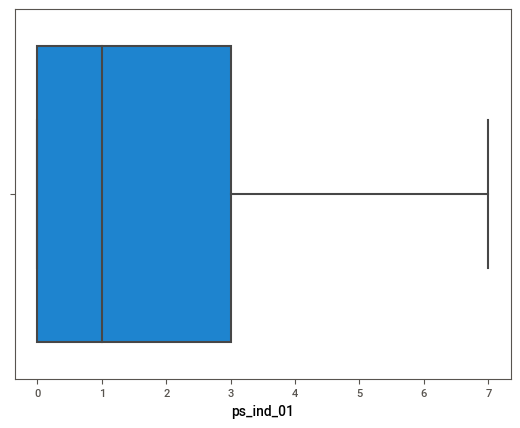

In [17]:
# No outlier present as per data visualization using boxplot

sns.boxplot(x='ps_ind_01',data=data)
plt.show()

In [25]:
# CHECKING FOR "LOWER_LIMIT" & "UPPER_LIMIT"
IQR=stats.iqr(data.ps_ind_01,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.ps_ind_01.quantile(0.25)
print('Q1 : ',Q1)

Q3=data.ps_ind_01.quantile(0.75)
print('Q3 : ',Q3)

Lower_limit=Q3-1.5*IQR
print('Lower_limit : ',Lower_limit)

Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  3.0
Q1 :  0.0
Q3 :  3.0
Lower_limit :  -1.5
Upper_limit :  7.5


In [26]:
# No outlier in lower limit
data.loc[data['ps_ind_01']<Lower_limit] 

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

In [27]:
# No outlier in upper limit
data.loc[data['ps_ind_01']>Upper_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

- THEY HAVE NO OUTLIERS IN "ps_ind_01"

## ps_ind_02_cat

In [28]:
# CHECKING MISSING VALUES ON "PS_IND_02_CAT"
data['ps_ind_02_cat'].isnull().sum()

0

In [29]:
data.ps_ind_02_cat.value_counts()

 1    431859
 2    123573
 3     28186
 4     11378
-1       216
Name: ps_ind_02_cat, dtype: int64

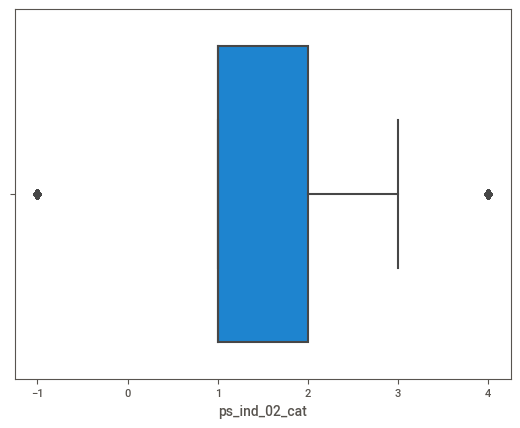

In [30]:
# outlier present as per data visualization using boxplot

sns.boxplot(x='ps_ind_02_cat',data=data)
plt.show()

In [31]:
 # finding lower & upper limit using IQR since data are not normally distributed

IQR = stats.iqr(data.ps_ind_02_cat,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.ps_ind_02_cat.quantile(0.25)
print('Q1 : ',Q1)

Q3=data.ps_ind_02_cat.quantile(0.75)
print('Q# :',Q3)

Lower_limit_2=Q1-1.5*IQR
print('Lower_limit_2 : ',Lower_limit_2)

Upper_limit_2=Q3+1.5*IQR
print('Upper_limit_2 : ',Upper_limit_2)

IQR :  1.0
Q1 :  1.0
Q# : 2.0
Lower_limit_2 :  -0.5
Upper_limit_2 :  3.5


In [32]:
# outlier in lower limit
data.loc[data['ps_ind_02_cat']<Lower_limit_2]

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
847        2210       0          5             -1          0             -1   
11840     29812       0          0             -1          8              0   
13670     34370       0          5             -1          0             -1   
13804     34695       0          0             -1          0             -1   
14002     35176       0          0             -1          7              0   
...         ...     ...        ...            ...        ...            ...   
583341  1458146       0          3             -1          5              0   
584757  1461734       0          0             -1          7              1   
587628  1468746       1          5             -1          0             -1   
591394  1478237       0          0             -1          6              1   
593631  1483987       0          4             -1          6              1   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  \
847                -1              0              1              0   
11840               0              0              0              0   
13670              -1              0              0              1   
13804              -1              1              0              0   
14002               6              0              1              0   
...               ...            ...            ...            ...   
583341              0              0              0              1   
584757              0              0              0              0   
587628             -1              0              0              1   
591394              0              0              0              1   
593631              0              0              0              0   

        ps_ind_09_bin  ps_ind_10_bin  ps_ind_11_bin  ps_ind_12_bin  \
847                 0              0              0              0   
11840               1              0              0              0   
13670               0              0              0              0   
13804               0              0              0              0   
14002               0              0              0              0   
...               ...            ...            ...            ...   
583341              0              0              0              0   
584757              1              0              0              0   
587628              0              0              0              0   
591394              0              0              0              0   
593631              1              0              0              0   

        ps_ind_13_bin  ps_ind_14  ps_ind_15  ps_ind_16_bin  ps_ind_17_bin  \
847                 0          0          0              0              0   
11840               0          0          0              0              0   
13670               0          0          5              1              0   
13804               0          0          2              0              1   
14002               0          0          4              1              0   
...               ...        ...        ...            ...            ...   
583341              0          0          2              0              0   
584757              0          0          7              0              0   
587628              0          0         10              0              0   
591394              0          0         12              0              0   
593631              0          0         13              1              0   

        ps_ind_18_bin  ps_reg_01  ps_reg_02  ps_reg_03  ps_car_01_cat  \
847                 1        0.0        0.0  -1.000000             -1   
11840               0        0.4        0.0   0.520817              6   
13670               0        0.0        0.0  -1.000000             -1   
13804               0        0.0        0.0  -1.000000             -1   
14002               0        0.2        0.1  -1.000000              7   
...               .

In [33]:
# outlier in upper limit
data.loc[data['ps_ind_02_cat']>Upper_limit_2]

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
2            13       0          5              4          9              1   
37          101       0          3              4          9              1   
149         398       0          0              4          9              1   
190         480       0          3              4          7              1   
267         689       0          0              4          7              1   
...         ...     ...        ...            ...        ...            ...   
594846  1487074       1          5              4         10              1   
594872  1487135       0          0              4          9              0   
594920  1487258       0          3              4          3              1   
594944  1487309       0          3              4          9              1   
594989  1487432       0          1              4          8              0   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  \
2                   0              0              0              1   
37                  0              0              0              0   
149                 0              0              1              0   
190                 0              0              0              0   
267                 0              0              1              0   
...               ...            ...            ...            ...   
594846              0              0              0              0   
594872              0              1              0              0   
594920              0              0              1              0   
594944              0              0              1              0   
594989              0              1              0              0   

        ps_ind_09_bin  ps_ind_10_bin  ps_ind_11_bin  ps_ind_12_bin  \
2                   0              0              0              0   
37                  1              0              0              0   
149                 0              0              0              0   
190                 1              0              0              0   
267                 0              0              0              0   
...               ...            ...            ...            ...   
594846              1              0              0              0   
594872              0              0              0              0   
594920              0              0              0              0   
594944              0              0              0              0   
594989              0              0              0              0   

        ps_ind_13_bin  ps_ind_14  ps_ind_15  ps_ind_16_bin  ps_ind_17_bin  \
2                   0          0         12              1              0   
37                  0          0          9              1              0   
149                 0          0          4              1              0   
190                 0          0         11              1              0   
267                 0          0         10              0              0   
...               ...        ...        ...            ...            ...   
594846              0          0          8              1              0   
594872              0          0         12              1              0   
594920              0          0          6              0              0   
594944              0          0         10              1              0   
594989              0          0          9              1              0   

        ps_ind_18_bin  ps_reg_01  ps_reg_02  ps_reg_03  ps_car_01_cat  \
2                   0        0.0        0.0  -1.000000              7   
37                  0        0.9        0.4   0.720677              6   
149                 0        0.4        0.0   0.744144             10   
190                 0        0.4        0.0   0.786209             11   
267                 0        0.4        0.5   1.086853              7   
...               .

In [34]:
# IMPUTING OUTLIERS USING MEDIAN
data.loc[data['ps_ind_02_cat']<Lower_limit_2,'ps_ind_02_cat']=data['ps_ind_02_cat'].median()

In [35]:
data.loc[data['ps_ind_02_cat']>Upper_limit_2,'ps_ind_02_cat']=data['ps_ind_02_cat'].median()

In [36]:
data.loc[data['ps_ind_02_cat']>Upper_limit_2]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

In [37]:
data.loc[data['ps_ind_02_cat']<Lower_limit_2]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

## ps_ind_03

In [38]:

data.ps_ind_03.value_counts()

2     96110
3     81973
1     67994
4     67213
5     62803
6     60406
7     52364
8     39667
9     25436
0     15514
10    14484
11    11248
Name: ps_ind_03, dtype: int64

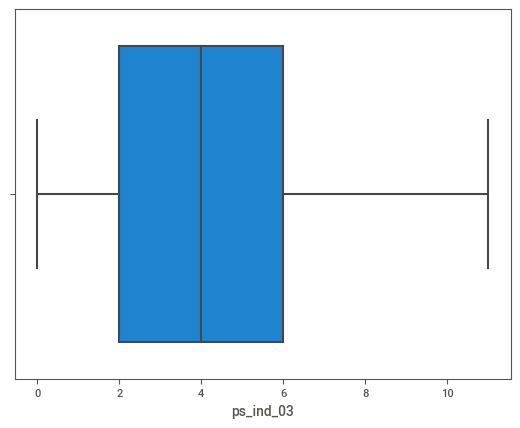

In [39]:
# No outlier present as per data visualization using boxplot

sns.boxplot(x='ps_ind_03',data=data)
plt.show()

In [40]:
# finding lower & upper limit using IQR since data are not normally distributed

IQR=stats.iqr(data.ps_ind_03,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.ps_ind_03.quantile(0.25)
print('Q1 : ',Q1)

Q3=data.ps_ind_03.quantile(0.75)
print('Q3 : ',Q3)

Lower_limit=Q3-1.5*IQR
print('Lower_limit : ',Lower_limit)

Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  4.0
Q1 :  2.0
Q3 :  6.0
Lower_limit :  0.0
Upper_limit :  12.0


In [41]:
# No outlier
data.loc[data['ps_ind_03']<Lower_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

In [42]:
# No outlier

data.loc[data['ps_ind_03']>Upper_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

- THEY HAVE NO OUTLIERS IN "ps_ind_03"

## ps_ind_04_cat

In [43]:
data.ps_ind_04_cat.value_counts()

 0    346965
 1    248164
-1        83
Name: ps_ind_04_cat, dtype: int64

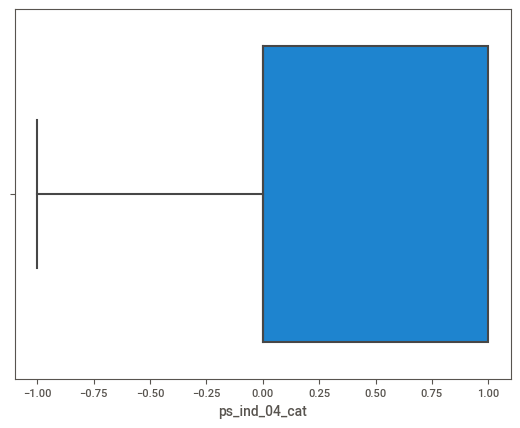

In [44]:
# outlier present as per data visualization using boxplot
sns.boxplot(x='ps_ind_04_cat',data=data)
plt.show()

In [45]:
# finding lower & upper limit using IQR since data are not normally distributed

IQR=stats.iqr(data.ps_ind_04_cat,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.ps_ind_04_cat.quantile(0.25)
print('Q1 : ',Q1)

Q3=data.ps_ind_04_cat.quantile(0.75)
print('Q3 : ',Q3)

Lower_limit=Q3-1.5*IQR
print('Lower_limit : ',Lower_limit)

Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  1.0
Q1 :  0.0
Q3 :  1.0
Lower_limit :  -0.5
Upper_limit :  2.5


In [46]:
# Outlier present in lower limit
data.loc[data['ps_ind_04_cat']<Lower_limit]

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
847        2210       0          5              1          0             -1   
12329     30996       0          3              1          4             -1   
13670     34370       0          5              1          0             -1   
13804     34695       0          0              1          0             -1   
23056     57695       1          3              1          0             -1   
...         ...     ...        ...            ...        ...            ...   
546932  1366894       0          1              1          0             -1   
557616  1393791       1          5              1          0             -1   
564377  1411082       1          2              1          0             -1   
579049  1447810       1          1              1          0             -1   
587628  1468746       1          5              1          0             -1   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  \
847                -1              0              1              0   
12329               0              1              0              0   
13670              -1              0              0              1   
13804              -1              1              0              0   
23056              -1              1              0              0   
...               ...            ...            ...            ...   
546932             -1              0              1              0   
557616             -1              0              0              1   
564377             -1              0              1              0   
579049             -1              1              0              0   
587628             -1              0              0              1   

        ps_ind_09_bin  ps_ind_10_bin  ps_ind_11_bin  ps_ind_12_bin  \
847                 0              0              0              0   
12329               0              0              0              0   
13670               0              0              0              0   
13804               0              0              0              0   
23056               0              0              0              0   
...               ...            ...            ...            ...   
546932              0              0              0              0   
557616              0              0              0              0   
564377              0              0              0              1   
579049              0              0              0              0   
587628              0              0              0              0   

        ps_ind_13_bin  ps_ind_14  ps_ind_15  ps_ind_16_bin  ps_ind_17_bin  \
847                 0          0          0              0              0   
12329               0          0         11              1              0   
13670               0          0          5              1              0   
13804               0          0          2              0              1   
23056               0          0          7              0              1   
...               ...        ...        ...            ...            ...   
546932              0          0          0              0              0   
557616              0          0          3              0              0   
564377              0          1          0              0              1   
579049              0          0         10              0              0   
587628              0          0         10              0              0   

        ps_ind_18_bin  ps_reg_01  ps_reg_02  ps_reg_03  ps_car_01_cat  \
847                 1        0.0        0.0  -1.000000             -1   
12329               0        0.9        0.2   0.531507              7   
13670               0        0.0        0.0  -1.000000             -1   
13804               0        0.0        0.0  -1.000000             -1   
23056               0        0.0        0.0  -1.000000             -1   
...               .

In [47]:
# imputing outlier with median
data.loc[data['ps_ind_04_cat']<Lower_limit]=data.ps_ind_04_cat.median()

In [48]:
data.loc[data['ps_ind_04_cat']<Lower_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

In [49]:
# no outlier in upper limit
data.loc[data['ps_ind_04_cat']>Upper_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

## ps_ind_05_cat

In [50]:
data.ps_ind_05_cat.value_counts()

 0    528088
 6     20662
 4     18344
 1      8322
 3      8233
-1      5730
 2      4184
 5      1649
Name: ps_ind_05_cat, dtype: int64

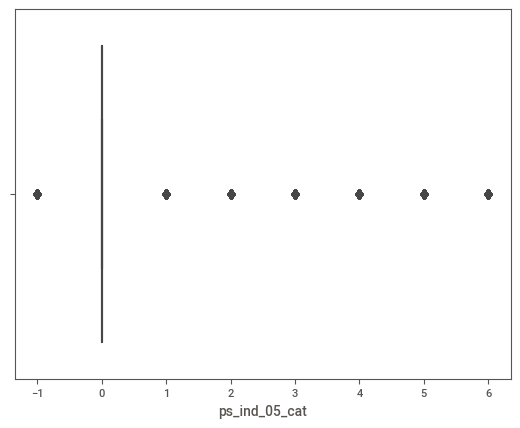

In [51]:
# outlier present as per data visualization using boxplot

sns.boxplot(x='ps_ind_05_cat',data=data)
plt.show()

In [52]:
# finding lower & upper limit using IQR since data are not normally distributed

IQR=stats.iqr(data.ps_ind_05_cat,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.ps_ind_05_cat.quantile(0.25)
print('Q1 : ',Q1)

Q3=data.ps_ind_05_cat.quantile(0.75)
print('Q3 : ',Q3)

Lower_limit=Q3-1.5*IQR
print('Lower_limit : ',Lower_limit)

Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  0.0
Q1 :  0.0
Q3 :  0.0
Lower_limit :  0.0
Upper_limit :  0.0


In [53]:
# outlier more than 5% so not considering as outlier

a=len(data.loc[data['ps_ind_05_cat']>Lower_limit])
b=len(data.loc[data['ps_ind_05_cat']<Lower_limit])
c=(a+b)/len(data)
c

0.11277326397989287

- 11.3 % Outliers In "ps_ind_05_cat"

## ps_ind_06_bin

In [54]:
data.ps_ind_06_bin.value_counts()

0    360871
1    234341
Name: ps_ind_06_bin, dtype: int64

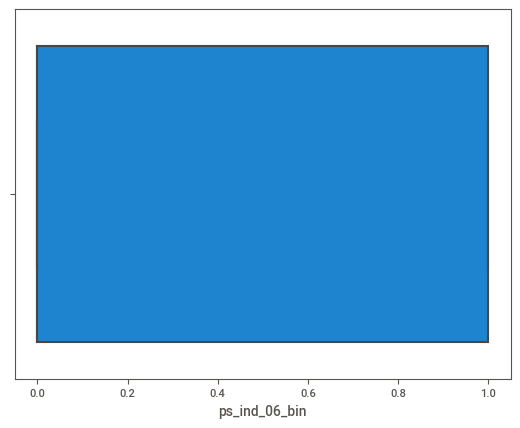

In [55]:
 # data visualization using boxplot


sns.boxplot(x='ps_ind_06_bin',data=data)
plt.show()

<AxesSubplot:xlabel='ps_ind_06_bin', ylabel='Count'>

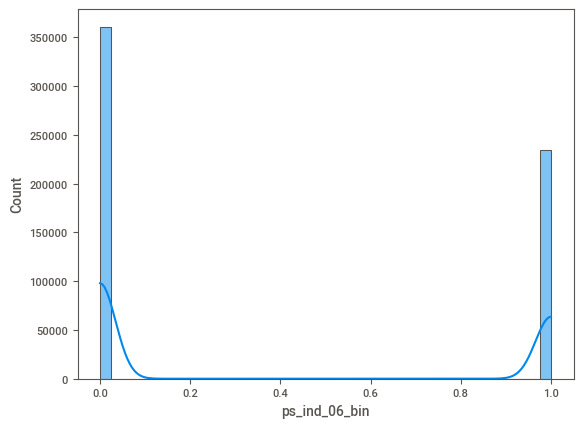

In [56]:
sns.histplot(x='ps_ind_06_bin',kde=True,data=data)

In [57]:
# finding lower & upper limit using IQR since data are not normally distributed

IQR=stats.iqr(data.ps_ind_06_bin,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.ps_ind_06_bin.quantile(0.25)
print('Q1 : ',Q1)

Q3=data.ps_ind_06_bin.quantile(0.75)
print('Q3 : ',Q3)

Lower_limit=Q3-1.5*IQR
print('Lower_limit : ',Lower_limit)

Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  1.0
Q1 :  0.0
Q3 :  1.0
Lower_limit :  -0.5
Upper_limit :  2.5


In [58]:
# No outlier in lower limit

data.loc[data['ps_ind_06_bin']<Lower_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

In [59]:
# No outlier in upper limit

data.loc[data['ps_ind_06_bin']>Upper_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

- THEY HAVE NO OUTLIERS IN "ps_ind_06_bin"

## ps_ind_07_bin

In [60]:
data.ps_ind_07_bin.value_counts()

0    442243
1    152969
Name: ps_ind_07_bin, dtype: int64

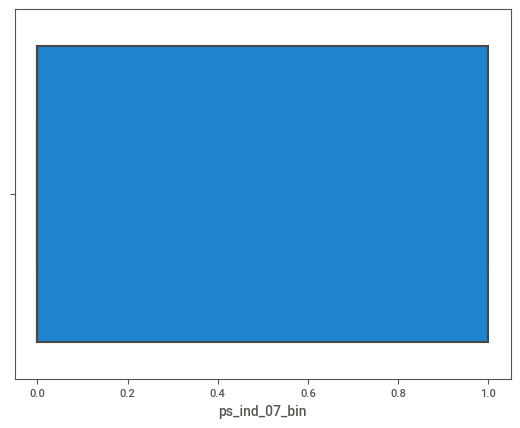

In [61]:
# data visualization using boxplot

sns.boxplot(x='ps_ind_07_bin',data=data)
plt.show()

<AxesSubplot:xlabel='ps_ind_07_bin', ylabel='Count'>

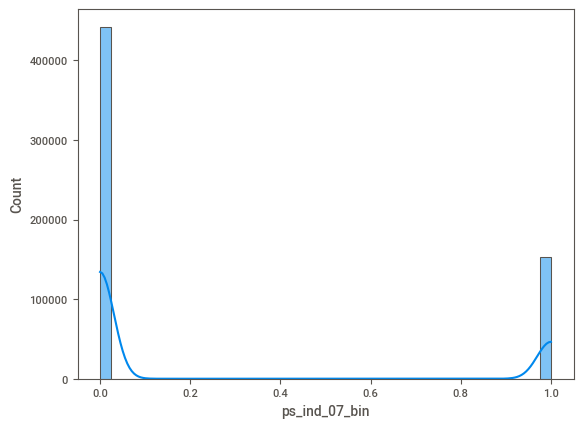

In [62]:
sns.histplot(x='ps_ind_07_bin',kde=True,data=data)

In [63]:
# finding lower & upper limit using IQR since data are not normally distributed

IQR=stats.iqr(data.ps_ind_07_bin,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.ps_ind_07_bin.quantile(0.25)
print('Q1 : ',Q1)

Q3=data.ps_ind_07_bin.quantile(0.75)
print('Q3 : ',Q3)

Lower_limit=Q3-1.5*IQR
print('Lower_limit : ',Lower_limit)

Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  1.0
Q1 :  0.0
Q3 :  1.0
Lower_limit :  -0.5
Upper_limit :  2.5


In [64]:
# No outlier in lower limit

data.loc[data['ps_ind_07_bin']<Lower_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

In [65]:
# No outlier in upper limit


data.loc[data['ps_ind_07_bin']>Upper_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

- THEY HAVE NO OUTLIERS IN "ps_ind_07_bin"

## ps_ind_08_bin

In [66]:
data.ps_ind_08_bin.unique()

array([0, 1], dtype=int64)

In [67]:
data.ps_ind_08_bin.value_counts()

0    497670
1     97542
Name: ps_ind_08_bin, dtype: int64

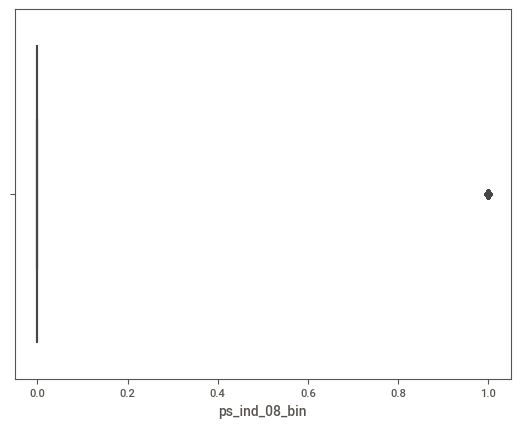

In [68]:
 # outlier present as per data visualization using boxplot

sns.boxplot(x='ps_ind_08_bin',data=data)
plt.show()

<AxesSubplot:xlabel='ps_ind_08_bin', ylabel='Count'>

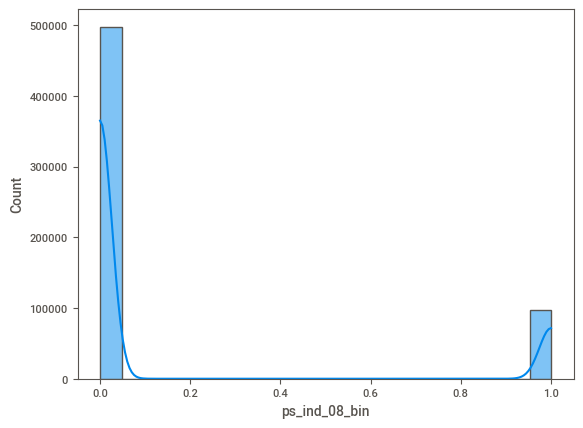

In [69]:
sns.histplot(x='ps_ind_08_bin',kde=True,data=data)

In [70]:
# finding lower & upper limit using IQR since data are not normally distributed

IQR=stats.iqr(data.ps_ind_08_bin,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.ps_ind_08_bin.quantile(0.25)
print('Q! : ',Q1)

Q3=data.ps_ind_08_bin.quantile(0.75)
print('Q3 : ',Q3)

Lower_limit=Q1-1.5*IQR
print('Lower_limit : ',Lower_limit)

Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  0.0
Q! :  0.0
Q3 :  0.0
Lower_limit :  0.0
Upper_limit :  0.0


In [71]:
len(data.loc[data['ps_ind_08_bin']<Lower_limit])/len(data)

0.0

In [72]:
len(data.loc[data['ps_ind_08_bin']>Upper_limit])/len(data)

0.16387774440031452

- 16.4 % OUTLIERS IN "ps_ind_08_bin"

## ps_ind_09_bin

In [73]:
data.ps_ind_09_bin.unique()

array([0, 1], dtype=int64)

In [74]:
data.ps_ind_09_bin.value_counts()

0    484935
1    110277
Name: ps_ind_09_bin, dtype: int64

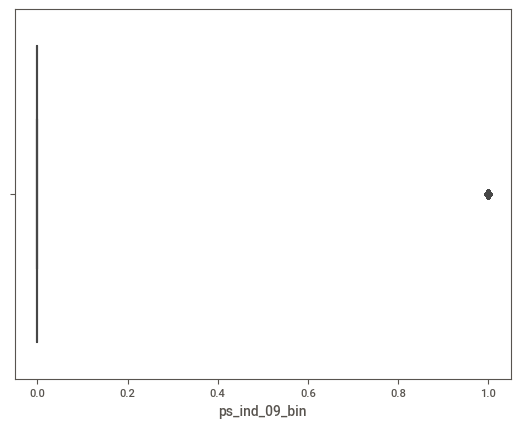

In [6]:
 # outlier present as per data visualization using boxplot

sns.boxplot(x='ps_ind_09_bin',data=data)
plt.show()

<AxesSubplot:xlabel='ps_ind_09_bin', ylabel='Count'>

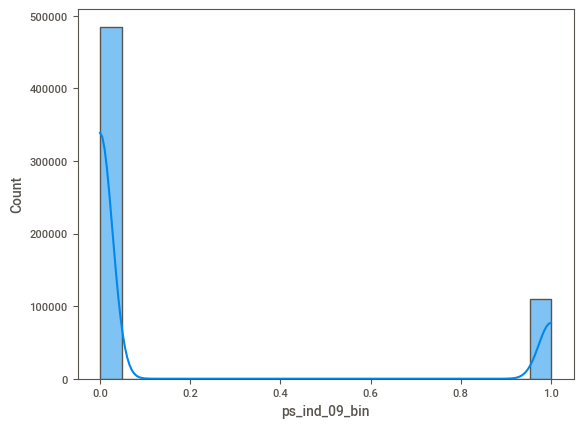

In [76]:
# checking distribution using histplot & data are not normally distributed

sns.histplot(x='ps_ind_09_bin',kde=True,data=data)

In [77]:
# finding lower & upper limit using IQR since data are not normally distributed

IQR=stats.iqr(data.ps_ind_09_bin,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.ps_ind_09_bin.quantile(0.25)
print('Q! : ',Q1)

Q3=data.ps_ind_09_bin.quantile(0.75)
print('Q3 : ',Q3)

Lower_limit=Q1-1.5*IQR
print('Lower_limit : ',Lower_limit)

Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  0.0
Q! :  0.0
Q3 :  0.0
Lower_limit :  0.0
Upper_limit :  0.0


In [78]:
len(data.loc[data['ps_ind_09_bin']<Lower_limit])/len(data)

0.0

In [79]:
len(data.loc[data['ps_ind_09_bin']>Upper_limit])/len(data)

0.18527348238946795

- 18.5% Outliers in 'ps_ind_09_bin'

## ps_ind_10_bin

In [80]:
data.ps_ind_10_bin.unique()

array([0, 1], dtype=int64)

In [81]:
data.ps_ind_10_bin.value_counts()

0    594990
1       222
Name: ps_ind_10_bin, dtype: int64

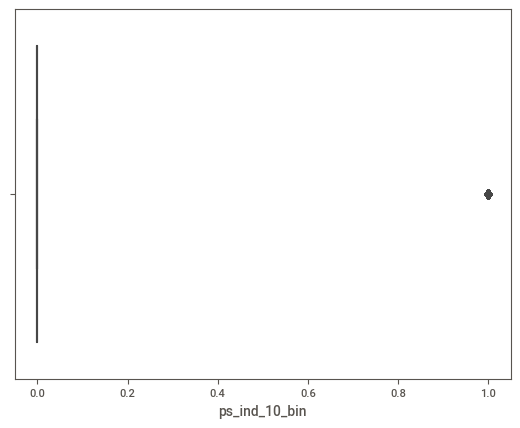

In [82]:
# outlier present as per data visualization using boxplot

sns.boxplot(x='ps_ind_10_bin',data=data)
plt.show()

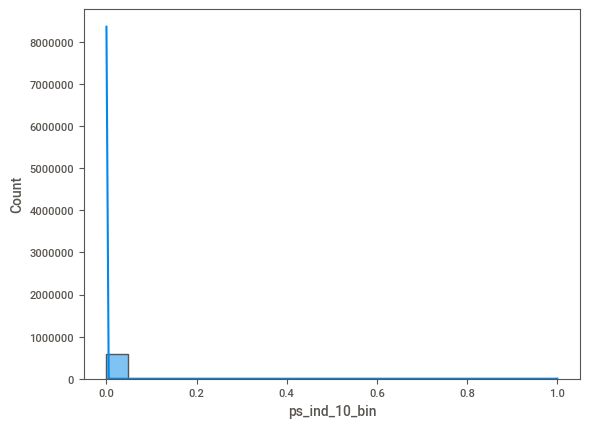

In [83]:
sns.histplot(x='ps_ind_10_bin',data=data,kde=True)
plt.show()

In [84]:
# finding lower & upper limit using IQR since data are not normally distributed

IQR=stats.iqr(data.ps_ind_10_bin,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.ps_ind_10_bin.quantile(0.25)
print('Q1 : ',Q1)

Q3=data.ps_ind_10_bin.quantile(0.75)
print('Q3 : ',Q3)

Lower_limit=Q1-1.5*IQR
print('Lower_limit : ',Lower_limit)

Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  0.0
Q1 :  0.0
Q3 :  0.0
Lower_limit :  0.0
Upper_limit :  0.0


In [85]:
# no outlier in lower limit

data.loc[data['ps_ind_10_bin']<Lower_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

In [86]:
# outlier in upper limit

data.loc[data['ps_ind_10_bin']>Upper_limit]

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
4264      10954       0          6              2          1              1   
5218      13317       0          3              1          6              1   
5380      13719       0          6              1          7              0   
5701      14547       0          0              1          5              0   
8245      20882       0          1              1          5              0   
...         ...     ...        ...            ...        ...            ...   
575298  1438502       0          5              1          8              0   
590597  1476265       0          0              3          7              1   
591529  1478558       0          5              1          6              1   
591615  1478769       0          5              1          4              1   
594997  1487448       0          3              1          8              0   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  \
4264                3              0              1              0   
5218                0              0              0              0   
5380                0              0              0              1   
5701                0              0              1              0   
8245                0              0              0              1   
...               ...            ...            ...            ...   
575298              0              0              1              0   
590597              0              0              1              0   
591529              0              0              1              0   
591615              0              0              1              0   
594997              0              0              1              0   

        ps_ind_09_bin  ps_ind_10_bin  ps_ind_11_bin  ps_ind_12_bin  \
4264                0              1              0              1   
5218                1              1              0              0   
5380                0              1              0              1   
5701                0              1              1              1   
8245                0              1              0              1   
...               ...            ...            ...            ...   
575298              0              1              0              0   
590597              0              1              0              0   
591529              0              1              1              1   
591615              0              1              0              1   
594997              0              1              0              0   

        ps_ind_13_bin  ps_ind_14  ps_ind_15  ps_ind_16_bin  ps_ind_17_bin  \
4264                0          2          4              0              1   
5218                0          1         10              1              0   
5380                0          2          6              0              0   
5701                0          3          0              0              0   
8245                1          3          0              0              0   
...               ...        ...        ...            ...            ...   
575298              0          1          5              0              0   
590597              0          1          5              0              0   
591529              0          3          0              0              0   
591615              0          2          0              0              0   
594997              0          1          2              0              0   

        ps_ind_18_bin  ps_reg_01  ps_reg_02  ps_reg_03  ps_car_01_cat  \
4264                0        0.9        1.4   1.243986              9   
5218                0        0.9        1.5   1.616710             11   
5380                1        0.9        1.3   1.546367              9   
5701                1        0.7        0.3   0.838898             11   
8245                1        0.6        0.2   0.641775              7   
...               .

In [87]:
# imputing outlier using median
data.loc[data['ps_ind_10_bin']>Upper_limit,'ps_ind_10_bin']=data.ps_ind_10_bin.median()

In [88]:
data.loc[data['ps_ind_10_bin']>Upper_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

## ps_ind_11_bin

In [89]:
data.ps_ind_11_bin.unique()

array([0, 1], dtype=int64)

In [90]:
data.ps_ind_11_bin.value_counts()

0    594205
1      1007
Name: ps_ind_11_bin, dtype: int64

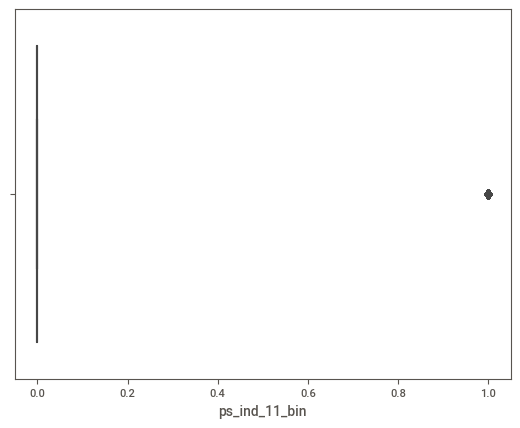

In [91]:
 # outlier present as per data visualization using boxplot


sns.boxplot(x='ps_ind_11_bin',data=data)
plt.show()

<AxesSubplot:xlabel='ps_ind_11_bin', ylabel='Count'>

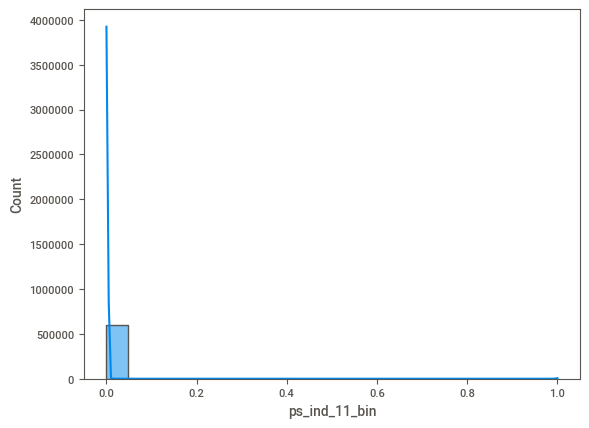

In [92]:
# checking distribution using histplot & data are not normally distributed

sns.histplot(x='ps_ind_11_bin',data=data,kde=True)

In [93]:
# finding lower & upper limit using IQR since data are not normally distributed

IQR=stats.iqr(data.ps_ind_11_bin,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.ps_ind_11_bin.quantile(0.25)
print('Q1 : ',Q1)

Q3=data.ps_ind_11_bin.quantile(0.75)
print('Q3 : ',Q3)

Lower_limit=Q1-1.5*IQR
print('Lower_limit : ',Lower_limit)

Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  0.0
Q1 :  0.0
Q3 :  0.0
Lower_limit :  0.0
Upper_limit :  0.0


In [94]:
# outlier present in upper limit
data.loc[data['ps_ind_11_bin']>Upper_limit]

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
351         948       0          0              3          7              1   
1189       3074       0          2              1          4              1   
1206       3110       0          0              1          6              0   
1258       3245       0          0              2          1              1   
4107      10560       0          1              1          4              0   
...         ...     ...        ...            ...        ...            ...   
592392  1480780       0          0              2          1              1   
592876  1482007       0          1              1          7              0   
593221  1482893       0          0              1          5              0   
593527  1483712       0          7              1          8              1   
593929  1484755       0          0              2          1              1   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  \
351                 0              0              1              0   
1189                0              1              0              0   
1206                0              0              1              0   
1258                1              0              0              0   
4107                0              0              0              1   
...               ...            ...            ...            ...   
592392              0              0              0              1   
592876              0              0              0              1   
593221              0              1              0              0   
593527              0              0              0              0   
593929              0              0              0              1   

        ps_ind_09_bin  ps_ind_10_bin  ps_ind_11_bin  ps_ind_12_bin  \
351                 0              0              1              0   
1189                0              0              1              1   
1206                0              0              1              1   
1258                1              0              1              0   
4107                0              0              1              1   
...               ...            ...            ...            ...   
592392              0              0              1              1   
592876              0              0              1              1   
593221              0              0              1              1   
593527              1              0              1              0   
593929              0              0              1              0   

        ps_ind_13_bin  ps_ind_14  ps_ind_15  ps_ind_16_bin  ps_ind_17_bin  \
351                 0          1          5              0              0   
1189                0          2         10              1              0   
1206                0          2          0              0              0   
1258                0          1          5              0              0   
4107                0          2          0              0              0   
...               ...        ...        ...            ...            ...   
592392              1          3          0              0              0   
592876              0          2          0              0              0   
593221              0          2          0              0              0   
593527              0          1          6              1              0   
593929              0          1          0              0              1   

        ps_ind_18_bin  ps_reg_01  ps_reg_02  ps_reg_03  ps_car_01_cat  \
351                 1        0.9        1.0   0.967277              7   
1189                0        0.9        0.3   0.690109              7   
1206                1        0.9        0.4   0.664737              5   
1258                1        0.9        0.9   1.291559             11   
4107                1        0.0        0.2   0.584701             11   
...               .

In [95]:
# imputing median
data.loc[data['ps_ind_11_bin']>Upper_limit,'ps_ind_11_bin']=data.ps_ind_11_bin.median()

In [96]:
data.loc[data['ps_ind_11_bin']>Upper_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

## ps_ind_12_bin

In [97]:
data.ps_ind_12_bin.unique()

array([0, 1], dtype=int64)

In [98]:
data.ps_ind_12_bin.value_counts()

0    589597
1      5615
Name: ps_ind_12_bin, dtype: int64

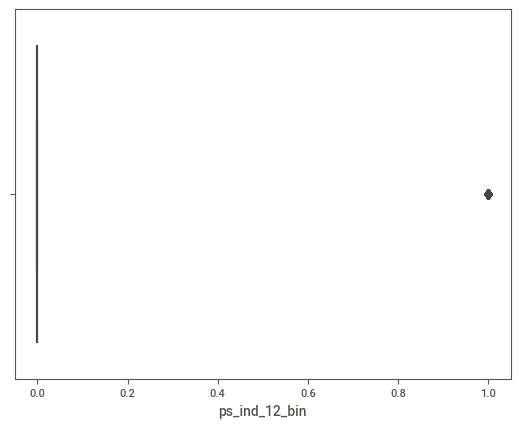

In [99]:
 # outlier present as per data visualization using boxplot
sns.boxplot(x='ps_ind_12_bin',data=data)
plt.show()

<AxesSubplot:xlabel='ps_ind_12_bin', ylabel='Count'>

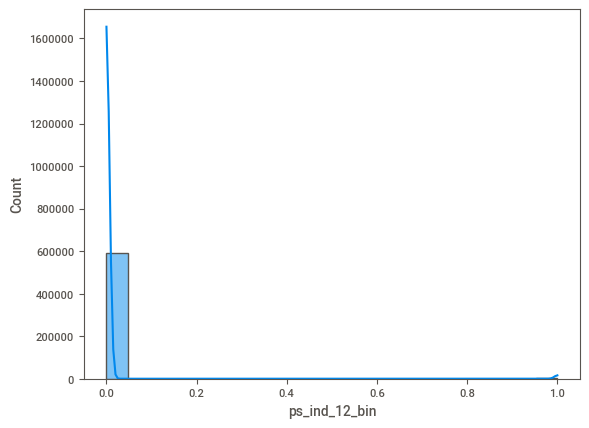

In [100]:
# checking distribution using histplot & data are not normally distributed

sns.histplot(x='ps_ind_12_bin',data=data,kde=True)

In [101]:
# finding lower & upper limit using IQR since data are not normally distributed

IQR=stats.iqr(data.ps_ind_12_bin,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.ps_ind_12_bin.quantile(0.25)
print('Q1 : ',Q1)

Q3=data.ps_ind_12_bin.quantile(0.75)
print('Q3 : ',Q3)

Lower_limit=Q1-1.5*IQR
print('Lower_limit : ',Lower_limit)

Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  0.0
Q1 :  0.0
Q3 :  0.0
Lower_limit :  0.0
Upper_limit :  0.0


In [102]:
# no outlier in lower limit

data.loc[data['ps_ind_12_bin']<Lower_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

In [103]:
# outlier present in upper limit

data.loc[data['ps_ind_12_bin']>Upper_limit]

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
47          120       0          0              1          9              0   
173         449       0          2              1          6              0   
225         564       0          0              1          5              0   
322         861       0          2              1          4              1   
325         870       0          2              2          2              1   
...         ...     ...        ...            ...        ...            ...   
594784  1486955       0          2              1          2              1   
594814  1487011       0          4              1          5              1   
595110  1487743       0          3              2          3              1   
595123  1487773       0          0              1          5              1   
595175  1487925       0          1              1          7              1   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  \
47                  0              0              1              0   
173                 0              0              1              0   
225                 0              0              1              0   
322                 0              0              1              0   
325                 0              0              1              0   
...               ...            ...            ...            ...   
594784              0              0              0              1   
594814              0              0              0              1   
595110              0              0              0              1   
595123              0              0              0              1   
595175              0              1              0              0   

        ps_ind_09_bin  ps_ind_10_bin  ps_ind_11_bin  ps_ind_12_bin  \
47                  0              0              0              1   
173                 0              0              0              1   
225                 0              0              0              1   
322                 0              0              0              1   
325                 0              0              0              1   
...               ...            ...            ...            ...   
594784              0              0              0              1   
594814              0              0              0              1   
595110              0              0              0              1   
595123              0              0              0              1   
595175              0              0              0              1   

        ps_ind_13_bin  ps_ind_14  ps_ind_15  ps_ind_16_bin  ps_ind_17_bin  \
47                  0          1          5              1              0   
173                 0          1          4              0              1   
225                 0          1          0              0              0   
322                 0          1          2              0              0   
325                 0          1          1              0              0   
...               ...        ...        ...            ...            ...   
594784              0          1          4              0              1   
594814              0          1          0              0              1   
595110              0          1          0              0              0   
595123              0          1          3              1              0   
595175              0          1          4              0              0   

        ps_ind_18_bin  ps_reg_01  ps_reg_02  ps_reg_03  ps_car_01_cat  \
47                  0        0.1        0.2  -1.000000              7   
173                 0        0.9        0.9   0.877496              7   
225                 1        0.9        1.5   1.295425              7   
322                 1        0.8        1.2   1.213981             11   
325                 1        0.2        0.4  -1.000000             10   
...               .

In [104]:
# imputing median
data.loc[data['ps_ind_12_bin']>Upper_limit,'ps_ind_12_bin']=data.ps_ind_12_bin.median()

In [105]:
data.loc[data['ps_ind_12_bin']>Upper_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

## ps_ind_13_bin

In [106]:
data.ps_ind_13_bin.unique()

array([0, 1], dtype=int64)

In [107]:
data.ps_ind_13_bin.value_counts()

0    594649
1       563
Name: ps_ind_13_bin, dtype: int64

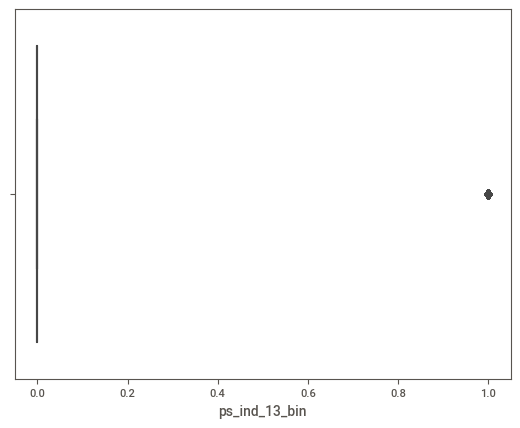

In [108]:
# outlier present as per data visualization using boxplot

sns.boxplot(x='ps_ind_13_bin',data=data)
plt.show()

<AxesSubplot:xlabel='ps_ind_13_bin', ylabel='Count'>

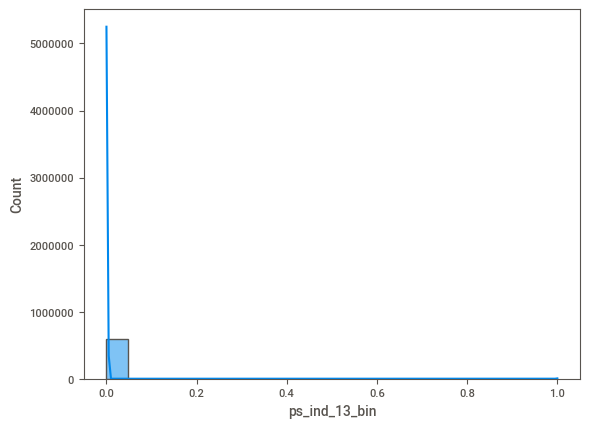

In [109]:
# data are not normally distributed
sns.histplot(x='ps_ind_13_bin',kde=True,data=data)

In [110]:
# finding lower & upper limit using IQR since data are not normally distributed

IQR=stats.iqr(data.ps_ind_13_bin,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.ps_ind_13_bin.quantile(0.25)
print('Q1 : ',Q1)

Q3=data.ps_ind_13_bin.quantile(0.75)
print('Q3 : ',Q3)

Lower_limit=Q1-1.5*IQR
print('Lower_limit : ',Lower_limit)

Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  0.0
Q1 :  0.0
Q3 :  0.0
Lower_limit :  0.0
Upper_limit :  0.0


In [111]:
# no outlier in lower limit
data.loc[data['ps_ind_13_bin']<Lower_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

In [112]:
# outlier present in upper limit
data.loc[data['ps_ind_13_bin']>Upper_limit]

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
4474      11480       0          0              1          7              0   
5762      14688       0          1              1          2              0   
5818      14835       0          4              2          6              1   
8245      20882       0          1              1          5              0   
8781      22198       0          2              3          4              0   
...         ...     ...        ...            ...        ...            ...   
591632  1478804       0          0              1          4              0   
592392  1480780       0          0              2          1              1   
592997  1482343       0          0              1          7              0   
593235  1482938       0          0              1          6              0   
594699  1486737       0          2              1          8              0   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  \
4474                0              1              0              0   
5762                0              0              1              0   
5818                0              0              1              0   
8245                0              0              0              1   
8781                0              0              1              0   
...               ...            ...            ...            ...   
591632              0              0              0              1   
592392              0              0              0              1   
592997              0              0              0              1   
593235              0              0              1              0   
594699              0              0              0              0   

        ps_ind_09_bin  ps_ind_10_bin  ps_ind_11_bin  ps_ind_12_bin  \
4474                0              0              0              0   
5762                0              0              0              0   
5818                0              0              0              0   
8245                0              0              0              0   
8781                0              0              0              0   
...               ...            ...            ...            ...   
591632              0              0              0              0   
592392              0              0              0              0   
592997              0              0              0              0   
593235              0              0              0              0   
594699              1              0              0              0   

        ps_ind_13_bin  ps_ind_14  ps_ind_15  ps_ind_16_bin  ps_ind_17_bin  \
4474                1          1          3              0              0   
5762                1          2          4              0              1   
5818                1          1          9              0              0   
8245                1          3          0              0              0   
8781                1          2          1              0              0   
...               ...        ...        ...            ...            ...   
591632              1          1          0              0              0   
592392              1          3          0              0              0   
592997              1          2          0              0              0   
593235              1          1          4              0              0   
594699              1          1          2              0              0   

        ps_ind_18_bin  ps_reg_01  ps_reg_02  ps_reg_03  ps_car_01_cat  \
4474                1        0.9        1.2   1.456237              7   
5762                0        0.4        0.0  -1.000000              9   
5818                1        0.9        0.5   1.149456             11   
8245                1        0.6        0.2   0.641775              7   
8781                1        0.9        0.8   0.731437             11   
...               .

In [113]:
# imputing outlier with median
data.loc[data['ps_ind_13_bin']>Upper_limit,'ps_ind_13_bin']=data.ps_ind_13_bin.median()

In [114]:
data.loc[data['ps_ind_13_bin']>Upper_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

## ps_ind_14

In [115]:
data.ps_ind_14.unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [116]:
data.ps_ind_14.value_counts()

0    588836
1      5491
2       744
3       136
4         5
Name: ps_ind_14, dtype: int64

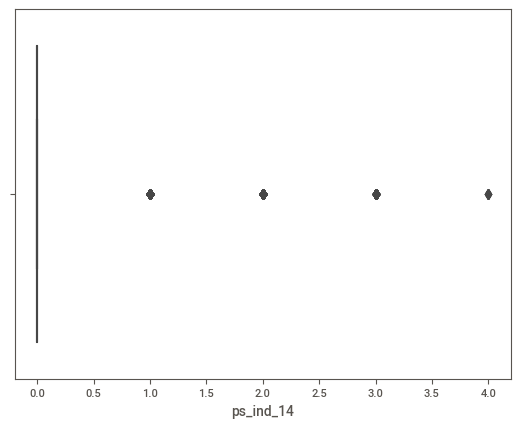

In [117]:
# outlier present as per data visualization using boxplot


sns.boxplot(x='ps_ind_14',data=data)
plt.show()

<AxesSubplot:xlabel='ps_ind_14', ylabel='Count'>

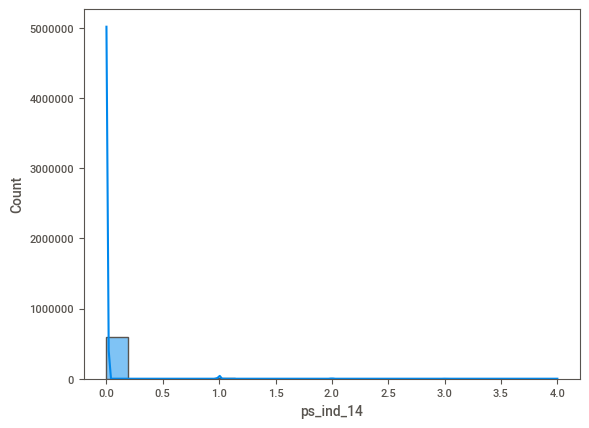

In [118]:
# data are not normally distributed 
sns.histplot(x='ps_ind_14',data=data,kde=True)

In [119]:
# finding lower & upper limit using IQR since data are not normally distributed

IQR=stats.iqr(data.ps_ind_14,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.ps_ind_14.quantile(0.25)
print('Q1 : ',Q1)

Q3=data.ps_ind_14.quantile(0.75)
print('Q3 : ',Q3)

Lower_limit=Q1-1.5*IQR
print('Lower_limit : ',Lower_limit)

Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  0.0
Q1 :  0.0
Q3 :  0.0
Lower_limit :  0.0
Upper_limit :  0.0


In [120]:
# no outlier present in lower limit
data.loc[data['ps_ind_14']<Lower_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

In [121]:
# outlier present in upper limit

data.loc[data['ps_ind_14']>Upper_limit]

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
47          120       0          0              1          9              0   
173         449       0          2              1          6              0   
225         564       0          0              1          5              0   
322         861       0          2              1          4              1   
325         870       0          2              2          2              1   
...         ...     ...        ...            ...        ...            ...   
594814  1487011       0          4              1          5              1   
594997  1487448       0          3              1          8              0   
595110  1487743       0          3              2          3              1   
595123  1487773       0          0              1          5              1   
595175  1487925       0          1              1          7              1   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  \
47                  0              0              1              0   
173                 0              0              1              0   
225                 0              0              1              0   
322                 0              0              1              0   
325                 0              0              1              0   
...               ...            ...            ...            ...   
594814              0              0              0              1   
594997              0              0              1              0   
595110              0              0              0              1   
595123              0              0              0              1   
595175              0              1              0              0   

        ps_ind_09_bin  ps_ind_10_bin  ps_ind_11_bin  ps_ind_12_bin  \
47                  0              0              0              0   
173                 0              0              0              0   
225                 0              0              0              0   
322                 0              0              0              0   
325                 0              0              0              0   
...               ...            ...            ...            ...   
594814              0              0              0              0   
594997              0              0              0              0   
595110              0              0              0              0   
595123              0              0              0              0   
595175              0              0              0              0   

        ps_ind_13_bin  ps_ind_14  ps_ind_15  ps_ind_16_bin  ps_ind_17_bin  \
47                  0          1          5              1              0   
173                 0          1          4              0              1   
225                 0          1          0              0              0   
322                 0          1          2              0              0   
325                 0          1          1              0              0   
...               ...        ...        ...            ...            ...   
594814              0          1          0              0              1   
594997              0          1          2              0              0   
595110              0          1          0              0              0   
595123              0          1          3              1              0   
595175              0          1          4              0              0   

        ps_ind_18_bin  ps_reg_01  ps_reg_02  ps_reg_03  ps_car_01_cat  \
47                  0        0.1        0.2  -1.000000              7   
173                 0        0.9        0.9   0.877496              7   
225                 1        0.9        1.5   1.295425              7   
322                 1        0.8        1.2   1.213981             11   
325                 1        0.2        0.4  -1.000000             10   
...               .

In [122]:
# imputing outlier with median

data.loc[data['ps_ind_14']>Upper_limit,'ps_ind_14']=data.ps_ind_14.median()

In [123]:
data.loc[data['ps_ind_14']>Upper_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

## ps_ind_15

In [124]:
data.ps_ind_15.unique()

array([11,  3, 12,  8,  9,  6, 13,  4, 10,  5,  7,  2,  0,  1],
      dtype=int64)

In [125]:
data.ps_ind_15.value_counts()

7     65330
8     59593
6     58400
10    54327
11    53213
9     45491
12    44847
5     42549
4     41766
13    35255
3     32261
0     31898
2     18669
1     11613
Name: ps_ind_15, dtype: int64

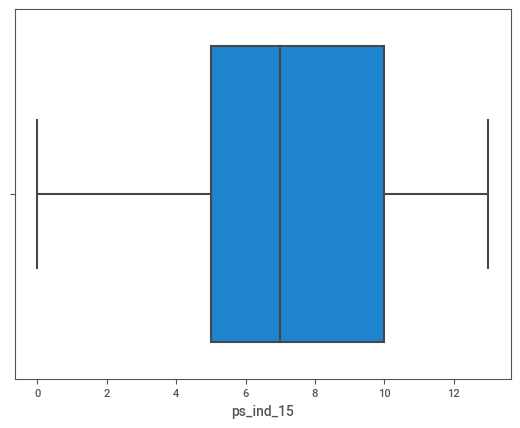

In [126]:
 # No outlier present as per data visualization using boxplot


sns.boxplot(x='ps_ind_15',data=data)
plt.show()

In [127]:
# finding lower & upper limit using IQR since data are not normally distributed

IQR=stats.iqr(data.ps_ind_15,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.ps_ind_15.quantile(0.25)
print('Q1 : ',Q1)

Q3=data.ps_ind_15.quantile(0.75)
print('Q3 : ',Q3)

Lower_limit=Q1-1.5*IQR
print('Lower_limit : ',Lower_limit)

Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  5.0
Q1 :  5.0
Q3 :  10.0
Lower_limit :  -2.5
Upper_limit :  17.5


In [128]:
# no outlier in lower limit

data.loc[data['ps_ind_15']<Lower_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

In [129]:
# no outlier in upper limit

data.loc[data['ps_ind_15']>Upper_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

- THEY HAVE NO OUTLIERS IN "ps_ind_15"

## ps_ind_16_bin

In [130]:
data.ps_ind_16_bin.unique()

array([0, 1], dtype=int64)

In [131]:
data.ps_ind_16_bin.value_counts()

1    393305
0    201907
Name: ps_ind_16_bin, dtype: int64

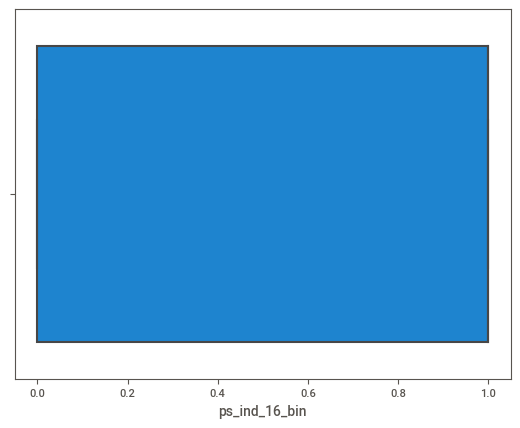

In [132]:
# data visualization using boxplot

sns.boxplot(x='ps_ind_16_bin',data=data)
plt.show()

<AxesSubplot:xlabel='ps_ind_16_bin', ylabel='Count'>

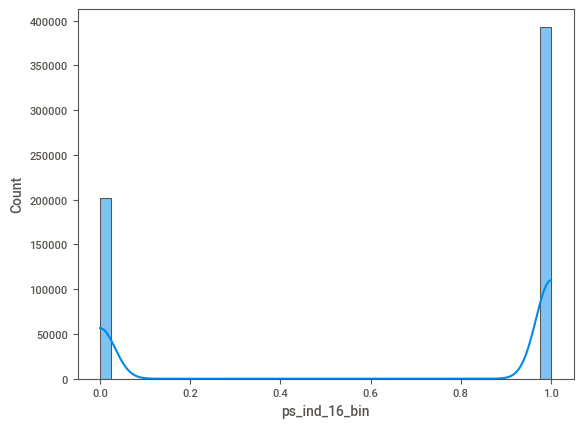

In [133]:
# checking distribution using histplot & data are not normally distributed

sns.histplot(x='ps_ind_16_bin',data=data,kde=True)

In [134]:
IQR=stats.iqr(data.ps_ind_16_bin,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.ps_ind_16_bin.quantile(0.25)
print('Q1 : ',Q1)

Q3=data.ps_ind_16_bin.quantile(0.75)
print('Q3 : ',Q3)

Lower_limit=Q1-1.5*IQR
print('Lower_limit : ',Lower_limit)

Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  1.0
Q1 :  0.0
Q3 :  1.0
Lower_limit :  -1.5
Upper_limit :  2.5


In [135]:
data.loc[data['ps_ind_16_bin']<Lower_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

In [136]:
data.loc[data['ps_ind_16_bin']>Upper_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

- THEY HAVE NO OUTLIERS IN "ps_ind_16_bin"

## ps_ind_17_bin

In [137]:
data.ps_ind_17_bin.unique()

array([1, 0], dtype=int64)

In [138]:
data.ps_ind_17_bin.value_counts()

0    523176
1     72036
Name: ps_ind_17_bin, dtype: int64

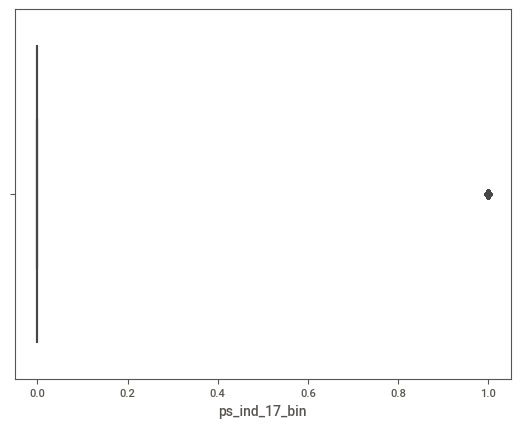

In [139]:
 # outlier present as per data visualization using boxplot

sns.boxplot(x='ps_ind_17_bin',data=data)
plt.show()

<AxesSubplot:xlabel='ps_ind_17_bin', ylabel='Count'>

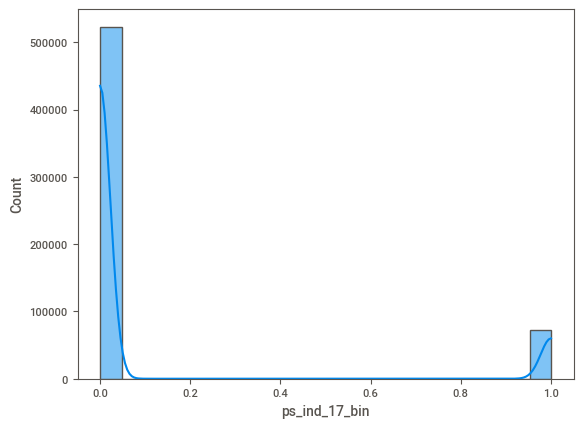

In [140]:
# data are not normally distributed

sns.histplot(x='ps_ind_17_bin',data=data,kde=True)

In [141]:
# finding lower & upper limit using IQR since data are not normally distributed

IQR=stats.iqr(data.ps_ind_17_bin,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.ps_ind_17_bin.quantile(0.25)
print('Q1 : ',Q1)

Q3=data.ps_ind_17_bin.quantile(0.75)
print('Q3 : ',Q3)

Lower_limit=Q1-1.5*IQR
print('Lower_limit : ',Lower_limit)

Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  0.0
Q1 :  0.0
Q3 :  0.0
Lower_limit :  0.0
Upper_limit :  0.0


In [142]:
data.loc[data['ps_ind_17_bin']<Lower_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

In [143]:
len(data.loc[data['ps_ind_17_bin']>Upper_limit])/len(data)

0.12102578577044817

- 12.1% OUTLIERS IN "ps_ind_17_bin"

## ps_ind_18_bin

In [144]:
data.ps_ind_18_bin.unique()

array([0, 1], dtype=int64)

In [145]:
data.ps_ind_18_bin.value_counts()

0    503892
1     91320
Name: ps_ind_18_bin, dtype: int64

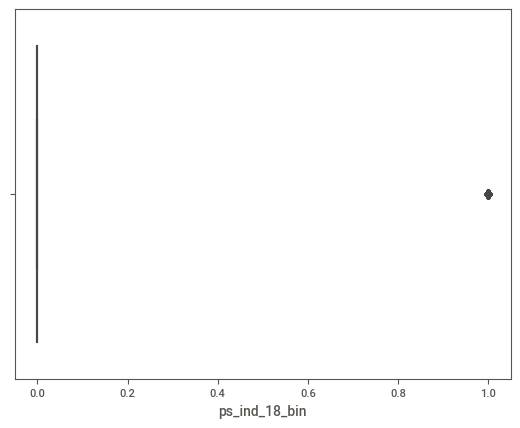

In [146]:
 # outlier present as per data visualization using boxplot

sns.boxplot(x='ps_ind_18_bin',data=data)
plt.show()

<AxesSubplot:xlabel='ps_ind_18_bin', ylabel='Count'>

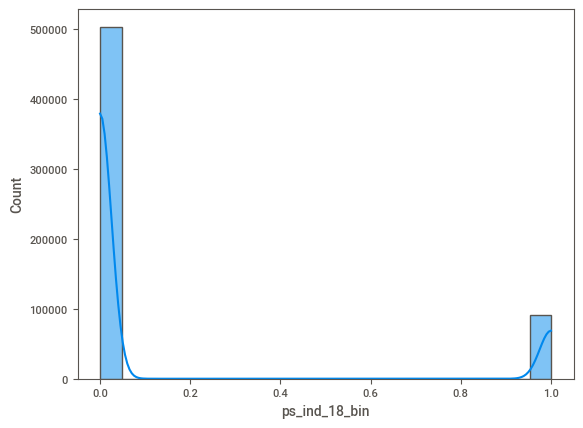

In [147]:
# data are not normally distributed

sns.histplot(x='ps_ind_18_bin',data=data,kde=True)

In [148]:
# finding lower & upper limit using IQR since data are not normally distributed

IQR=stats.iqr(data.ps_ind_18_bin,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.ps_ind_18_bin.quantile(0.25)
print('AQ1 : ',Q1)

Q3=data.ps_ind_18_bin.quantile(0.75)
print('Q3 : ',Q3)

Lower_limit=Q1-1.5*IQR
print('Lower_limit : ',Lower_limit)

Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  0.0
AQ1 :  0.0
Q3 :  0.0
Lower_limit :  0.0
Upper_limit :  0.0


In [149]:
data.loc[data['ps_ind_18_bin']<Lower_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

In [150]:
len(data.loc[data['ps_ind_18_bin']>Upper_limit])/len(data)

0.1534243261224572

- 15.3% OUTLIERS IN "ps_ind_18_bin"

## ps_reg_01

In [151]:
data.head(1)

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
0   7       0          2              2          5              1   

   ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ps_ind_09_bin  \
0              0              0              1              0              0   

   ps_ind_10_bin  ps_ind_11_bin  ps_ind_12_bin  ps_ind_13_bin  ps_ind_14  \
0              0              0              0              0          0   

   ps_ind_15  ps_ind_16_bin  ps_ind_17_bin  ps_ind_18_bin  ps_reg_01  \
0         11              0              1              0        0.7   

   ps_reg_02  ps_reg_03  ps_car_01_cat  ps_car_02_cat  ps_car_03_cat  \
0        0.2    0.71807             10              1             -1   

   ps_car_04_cat  ps_car_05_cat  ps_car_06_cat  ps_car_07_cat  ps_car_08_cat  \
0              0              1              4              1              0   

   ps_car_09_cat  ps_car_10_cat  ps_car_11_cat  ps_car_11  ps_car_12  \
0              0              1             12          2        0.4   

   ps_car_13  ps_car_14  ps_car_15  ps_calc_01  ps_calc_02  ps_calc_03  \
0   0.883679    0.37081   3.605551         0.6         0.5         0.2   

   ps_calc_04  ps_calc_05  ps_calc_06  ps_calc_07  ps_calc_08  ps_calc_09  \
0           3           1          10           1          10           1   

   ps_calc_10  ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  ps_calc_15_bin  \
0           5           9           1           5           8               0   

   ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  ps_calc_19_bin  \
0               1               1               0               0   

   ps_calc_20_bin  
0               1

In [152]:
data.ps_reg_01.unique()

array([0.7, 0.8, 0. , 0.9, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1])

In [153]:
data.ps_reg_01.value_counts()

0.9    194605
0.7     67897
0.8     60277
0.6     56243
0.4     53569
0.1     43192
0.3     40290
0.5     32341
0.2     25113
0.0     21685
Name: ps_reg_01, dtype: int64

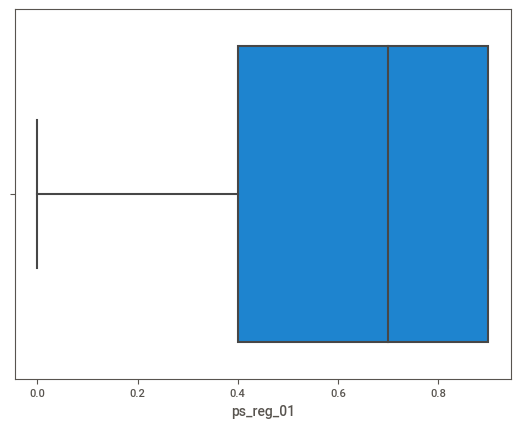

In [154]:
# No outlier present as per data visualization using boxplot


sns.boxplot(x='ps_reg_01',data=data)
plt.show()

<AxesSubplot:xlabel='ps_reg_01', ylabel='Count'>

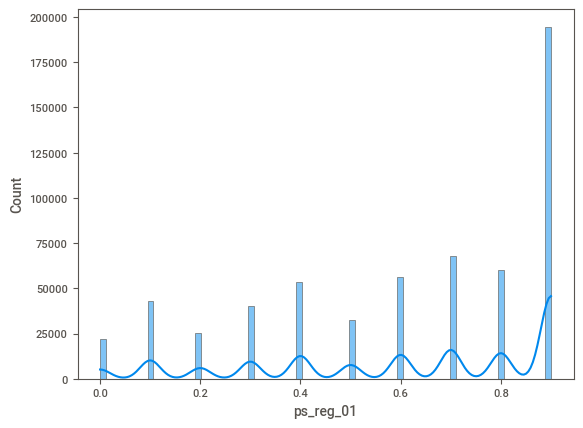

In [155]:
# checking distribution using histplot & data are not normally distributed

sns.histplot(x='ps_reg_01',data=data,kde=True)

In [156]:
# finding lower & upper limit using IQR since data are not normally distributed

IQR=stats.iqr(data.ps_reg_01,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.ps_reg_01.quantile(0.25)
print('Q1 : ',Q1)

Q3=data.ps_reg_01.quantile(0.75)
print('Q3 : ',Q3)

Lower_limit=Q1-1.5*IQR
print('Lower_limit : ',Lower_limit)

Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  0.5
Q1 :  0.4
Q3 :  0.9
Lower_limit :  -0.35
Upper_limit :  1.65


In [157]:
data.loc[data['ps_reg_01']<Lower_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

In [158]:
data.loc[data['ps_reg_01']>Upper_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

- THEY HAVE NO OUTLIERS IN "ps_reg_01"

## ps_reg_02

In [159]:
data.ps_reg_02.unique()

array([0.2, 0.4, 0. , 0.6, 1.8, 0.1, 0.7, 1.4, 0.9, 0.3, 0.5, 0.8, 1. ,
       1.3, 1.6, 1.5, 1.2, 1.1, 1.7])

In [160]:
data.ps_reg_02.value_counts()

0.2    114885
0.3     95033
0.0     89301
0.4     59746
0.5     36528
0.6     33474
0.1     31816
0.7     21210
0.8     19907
0.9     16788
1.2     15843
1.0     12570
1.3     11760
1.1     11320
1.4      6877
1.5      5845
1.6      5095
1.8      4736
1.7      2478
Name: ps_reg_02, dtype: int64

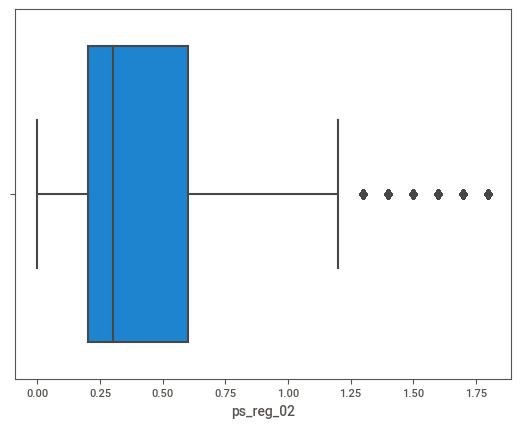

In [161]:
# outlier present as per data visualization using boxplot


sns.boxplot(x='ps_reg_02',data=data)
plt.show()

<AxesSubplot:xlabel='ps_reg_02', ylabel='Count'>

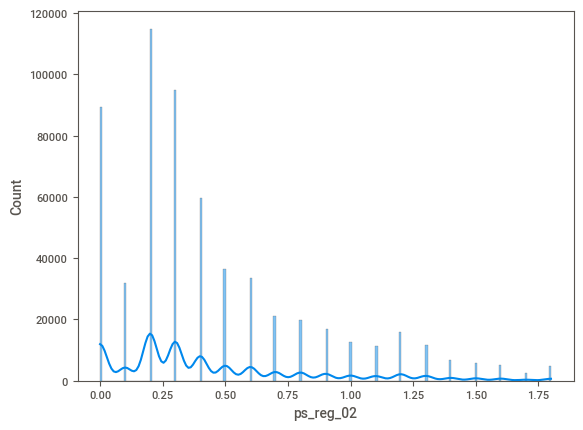

In [162]:
# data are not normally distributed

sns.histplot(x='ps_reg_02',data=data,kde=True)

In [163]:
# finding lower & upper limit using IQR since data are not normally distributed

IQR=stats.iqr(data.ps_reg_02,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.ps_reg_02.quantile(0.25)
print('Q1 : ',Q1)

Q3=data.ps_reg_02.quantile(0.75)
print('Q3 : ',Q3)

Lower_limit=Q1-1.5*IQR
print('Lower_limit : ',Lower_limit)

Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  0.39999999999999997
Q1 :  0.2
Q3 :  0.6
Lower_limit :  -0.39999999999999997
Upper_limit :  1.2


In [164]:
# outlier present in upper limit
data.loc[data['ps_reg_02']>Upper_limit]

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
5            19       0          5              1          4              0   
9            28       1          1              1          2              0   
38          104       0          4              1          9              0   
93          227       0          7              1         10              0   
98          248       0          5              1          2              0   
...         ...     ...        ...            ...        ...            ...   
595052  1487575       0          5              1          4              0   
595065  1487606       0          5              1         11              0   
595084  1487667       0          5              1          9              1   
595107  1487740       0          2              1          5              0   
595203  1488005       0          3              2          3              1   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  \
5                   0              0              0              0   
9                   0              0              1              0   
38                  0              0              0              0   
93                  0              0              1              0   
98                  0              0              1              0   
...               ...            ...            ...            ...   
595052              0              0              0              1   
595065              0              0              0              0   
595084              0              0              1              0   
595107              0              0              0              0   
595203              0              0              1              0   

        ps_ind_09_bin  ps_ind_10_bin  ps_ind_11_bin  ps_ind_12_bin  \
5                   1              0              0              0   
9                   0              0              0              0   
38                  1              0              0              0   
93                  0              0              0              0   
98                  0              0              0              0   
...               ...            ...            ...            ...   
595052              0              0              0              0   
595065              1              0              0              0   
595084              0              0              0              0   
595107              1              0              0              0   
595203              0              0              0              0   

        ps_ind_13_bin  ps_ind_14  ps_ind_15  ps_ind_16_bin  ps_ind_17_bin  \
5                   0          0          6              1              0   
9                   0          0          4              0              0   
38                  0          0          2              0              0   
93                  0          0         12              0              0   
98                  0          0          6              1              0   
...               ...        ...        ...            ...            ...   
595052              0          0          8              1              0   
595065              0          0         12              0              0   
595084              0          0          0              1              0   
595107              0          0         13              1              0   
595203              0          0          5              0              1   

        ps_ind_18_bin  ps_reg_01  ps_reg_02  ps_reg_03  ps_car_01_cat  \
5                   0        0.9        1.8   2.332649             10   
9                   1        0.9        1.4   2.316652             11   
38                  1        0.9        1.3   0.938416              6   
93                  1        0.9        1.6   1.675560             11   
98                  0        0.8        1.5   1.198697             11   
...               .

In [165]:
data.loc[data['ps_reg_02']<Lower_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

In [166]:
len(data.loc[data['ps_reg_02']>Upper_limit])/len(data)

0.06181158982009771

- 6.2% Outliers In 'ps_reg_02'

## ps_reg_03

In [167]:
data.ps_reg_03.unique()

array([ 0.71807033,  0.76607767, -1.        , ...,  1.60078106,
        1.63075903,  1.74355958])

In [168]:
data.ps_reg_03.value_counts()

-1.000000    107693
 0.633936       664
 0.602599       637
 0.704894       627
 0.587899       616
              ...  
 1.775704         1
 1.304320         1
 1.686527         1
 2.924359         1
 1.743560         1
Name: ps_reg_03, Length: 5014, dtype: int64

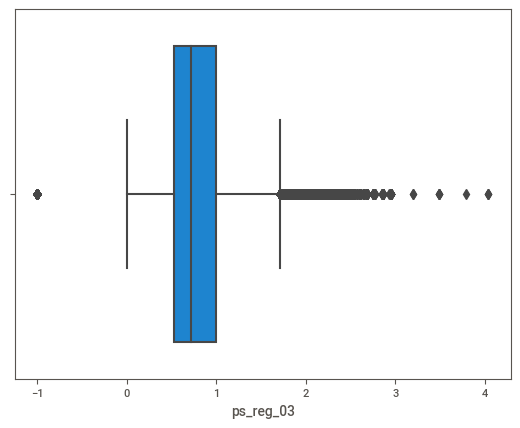

In [169]:
# outlier present as per data visualization using boxplot

sns.boxplot(x='ps_reg_03',data=data)
plt.show()

<AxesSubplot:xlabel='ps_reg_03', ylabel='Count'>

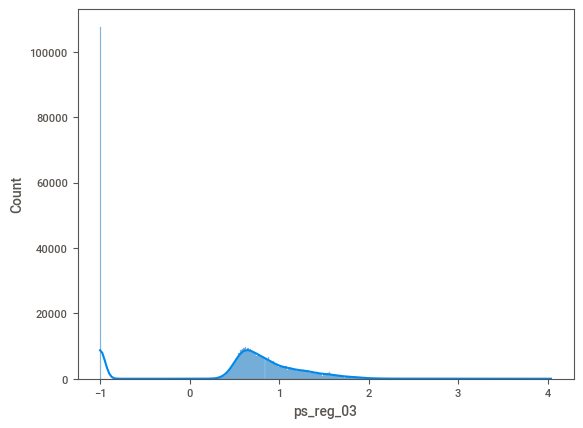

In [170]:
# data are not normally distributed

sns.histplot(x='ps_reg_03',data=data,kde=True)

In [171]:
# finding lower & upper limit using IQR since data are not normally distributed

from scipy import stats

IQR2=stats.iqr(data.ps_reg_03,interpolation='midpoint')

IQR2

0.475

In [172]:
Q_1=data.ps_reg_03.quantile(0.25)
Q_1

0.525

In [173]:
Q_3=data.ps_reg_03.quantile(0.75)
Q_3

1.0

In [174]:
lower_limit=Q_1-1.5*IQR2
lower_limit

-0.1874999999999999

In [175]:
upper_limit=Q_3+1.5*IQR2
upper_limit

1.7125

In [176]:
# outlier in lower limit

data.loc[data['ps_reg_03']<lower_limit]

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
2            13       0          5              1          9              1   
15           48       0          5              1          3              1   
18           61       0          5              1          8              0   
23           74       0          2              1          2              1   
25           78       0          0              1          7              0   
...         ...     ...        ...            ...        ...            ...   
595175  1487925       0          1              1          7              1   
595188  1487962       0          2              1          3              0   
595190  1487964       0          1              2          3              0   
595194  1487976       0          0              1          7              1   
595211  1488027       0          0              1          8              0   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  \
2                   0              0              0              1   
15                  0              0              1              0   
18                  0              1              0              0   
23                  0              0              1              0   
25                  0              1              0              0   
...               ...            ...            ...            ...   
595175              0              1              0              0   
595188              0              1              0              0   
595190              0              1              0              0   
595194              0              0              1              0   
595211              0              1              0              0   

        ps_ind_09_bin  ps_ind_10_bin  ps_ind_11_bin  ps_ind_12_bin  \
2                   0              0              0              0   
15                  0              0              0              0   
18                  0              0              0              0   
23                  0              0              0              0   
25                  0              0              0              0   
...               ...            ...            ...            ...   
595175              0              0              0              0   
595188              0              0              0              0   
595190              0              0              0              0   
595194              0              0              0              0   
595211              0              0              0              0   

        ps_ind_13_bin  ps_ind_14  ps_ind_15  ps_ind_16_bin  ps_ind_17_bin  \
2                   0          0         12              1              0   
15                  0          0          5              0              0   
18                  0          0         12              1              0   
23                  0          0          3              1              0   
25                  0          0         13              1              0   
...               ...        ...        ...            ...            ...   
595175              0          0          4              0              0   
595188              0          0          7              1              0   
595190              0          0          9              1              0   
595194              0          0         12              0              0   
595211              0          0          7              1              0   

        ps_ind_18_bin  ps_reg_01  ps_reg_02  ps_reg_03  ps_car_01_cat  \
2                   0        0.0        0.0       -1.0              7   
15                  1        0.4        0.3       -1.0              6   
18                  0        0.3        0.3       -1.0              7   
23                  0        0.2        0.2       -1.0              6   
25                  0        0.1        0.2       -1.0              4   
...               .

In [177]:
# outlier in upper limit

data.loc[data['ps_reg_03']>upper_limit]

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
5            19       0          5              1          4              0   
9            28       1          1              1          2              0   
127         330       0          2              1          4              0   
141         372       0          5              1          6              0   
156         413       0          4              1          5              0   
...         ...     ...        ...            ...        ...            ...   
594807  1486996       0          3              1          5              0   
594870  1487130       0          0              1          6              1   
594876  1487146       0          1              1          1              1   
595164  1487890       0          3              2          5              0   
595203  1488005       0          3              2          3              1   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  \
5                   0              0              0              0   
9                   0              0              1              0   
127                 0              0              0              0   
141                 0              0              0              0   
156                 0              0              0              0   
...               ...            ...            ...            ...   
594807              0              0              0              0   
594870              0              0              0              0   
594876              0              1              0              0   
595164              0              0              1              0   
595203              0              0              1              0   

        ps_ind_09_bin  ps_ind_10_bin  ps_ind_11_bin  ps_ind_12_bin  \
5                   1              0              0              0   
9                   0              0              0              0   
127                 1              0              0              0   
141                 1              0              0              0   
156                 1              0              0              0   
...               ...            ...            ...            ...   
594807              1              0              0              0   
594870              1              0              0              0   
594876              0              0              0              0   
595164              0              0              0              0   
595203              0              0              0              0   

        ps_ind_13_bin  ps_ind_14  ps_ind_15  ps_ind_16_bin  ps_ind_17_bin  \
5                   0          0          6              1              0   
9                   0          0          4              0              0   
127                 0          0          4              0              0   
141                 0          0          5              1              0   
156                 0          0          6              1              0   
...               ...        ...        ...            ...            ...   
594807              0          0          7              1              0   
594870              0          0         10              0              0   
594876              0          0          6              1              0   
595164              0          0         10              0              0   
595203              0          0          5              0              1   

        ps_ind_18_bin  ps_reg_01  ps_reg_02  ps_reg_03  ps_car_01_cat  \
5                   0        0.9        1.8   2.332649             10   
9                   1        0.9        1.4   2.316652             11   
127                 1        0.9        1.6   1.759616             10   
141                 0        0.9        1.4   2.097171             11   
156                 0        0.9        1.8   2.047254             11   
...               .

In [178]:
a=len(data.loc[data['ps_reg_03']<lower_limit])

In [179]:
b=len(data.loc[data['ps_reg_03']>upper_limit])

In [180]:
c=(a+b)/len(data)
c

0.202927696350208

- 20.3 % OUTLIERS IN "ps_reg_03"

## ps_car_01_cat

In [181]:
data.ps_car_01_cat.unique()

array([10, 11,  7,  6,  9,  5,  4,  8,  3,  0,  2,  1, -1], dtype=int64)

In [182]:
data.ps_car_01_cat.value_counts()

 11    207570
 7     179246
 6      62393
 10     50087
 4      26174
 9      20323
 5      18142
 8      15093
 3       6658
 0       5987
 2       2144
 1       1367
-1         28
Name: ps_car_01_cat, dtype: int64

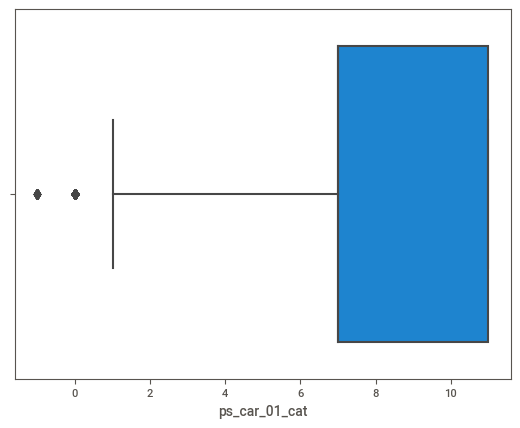

In [183]:
 # outlier present as per data visualization using boxplot

sns.boxplot(x='ps_car_01_cat',data=data)
plt.show()

<AxesSubplot:xlabel='ps_car_01_cat', ylabel='Count'>

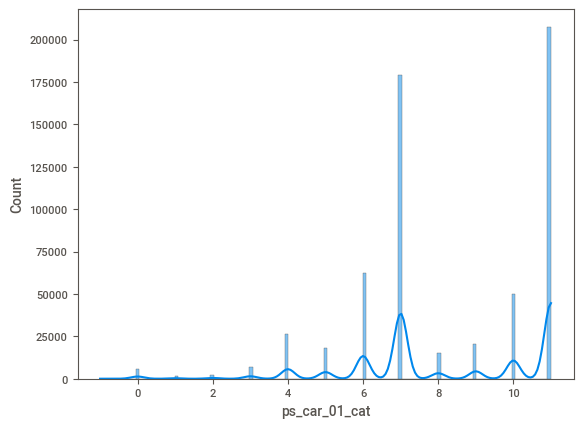

In [184]:
 # outlier present as per data visualization using histplot



sns.histplot(x='ps_car_01_cat',data=data,kde=True)

In [185]:
# finding lower & upper limit using IQR since data are not normally distributed

IQR=stats.iqr(data.ps_car_01_cat,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.ps_car_01_cat.quantile(0.25)
print('Q1 : ',Q1)

Q3=data.ps_car_01_cat.quantile(0.75)
print('Q3 : ',Q3)

Lower_limit=Q3-1.5*IQR
print('Lower_limit : ',Lower_limit)

Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  4.0
Q1 :  7.0
Q3 :  11.0
Lower_limit :  5.0
Upper_limit :  17.0


In [186]:
# outlier present in lower limit
data.loc[data['ps_car_01_cat']<Lower_limit]

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
24           77       0          0              1          2              0   
25           78       0          0              1          7              0   
27           80       0          4              1          6              0   
28           84       1          0              2          0              1   
56          144       0          0              2          5              0   
...         ...     ...        ...            ...        ...            ...   
595121  1487763       0          7              1         10              0   
595161  1487878       0          2              1          8              0   
595165  1487892       0          2              1          1              0   
595179  1487937       0          5              1          3              0   
595195  1487980       0          0              3          3              1   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  \
24                  0              1              0              0   
25                  0              1              0              0   
27                  0              0              0              0   
28                  4              1              0              0   
56                  0              1              0              0   
...               ...            ...            ...            ...   
595121              0              0              0              0   
595161              0              1              0              0   
595165              0              1              0              0   
595179              0              0              0              0   
595195              0              0              1              0   

        ps_ind_09_bin  ps_ind_10_bin  ps_ind_11_bin  ps_ind_12_bin  \
24                  0              0              0              0   
25                  0              0              0              0   
27                  1              0              0              0   
28                  0              0              0              0   
56                  0              0              0              0   
...               ...            ...            ...            ...   
595121              1              0              0              0   
595161              0              0              0              0   
595165              0              0              0              0   
595179              1              0              0              0   
595195              0              0              0              0   

        ps_ind_13_bin  ps_ind_14  ps_ind_15  ps_ind_16_bin  ps_ind_17_bin  \
24                  0          0          9              0              0   
25                  0          0         13              1              0   
27                  0          0         12              1              0   
28                  0          0          8              1              0   
56                  0          0         13              1              0   
...               ...        ...        ...            ...            ...   
595121              0          0         11              1              0   
595161              0          0         11              1              0   
595165              0          0          5              0              0   
595179              0          0          0              0              0   
595195              0          0          1              0              0   

        ps_ind_18_bin  ps_reg_01  ps_reg_02  ps_reg_03  ps_car_01_cat  \
24                  1        0.4        0.2   0.587367              4   
25                  0        0.1        0.2  -1.000000              4   
27                  0        0.9        0.8   1.034408              4   
28                  0        0.2        0.3  -1.000000              4   
56                  0        0.4        0.2   0.670820              3   
...               .

In [187]:
#no outlier in upper limit
data.loc[data['ps_car_01_cat']>Upper_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

In [188]:
len(data.loc[data['ps_car_01_cat']<Lower_limit])/len(data)

0.07116455985430402

- 7.1 % OOTLIERS IN "ps_car_01_cat"

## ps_car_02_cat

In [189]:
data.ps_car_02_cat.unique()

array([ 1,  0, -1], dtype=int64)

In [190]:
data.ps_car_02_cat.value_counts()

 1    493929
 0    101278
-1         5
Name: ps_car_02_cat, dtype: int64

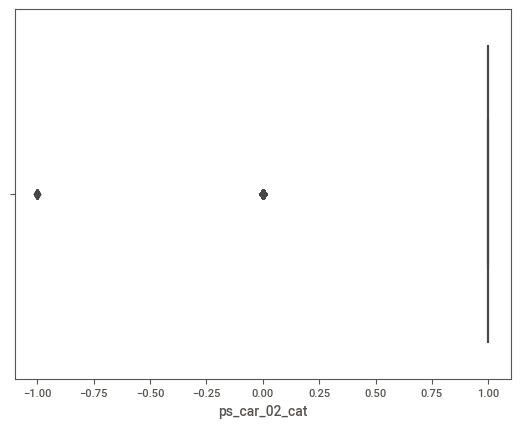

In [191]:
 # outlier present as per data visualization using boxplot

sns.boxplot(x='ps_car_02_cat',data=data)
plt.show()

<AxesSubplot:xlabel='ps_car_02_cat', ylabel='Count'>

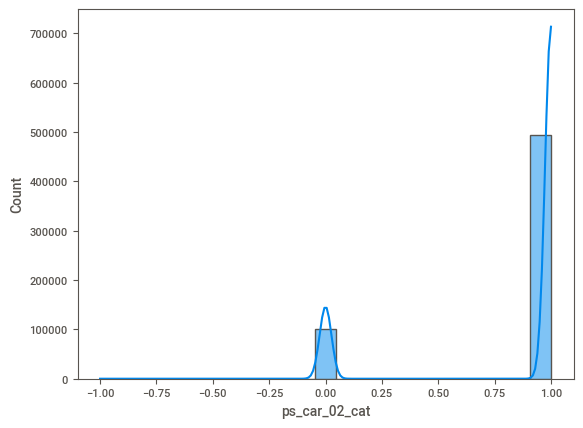

In [192]:
# data are not normally distributed

sns.histplot(x='ps_car_02_cat',data=data,kde=True)

In [193]:
# finding lower & upper limit using IQR since data are not normally distributed

IQR=stats.iqr(data.ps_car_02_cat,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.ps_car_02_cat.quantile(0.25)
print('Q1 : ',Q1)

Q3=data.ps_car_02_cat.quantile(0.75)
print('Q3 : ',Q3)

Lower_limit=Q3-1.5*IQR
print('Lower_limit : ',Lower_limit)

Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  0.0
Q1 :  1.0
Q3 :  1.0
Lower_limit :  1.0
Upper_limit :  1.0


In [194]:
# outlier present in lower limit

data.loc[data['ps_car_02_cat']<Lower_limit]

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
5            19       0          5              1          4              0   
9            28       1          1              1          2              0   
11           35       0          2              1          3              1   
22           72       0          5              3          6              1   
28           84       1          0              2          0              1   
...         ...     ...        ...            ...        ...            ...   
595176  1487931       0          2              1          4              0   
595178  1487935       0          0              1          5              1   
595193  1487975       0          0              2          0              0   
595195  1487980       0          0              3          3              1   
595211  1488027       0          0              1          8              0   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  \
5                   0              0              0              0   
9                   0              0              1              0   
11                  0              0              1              0   
22                  3              0              1              0   
28                  4              1              0              0   
...               ...            ...            ...            ...   
595176              0              0              0              1   
595178              0              1              0              0   
595193             -1              0              1              0   
595195              0              0              1              0   
595211              0              1              0              0   

        ps_ind_09_bin  ps_ind_10_bin  ps_ind_11_bin  ps_ind_12_bin  \
5                   1              0              0              0   
9                   0              0              0              0   
11                  0              0              0              0   
22                  0              0              0              0   
28                  0              0              0              0   
...               ...            ...            ...            ...   
595176              0              0              0              0   
595178              0              0              0              0   
595193              0              0              0              0   
595195              0              0              0              0   
595211              0              0              0              0   

        ps_ind_13_bin  ps_ind_14  ps_ind_15  ps_ind_16_bin  ps_ind_17_bin  \
5                   0          0          6              1              0   
9                   0          0          4              0              0   
11                  0          0          9              1              0   
22                  0          0         11              1              0   
28                  0          0          8              1              0   
...               ...        ...        ...            ...            ...   
595176              0          0         12              1              0   
595178              0          0         12              1              0   
595193              0          0          6              1              0   
595195              0          0          1              0              0   
595211              0          0          7              1              0   

        ps_ind_18_bin  ps_reg_01  ps_reg_02  ps_reg_03  ps_car_01_cat  \
5                   0        0.9        1.8   2.332649             10   
9                   1        0.9        1.4   2.316652             11   
11                  0        0.9        0.1   0.378319             11   
22                  0        0.6        0.4   0.742041              5   
28                  0        0.2        0.3  -1.000000              4   
...               .

In [195]:
data.loc[data['ps_car_02_cat']>Upper_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

In [196]:
len(data.loc[data['ps_car_02_cat']<Lower_limit])/len(data)

0.17016289994153344

- 17 % OUTLIERS IN "ps_car_02_cat"

## ps_car_03_cat

In [197]:
data.ps_car_03_cat.unique()

array([-1,  0,  1], dtype=int64)

In [198]:
data.ps_car_03_cat.value_counts()

-1    411231
 1    110677
 0     73304
Name: ps_car_03_cat, dtype: int64

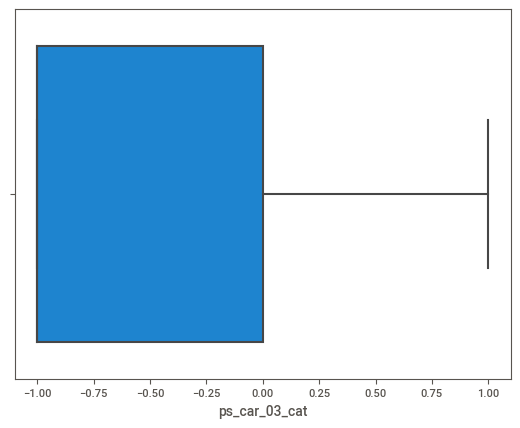

In [199]:
 # no outlier present as per data visualization using boxplot


sns.boxplot(x='ps_car_03_cat',data=data)
plt.show()

<AxesSubplot:xlabel='ps_car_03_cat', ylabel='Count'>

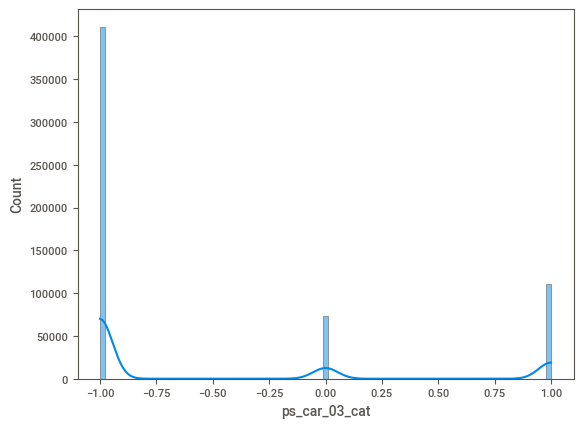

In [200]:
# data are not normally distributed

sns.histplot(x='ps_car_03_cat',data=data,kde=True)

In [201]:
# finding lower & upper limit using IQR since data are not normally distributed

IQR=stats.iqr(data.ps_car_03_cat,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.ps_car_03_cat.quantile(0.25)
print('Q1 : ',Q1)

Q3=data.ps_car_03_cat.quantile(0.75)
print('Q3 : ',Q3)

Lower_limit=Q3-1.5*IQR
print('Lower_limit : ',Lower_limit)

Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  1.0
Q1 :  -1.0
Q3 :  0.0
Lower_limit :  -1.5
Upper_limit :  1.5


In [202]:
# no outlier in lower limit
data.loc[data['ps_car_03_cat']<Lower_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

In [203]:
# no outlier in upper limit
data.loc[data['ps_car_03_cat']>Upper_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

- NO OUTLIERS IN "ps_car_03_cat"

## ps_car_04_cat

In [204]:
data.ps_car_04_cat.unique()

array([0, 1, 8, 9, 2, 6, 3, 7, 4, 5], dtype=int64)

In [205]:
data.ps_car_04_cat.value_counts()

0    496637
1     32110
2     23738
8     20591
9     19024
6      1559
3       640
5       544
4       230
7       139
Name: ps_car_04_cat, dtype: int64

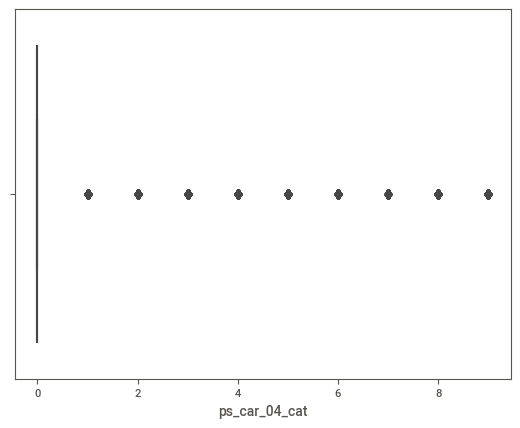

In [206]:
# outlier present as per data visualization using boxplot


sns.boxplot(x='ps_car_04_cat',data=data)
plt.show()

<AxesSubplot:xlabel='ps_car_04_cat', ylabel='Count'>

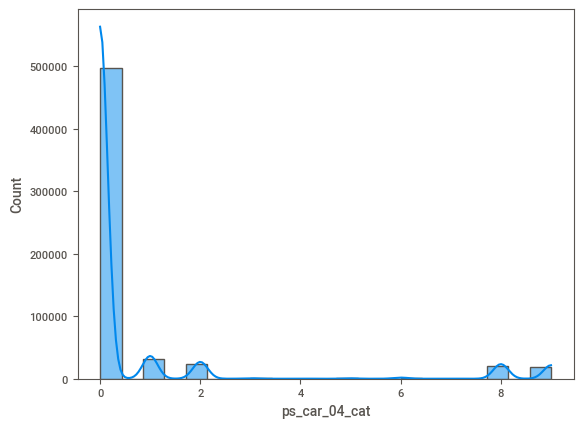

In [207]:
# data are not normally distributed
sns.histplot(x='ps_car_04_cat',data=data,kde=True)

In [208]:
# finding lower & upper limit using IQR since data are not normally distributed

IQR=stats.iqr(data.ps_car_04_cat,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.ps_car_04_cat.quantile(0.25)
print('Q1 : ',Q1)

Q3=data.ps_car_04_cat.quantile(0.75)
print('Q3 : ',Q3)

Lower_limit=Q3-1.5*IQR
print('Lower_limit : ',Lower_limit)

Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  0.0
Q1 :  0.0
Q3 :  0.0
Lower_limit :  0.0
Upper_limit :  0.0


In [209]:
# outlier present in upper limit
data.loc[data['ps_car_04_cat']>Upper_limit]

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
9            28       1          1              1          2              0   
10           34       0          5              2          2              0   
15           48       0          5              1          3              1   
16           50       0          1              2          1              0   
25           78       0          0              1          7              0   
...         ...     ...        ...            ...        ...            ...   
595184  1487952       0          1              1          5              0   
595187  1487958       0          0              1          7              0   
595196  1487983       0          1              1          2              0   
595197  1487988       0          1              1          7              1   
595206  1488011       0          0              1          2              0   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  \
9                   0              0              1              0   
10                  0              0              0              1   
15                  0              0              1              0   
16                  0              0              0              1   
25                  0              1              0              0   
...               ...            ...            ...            ...   
595184              0              1              0              0   
595187              4              0              0              0   
595196              0              1              0              0   
595197              0              0              1              0   
595206              0              0              0              0   

        ps_ind_09_bin  ps_ind_10_bin  ps_ind_11_bin  ps_ind_12_bin  \
9                   0              0              0              0   
10                  0              0              0              0   
15                  0              0              0              0   
16                  0              0              0              0   
25                  0              0              0              0   
...               ...            ...            ...            ...   
595184              0              0              0              0   
595187              1              0              0              0   
595196              0              0              0              0   
595197              0              0              0              0   
595206              1              0              0              0   

        ps_ind_13_bin  ps_ind_14  ps_ind_15  ps_ind_16_bin  ps_ind_17_bin  \
9                   0          0          4              0              0   
10                  0          0          3              1              0   
15                  0          0          5              0              0   
16                  0          0          9              1              0   
25                  0          0         13              1              0   
...               ...        ...        ...            ...            ...   
595184              0          0          2              0              0   
595187              0          0          6              1              0   
595196              0          0          0              0              0   
595197              0          0         10              0              0   
595206              0          0          2              1              0   

        ps_ind_18_bin  ps_reg_01  ps_reg_02  ps_reg_03  ps_car_01_cat  \
9                   1        0.9        1.4   2.316652             11   
10                  0        0.5        0.4   0.795692             11   
15                  1        0.4        0.3  -1.000000              6   
16                  0        0.6        0.3   0.699553             11   
25                  0        0.1        0.2  -1.000000              4   
...               .

In [210]:
data.loc[data['ps_car_04_cat']<Lower_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

In [211]:
len(data.loc[data['ps_car_04_cat']>Upper_limit])/len(data)

0.16561326048533967

- 16.6 % OUTLIERS IN "ps_car_04_cat"

## ps_car_05_cat

In [212]:
data.ps_car_05_cat.unique()

array([ 1, -1,  0], dtype=int64)

In [213]:
data.ps_car_05_cat.value_counts()

-1    266551
 1    172622
 0    156039
Name: ps_car_05_cat, dtype: int64

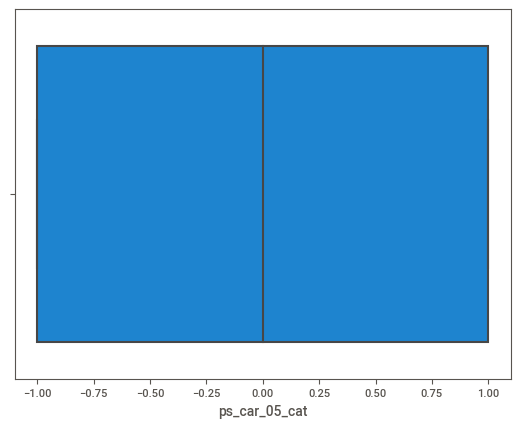

In [214]:
# data visualization using boxplot

sns.boxplot(x='ps_car_05_cat',data=data)
plt.show()

<AxesSubplot:xlabel='ps_car_05_cat', ylabel='Count'>

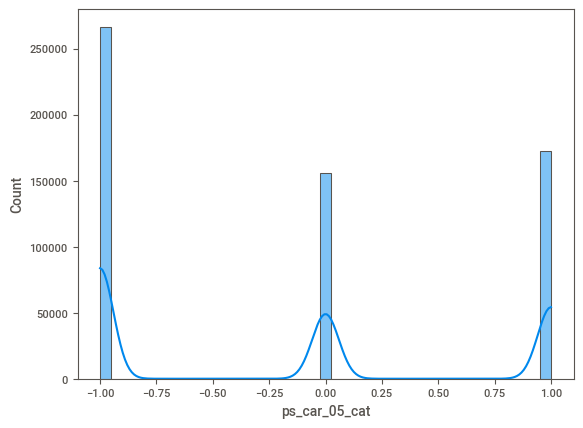

In [215]:
# checking distribution using histplot & data are not normally distributed

sns.histplot(x='ps_car_05_cat',data=data,kde=True)

In [216]:
# finding lower & upper limit using IQR since data are not normally distributed

IQR=stats.iqr(data.ps_car_05_cat,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.ps_car_05_cat.quantile(0.25)
print('Q1 : ',Q1)

Q3=data.ps_car_05_cat.quantile(0.75)
print('Q3 : ',Q3)

Lower_limit=Q3-1.5*IQR
print('Lower_limit : ',Lower_limit)

Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  2.0
Q1 :  -1.0
Q3 :  1.0
Lower_limit :  -2.0
Upper_limit :  4.0


In [217]:
data.loc[data['ps_car_05_cat']<Lower_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

In [218]:
data.loc[data['ps_car_05_cat']>Upper_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

- THEY HAVE NO OUTLIERS IN "ps_car_05_cat"

## ps_car_06_cat

In [219]:
data.ps_car_06_cat.unique()

array([ 4, 11, 14, 13,  6, 15,  3,  0,  1, 10, 12,  9, 17,  7,  8,  5,  2,
       16], dtype=int64)

In [220]:
data.ps_car_06_cat.value_counts()

11    131520
1     118365
0     110496
14     59251
10     33463
4      31129
15     21727
6      20938
9      17614
7      16156
3      11995
13      6243
17      4932
16      4582
12      2386
2       1606
8       1410
5       1399
Name: ps_car_06_cat, dtype: int64

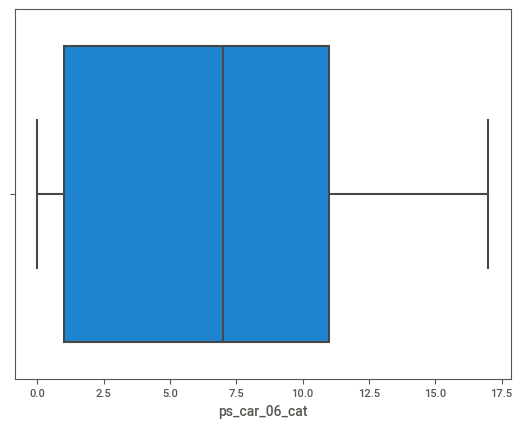

In [221]:
#data visualization using boxplot to check outlier

sns.boxplot(x='ps_car_06_cat',data=data)
plt.show()

<AxesSubplot:xlabel='ps_car_06_cat', ylabel='Count'>

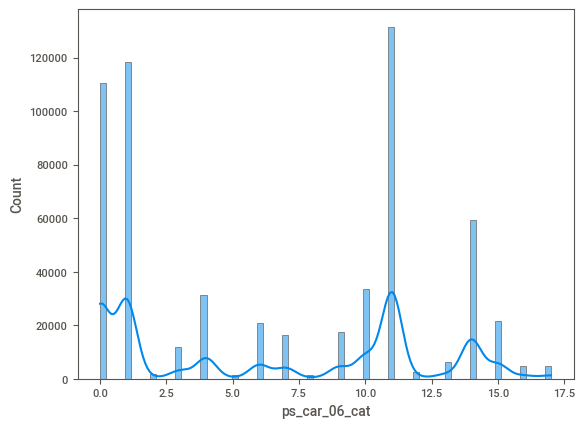

In [222]:
# checking distribution using histplot & data are not normally distributed

sns.histplot(x='ps_car_06_cat',data=data,kde=True)

In [223]:
# finding lower & upper limit using IQR since data are not normally distributed

IQR=stats.iqr(data.ps_car_06_cat,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.ps_car_06_cat.quantile(0.25)
print('Q1 : ',Q1)

Q3=data.ps_car_06_cat.quantile(0.75)
print('Q3 : ',Q3)

Lower_limit=Q3-1.5*IQR
print('Lower_limit : ',Lower_limit)

Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  10.0
Q1 :  1.0
Q3 :  11.0
Lower_limit :  -4.0
Upper_limit :  26.0


In [224]:
# no outlier on lower limit

data.loc[data['ps_car_06_cat']<Lower_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

In [225]:
# no outlier on upper limit

data.loc[data['ps_car_06_cat']>Upper_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

- THEY HAVE NO OUTLIERS IN 'ps_car_06_cat'

## ps_car_07_cat

In [226]:
data.ps_car_07_cat.unique()

array([ 1, -1,  0], dtype=int64)

In [227]:
data.ps_car_07_cat.value_counts()

 1    553145
 0     30658
-1     11409
Name: ps_car_07_cat, dtype: int64

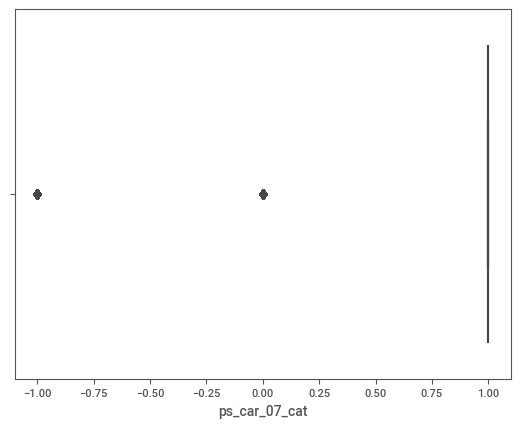

In [228]:
 # outlier present as per data visualization using boxplot

sns.boxplot(x='ps_car_07_cat',data=data)
plt.show()

<AxesSubplot:xlabel='ps_car_07_cat', ylabel='Count'>

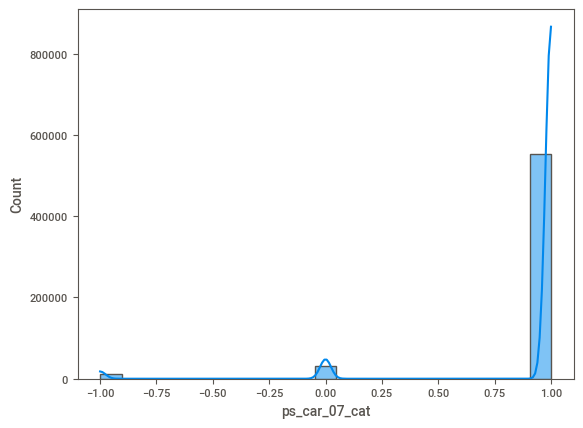

In [229]:
# checking distribution using histplot & data are not normally distributed

sns.histplot(x='ps_car_07_cat',data=data,kde=True)

In [230]:

# finding lower & upper limit using IQR since data are not normally distributed

IQR=stats.iqr(data.ps_car_07_cat,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.ps_car_07_cat.quantile(0.25)
print('Q1 : ',Q1)

Q3=data.ps_car_07_cat.quantile(0.75)
print('Q3 : ',Q3)

Lower_limit=Q3-1.5*IQR
print('Lower_limit : ',Lower_limit)

Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  0.0
Q1 :  1.0
Q3 :  1.0
Lower_limit :  1.0
Upper_limit :  1.0


In [231]:
# outlier present in lower limit

data.loc[data['ps_car_07_cat']<Lower_limit]

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
95          235       0          3              1          6              0   
99          261       0          0              1          5              0   
113         306       0          2              1          6              0   
130         340       0          0              1          6              0   
152         404       0          2              2          1              0   
...         ...     ...        ...            ...        ...            ...   
595184  1487952       0          1              1          5              0   
595187  1487958       0          0              1          7              0   
595193  1487975       0          0              2          0              0   
595196  1487983       0          1              1          2              0   
595208  1488016       0          5              1          3              0   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  \
95                  0              0              1              0   
99                  6              1              0              0   
113                 0              0              0              1   
130                 0              1              0              0   
152                -1              0              0              0   
...               ...            ...            ...            ...   
595184              0              1              0              0   
595187              4              0              0              0   
595193             -1              0              1              0   
595196              0              1              0              0   
595208              0              0              0              0   

        ps_ind_09_bin  ps_ind_10_bin  ps_ind_11_bin  ps_ind_12_bin  \
95                  0              0              0              0   
99                  0              0              0              0   
113                 0              0              0              0   
130                 0              0              0              0   
152                 1              0              0              0   
...               ...            ...            ...            ...   
595184              0              0              0              0   
595187              1              0              0              0   
595193              0              0              0              0   
595196              0              0              0              0   
595208              1              0              0              0   

        ps_ind_13_bin  ps_ind_14  ps_ind_15  ps_ind_16_bin  ps_ind_17_bin  \
95                  0          0          6              0              1   
99                  0          0          9              1              0   
113                 0          0          8              1              0   
130                 0          0          0              0              1   
152                 0          0          7              1              0   
...               ...        ...        ...            ...            ...   
595184              0          0          2              0              0   
595187              0          0          6              1              0   
595193              0          0          6              1              0   
595196              0          0          0              0              0   
595208              0          0          6              1              0   

        ps_ind_18_bin  ps_reg_01  ps_reg_02  ps_reg_03  ps_car_01_cat  \
95                  0        0.9        0.4   0.918218             11   
99                  0        0.9        0.2   0.640312             11   
113                 0        0.0        0.0   0.646626             10   
130                 0        0.6        0.4   1.146734              5   
152                 0        0.6        0.2   0.671286              8   
...               .

In [232]:
# no outlier present in upper limit

data.loc[data['ps_car_07_cat']>Upper_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

In [233]:
len(data.loc[data['ps_car_07_cat']<Lower_limit])/len(data)

0.07067565842086516

- 7.1% Outliers Occured

## ps_car_08_cat

In [234]:
data.ps_car_08_cat.unique()

array([0, 1], dtype=int64)

In [235]:
data.ps_car_08_cat.value_counts()

1    495199
0    100013
Name: ps_car_08_cat, dtype: int64

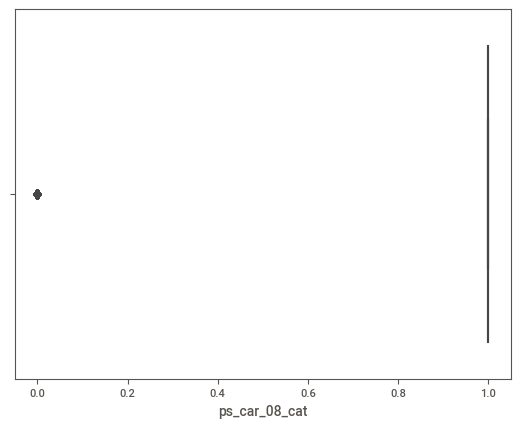

In [236]:
 # outlier present as per data visualization using boxplot
sns.boxplot(x='ps_car_08_cat',data=data)
plt.show()

<AxesSubplot:xlabel='ps_car_08_cat', ylabel='Count'>

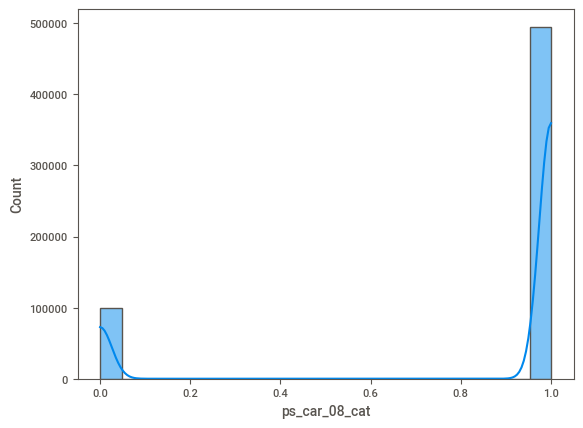

In [237]:
# checking distribution using histplot & data are not normally distributed
sns.histplot(x='ps_car_08_cat',data=data,kde=True)

In [238]:
# finding lower & upper limit using IQR since data are not normally distributed

IQR=stats.iqr(data.ps_car_08_cat,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.ps_car_08_cat.quantile(0.25)
print('Q1 : ',Q1)

Q3=data.ps_car_08_cat.quantile(0.75)
print('Q3 : ',Q3)

Lower_limit=Q3-1.5*IQR
print('Lower_limit : ',Lower_limit)

Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  0.0
Q1 :  1.0
Q3 :  1.0
Lower_limit :  1.0
Upper_limit :  1.0


In [239]:
#outlier present in lower limit

data.loc[data['ps_car_08_cat']<Lower_limit]

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
0             7       0          2              2          5              1   
11           35       0          2              1          3              1   
15           48       0          5              1          3              1   
17           58       0          5              1          6              0   
26           79       0          0              1          4              1   
...         ...     ...        ...            ...        ...            ...   
595195  1487980       0          0              3          3              1   
595199  1487992       0          3              1          3              1   
595203  1488005       0          3              2          3              1   
595208  1488016       0          5              1          3              0   
595211  1488027       0          0              1          8              0   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  \
0                   0              0              1              0   
11                  0              0              1              0   
15                  0              0              1              0   
17                  1              1              0              0   
26                  0              0              0              1   
...               ...            ...            ...            ...   
595195              0              0              1              0   
595199              0              0              0              1   
595203              0              0              1              0   
595208              0              0              0              0   
595211              0              1              0              0   

        ps_ind_09_bin  ps_ind_10_bin  ps_ind_11_bin  ps_ind_12_bin  \
0                   0              0              0              0   
11                  0              0              0              0   
15                  0              0              0              0   
17                  0              0              0              0   
26                  0              0              0              0   
...               ...            ...            ...            ...   
595195              0              0              0              0   
595199              0              0              0              0   
595203              0              0              0              0   
595208              1              0              0              0   
595211              0              0              0              0   

        ps_ind_13_bin  ps_ind_14  ps_ind_15  ps_ind_16_bin  ps_ind_17_bin  \
0                   0          0         11              0              1   
11                  0          0          9              1              0   
15                  0          0          5              0              0   
17                  0          0          4              1              0   
26                  0          0          8              1              0   
...               ...        ...        ...            ...            ...   
595195              0          0          1              0              0   
595199              0          0         13              1              0   
595203              0          0          5              0              1   
595208              0          0          6              1              0   
595211              0          0          7              1              0   

        ps_ind_18_bin  ps_reg_01  ps_reg_02  ps_reg_03  ps_car_01_cat  \
0                   0        0.7        0.2   0.718070             10   
11                  0        0.9        0.1   0.378319             11   
15                  1        0.4        0.3  -1.000000              6   
17                  0        0.9        0.5   0.810864             11   
26                  0        0.6        0.2   0.666146             10   
...               .

In [240]:
data.loc[data['ps_car_08_cat']>Upper_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

In [241]:
len(data.loc[data['ps_car_08_cat']<Lower_limit])/len(data)

0.16802920640040858

- 16.8 % Outliers In 'ps_car_08_cat'

## ps_car_09_cat

In [242]:
data.ps_car_09_cat.unique()

array([ 0,  2,  3,  1, -1,  4], dtype=int64)

In [243]:
data.ps_car_09_cat.value_counts()

 2    353479
 0    194601
 1     29059
 3     14755
 4      2807
-1       511
Name: ps_car_09_cat, dtype: int64

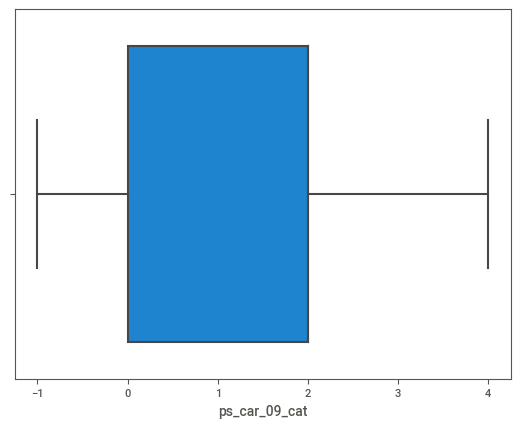

In [244]:
# outlier present as per data visualization using boxplot

sns.boxplot(x='ps_car_09_cat',data=data)
plt.show()

<AxesSubplot:xlabel='ps_car_09_cat', ylabel='Count'>

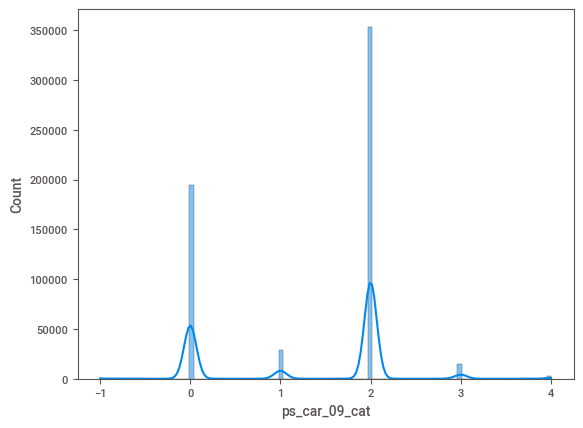

In [245]:
# checking distribution using histplot & data are not normally distributed
sns.histplot(x='ps_car_09_cat',data=data,kde=True)

In [246]:
# finding lower & upper limit using IQR since data are not normally distributed

IQR=stats.iqr(data.ps_car_09_cat,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.ps_car_09_cat.quantile(0.25)
print('Q1 : ',Q1)

Q3=data.ps_car_09_cat.quantile(0.75)
print('Q3 : ',Q3)

Lower_limit=Q3-1.5*IQR
print('Lower_limit : ',Lower_limit)

Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  2.0
Q1 :  0.0
Q3 :  2.0
Lower_limit :  -1.0
Upper_limit :  5.0


In [247]:
(data.loc[data['ps_car_09_cat']<Lower_limit] | data.loc[data['ps_car_09_cat']>Upper_limit])

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

- NO OUTLIERS IN "ps_car_09_cat"

## ps_car_10_cat

In [248]:
data.ps_car_10_cat.unique()

array([1, 0, 2], dtype=int64)

In [249]:
data.ps_car_10_cat.value_counts()

1    590101
0      4935
2       176
Name: ps_car_10_cat, dtype: int64

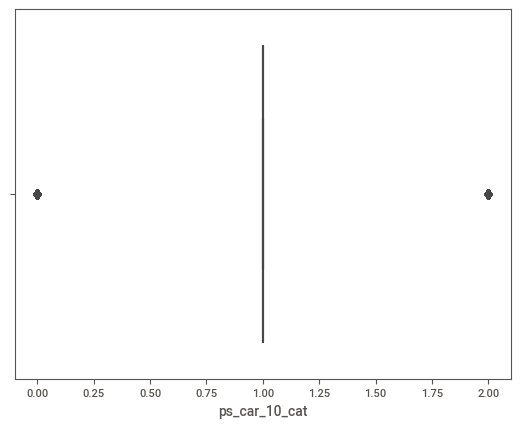

In [250]:
# outlier present as per data visualization using boxplot

sns.boxplot(x='ps_car_10_cat',data=data)
plt.show()

In [251]:
# finding lower & upper limit using IQR since data are not normally distributed

IQR3=stats.iqr(data.ps_car_10_cat,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.ps_car_10_cat.quantile(0.25)
print('Q1 : ',Q1)

Q3=data.ps_car_10_cat.quantile(0.75)
print('Q3 : ',Q3)

lower=Q1-1.5*IQR3
print('lower : ',lower)

upper=Q3+1.5*IQR
print('upper : ',upper)

IQR :  2.0
Q1 :  1.0
Q3 :  1.0
lower :  1.0
upper :  4.0


In [252]:
# outlier present in lower limit
data.loc[data['ps_car_10_cat']<lower]

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
148         397       0          5              2          7              1   
430        1162       0          1              1          5              1   
514        1394       0          0              1          9              0   
759        1962       0          0              1          9              0   
847           0       0          0              0          0              0   
...         ...     ...        ...            ...        ...            ...   
594512  1486259       0          1              1          6              0   
594546  1486336       0          5              2          5              1   
594548  1486340       0          1              1          9              0   
594571  1486403       0          1              1          2              0   
594860  1487106       0          1              1          3              0   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  \
148                 0              1              0              0   
430                 0              1              0              0   
514                 0              1              0              0   
759                 0              1              0              0   
847                 0              0              0              0   
...               ...            ...            ...            ...   
594512              0              0              0              0   
594546              0              0              0              0   
594548              0              1              0              0   
594571              0              1              0              0   
594860              0              1              0              0   

        ps_ind_09_bin  ps_ind_10_bin  ps_ind_11_bin  ps_ind_12_bin  \
148                 0              0              0              0   
430                 0              0              0              0   
514                 0              0              0              0   
759                 0              0              0              0   
847                 0              0              0              0   
...               ...            ...            ...            ...   
594512              1              0              0              0   
594546              1              0              0              0   
594548              0              0              0              0   
594571              0              0              0              0   
594860              0              0              0              0   

        ps_ind_13_bin  ps_ind_14  ps_ind_15  ps_ind_16_bin  ps_ind_17_bin  \
148                 0          0          7              1              0   
430                 0          0          5              1              0   
514                 0          0          6              0              1   
759                 0          0          5              1              0   
847                 0          0          0              0              0   
...               ...        ...        ...            ...            ...   
594512              0          0         11              0              1   
594546              0          0         13              1              0   
594548              0          0          8              1              0   
594571              0          0          0              0              1   
594860              0          0          5              1              0   

        ps_ind_18_bin  ps_reg_01  ps_reg_02  ps_reg_03  ps_car_01_cat  \
148                 0        0.9        0.3   1.100000              7   
430                 0        0.9        0.3  -1.000000              7   
514                 0        0.7        0.3   0.649038              7   
759                 0        0.7        0.2   0.448609              7   
847                 0        0.0        0.0   0.000000              0   
...               .

In [253]:

data.loc[data['ps_car_10_cat']>upper]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

In [254]:
# imputing outlier with median
data.loc[data['ps_car_10_cat']<lower,'ps_car_10_cat']=data.ps_car_10_cat.median()

In [255]:
data.loc[data['ps_car_10_cat']>upper,'ps_car_10_cat']=data.ps_car_10_cat.median()

In [256]:
data.loc[data['ps_car_10_cat']<lower]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

In [257]:
data.loc[data['ps_car_10_cat']>upper]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

## ps_car_11_cat

In [258]:
data.ps_car_11_cat.unique()

array([ 12,  19,  60, 104,  82,  99,  30,  68,  20,  36, 101, 103,  41,
        59,  43,  64,  29,  95,  24,   5,  28,  87,  66,  10,  26,  54,
        32,  38,  83,  89,  49,  93,   1,  22,  85,  78,  31,  34,   7,
         8,   3,  46,  27,  25,  61,  16,  69,  40,  76,  39,  88,  42,
        75,  91,  23,   2,  71,  90,  80,  44,  92,  72,  96,  86,  62,
        33,  67,  73,  77,  18,  21,  74,  37,  48,  70,  13,  15, 102,
        53,  65, 100,  51,  79,  52,  63,  94,   6,  57,  35,  98,  56,
        97,  55,  84,  50,   4,  58,   9,  17,  11,  45,  14,   0,  81,
        47], dtype=int64)

In [259]:
data.ps_car_11_cat.value_counts()

104    85036
103    24261
64     22278
87     17106
32     12577
       ...  
81      1433
56      1272
18      1233
63      1102
0         83
Name: ps_car_11_cat, Length: 105, dtype: int64

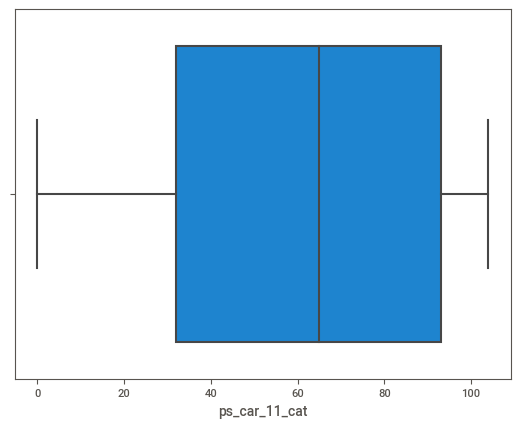

In [260]:
# No outlier present as per data visualization using boxplot

sns.boxplot(x='ps_car_11_cat',data=data)
plt.show()

<AxesSubplot:xlabel='ps_car_11_cat', ylabel='Count'>

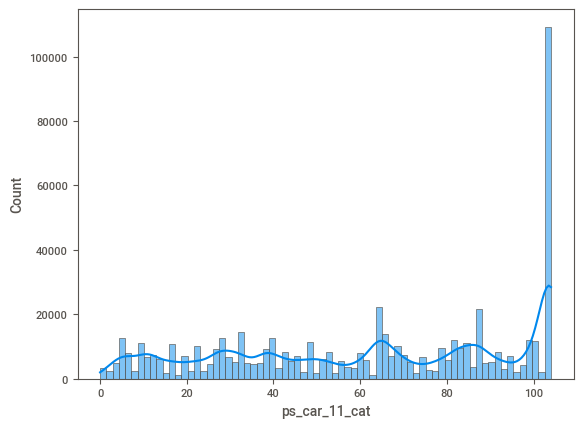

In [261]:
# checking distribution using histplot & data are not normally distributed
sns.histplot(x='ps_car_11_cat',data=data,kde=True)

In [262]:
# finding lower & upper limit using IQR since data are not normally distributed

IQR=stats.iqr(data.ps_car_11_cat,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.ps_car_11_cat.quantile(0.25)
print('Q1 : ',Q1)

Q3=data.ps_car_11_cat.quantile(0.75)
print('Q3 : ',Q3)

Lower_limit=Q3-1.5*IQR
print('Lower_limit : ',Lower_limit)

Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  61.0
Q1 :  32.0
Q3 :  93.0
Lower_limit :  1.5
Upper_limit :  184.5


In [263]:
# outlier present in lower limit
data.loc[data['ps_car_11_cat']<Lower_limit]

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
47          120       0          0              1          9              0   
193         489       0          4              3          6              1   
228         570       0          0              1          8              0   
440        1193       0          3              1          2              0   
539        1455       0          1              1          8              0   
...         ...     ...        ...            ...        ...            ...   
592828  1481896       0          1              3          2              0   
592830  1481899       0          3              1          8              0   
593451  1483511       0          2              1          6              0   
593811  1484469       0          1              2          3              0   
595127  1487783       0          2              3          4              0   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  \
47                  0              0              1              0   
193                 0              0              0              1   
228                 0              1              0              0   
440                 0              0              0              1   
539                 0              0              1              0   
...               ...            ...            ...            ...   
592828              0              0              0              1   
592830              0              0              0              1   
593451              0              0              0              1   
593811              0              0              0              1   
595127              0              0              1              0   

        ps_ind_09_bin  ps_ind_10_bin  ps_ind_11_bin  ps_ind_12_bin  \
47                  0              0              0              0   
193                 0              0              0              0   
228                 0              0              0              0   
440                 0              0              0              0   
539                 0              0              0              0   
...               ...            ...            ...            ...   
592828              0              0              0              0   
592830              0              0              0              0   
593451              0              0              0              0   
593811              0              0              0              0   
595127              0              0              0              0   

        ps_ind_13_bin  ps_ind_14  ps_ind_15  ps_ind_16_bin  ps_ind_17_bin  \
47                  0          0          5              1              0   
193                 0          0          8              1              0   
228                 0          0          4              0              0   
440                 0          0          1              0              0   
539                 0          0          0              0              1   
...               ...        ...        ...            ...            ...   
592828              0          0          6              1              0   
592830              0          0         12              1              0   
593451              0          0         11              0              1   
593811              0          0          0              0              0   
595127              0          0          3              0              0   

        ps_ind_18_bin  ps_reg_01  ps_reg_02  ps_reg_03  ps_car_01_cat  \
47                  0        0.1        0.2  -1.000000              7   
193                 0        0.8        0.9   1.086566              7   
228                 1        0.4        0.0  -1.000000              6   
440                 0        0.9        0.2   0.594769              7   
539                 0        0.7        0.2   1.298798              7   
...               .

In [264]:
#imputing median with lower limit
data.loc[data['ps_car_11_cat']<Lower_limit,'ps_car_11_cat']=data.ps_car_11_cat.median()

In [265]:
data.loc[data['ps_car_11_cat']<Lower_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

In [266]:
data.loc[data['ps_car_11_cat']>Upper_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

## ps_car_11

In [267]:
data.ps_car_11.unique()

array([ 2,  3,  1,  0, -1], dtype=int64)

In [268]:
data.ps_car_11.value_counts()

 3    318892
 2    189310
 1     60945
 0     26060
-1         5
Name: ps_car_11, dtype: int64

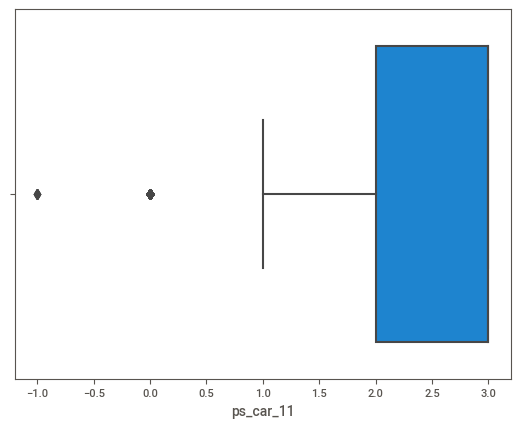

In [269]:
# outlier present as per data visualization using boxplot

sns.boxplot(x='ps_car_11',data=data)
plt.show()

<AxesSubplot:xlabel='ps_car_11', ylabel='Count'>

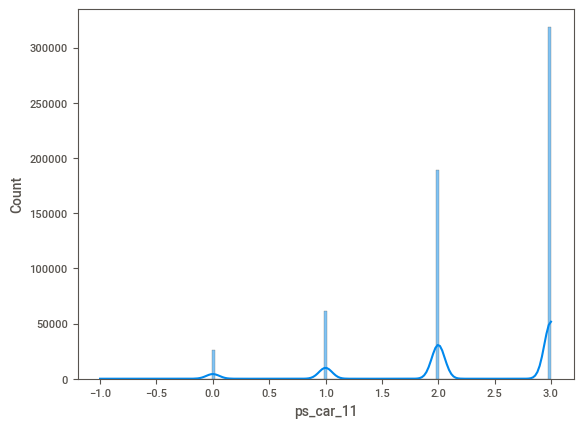

In [270]:
# checking distribution using histplot & data are not normally distributed

sns.histplot(x='ps_car_11',data=data,kde=True)

In [271]:
# finding lower & upper limit using IQR since data are not normally distributed

IQR=stats.iqr(data.ps_car_11,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.ps_car_11.quantile(0.25)
print('Q1 : ',Q1)

Q3=data.ps_car_11.quantile(0.75)
print('Q3 : ',Q3)

Lower_limit=Q3-1.5*IQR
print('Lower_limit : ',Lower_limit)

Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  1.0
Q1 :  2.0
Q3 :  3.0
Lower_limit :  1.5
Upper_limit :  4.5


In [272]:
# outlier present in lower limit
data.loc[data['ps_car_11']<Lower_limit]

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
2            13       0          5              1          9              1   
3            16       0          0              1          2              0   
14           46       0          5              1         11              0   
33           95       0          0              1          8              0   
35           98       0          2              1          1              1   
...         ...     ...        ...            ...        ...            ...   
595167  1487899       0          0              2          3              1   
595184  1487952       0          1              1          5              0   
595187  1487958       0          0              1          7              0   
595190  1487964       0          1              2          3              0   
595196  1487983       0          1              1          2              0   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  \
2                   0              0              0              1   
3                   0              1              0              0   
14                  0              0              0              0   
33                  0              1              0              0   
35                  0              1              0              0   
...               ...            ...            ...            ...   
595167              0              0              0              0   
595184              0              1              0              0   
595187              4              0              0              0   
595190              0              1              0              0   
595196              0              1              0              0   

        ps_ind_09_bin  ps_ind_10_bin  ps_ind_11_bin  ps_ind_12_bin  \
2                   0              0              0              0   
3                   0              0              0              0   
14                  1              0              0              0   
33                  0              0              0              0   
35                  0              0              0              0   
...               ...            ...            ...            ...   
595167              1              0              0              0   
595184              0              0              0              0   
595187              1              0              0              0   
595190              0              0              0              0   
595196              0              0              0              0   

        ps_ind_13_bin  ps_ind_14  ps_ind_15  ps_ind_16_bin  ps_ind_17_bin  \
2                   0          0         12              1              0   
3                   0          0          8              1              0   
14                  0          0         10              0              0   
33                  0          0          2              0              1   
35                  0          0          9              1              0   
...               ...        ...        ...            ...            ...   
595167              0          0          5              0              0   
595184              0          0          2              0              0   
595187              0          0          6              1              0   
595190              0          0          9              1              0   
595196              0          0          0              0              0   

        ps_ind_18_bin  ps_reg_01  ps_reg_02  ps_reg_03  ps_car_01_cat  \
2                   0        0.0        0.0  -1.000000              7   
3                   0        0.9        0.2   0.580948              7   
14                  1        0.8        0.6   1.052972             11   
33                  0        0.5        0.3   0.653357              6   
35                  0        0.9        0.5   1.247497              8   
...               .

In [273]:
#no outlier in upper limit
data.loc[data['ps_car_11']>Upper_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

In [274]:
len(data.loc[data['ps_car_11']<Lower_limit])/len(data)

0.14618320867186818

- 14.6 % OUTLIERS IN "ps_car_11"

## ps_car_12

In [275]:
data.ps_car_12.unique()

array([ 0.4       ,  0.31622777,  0.37416574,  0.31606961,  0.44598206,
        0.44698993,  0.4472136 ,  0.54772256,  0.31527766,  0.42426407,
        0.52915026,  0.39987498,  0.40841156,  0.38729833,  0.42355637,
        0.4237924 ,  0.36055513,  0.39749214,  0.51961524,  0.41797129,
        0.48989795,  0.42201896,  0.31559468,  0.44586994,  0.39862263,
        0.56568542,  0.64807407,  0.39974992,  0.59160798,  0.47958315,
        0.5       ,  0.36878178,  0.43588989,  0.57445626,  0.6164414 ,
        0.44710178,  0.31575307,  0.44542115,  0.6       ,  0.39949969,
        0.54516053,  0.39724048,  1.26491106,  0.39937451,  0.47539457,
        0.49769469,  0.46882833,  0.        ,  0.4240283 ,  0.66332496,
        0.33166248,  0.51536395,  0.69282032,  0.44654227,  0.37255872,
        0.81853528,  0.52896125,  0.39899875,  0.64791975,  0.41231056,
        0.44687806,  0.39471509,  0.43566042,  0.46904158,  0.49457052,
        0.66317419,  0.38691084,  0.54607692,  0.14142136,  0.39

In [276]:
data.ps_car_12.value_counts()

0.316228    170572
0.400000    111858
0.374166     98582
0.447214     49310
0.424264     49284
             ...  
0.496387         1
0.647765         1
0.446766         1
0.547449         1
0.705195         1
Name: ps_car_12, Length: 185, dtype: int64

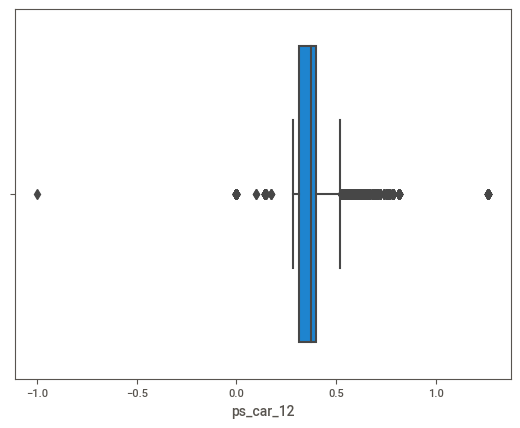

In [277]:
# checking distribution using histplot & data are not normally distributed
sns.boxplot(x='ps_car_12',data=data)
plt.show()

<AxesSubplot:xlabel='ps_car_12', ylabel='Count'>

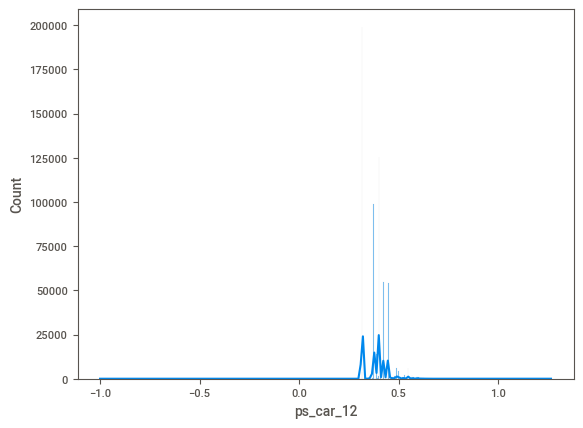

In [278]:
# checking distribution using histplot & data are not normally distributed

sns.histplot(x='ps_car_12',data=data,kde=True)

In [279]:
# finding lower & upper limit using IQR since data are not normally distributed

IQR=stats.iqr(data.ps_car_12,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.ps_car_12.quantile(0.25)
print('Q1 : ',Q1)

Q3=data.ps_car_12.quantile(0.75)
print('Q3 : ',Q3)

Lower_limit=Q3-1.5*IQR
print('Lower_limit : ',Lower_limit)

Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  0.083772234
Q1 :  0.316227766
Q3 :  0.4
Lower_limit :  0.274341649
Upper_limit :  0.525658351


In [280]:
# outlier present in lower limit
data.loc[data['ps_car_12']<Lower_limit]

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
847           0       0          0              0          0              0   
3185       8146       0          2              1          6              1   
3621       9317       0          0              1          2              0   
9515      24064       0          0              2          1              1   
12329         0       0          0              0          0              0   
...         ...     ...        ...            ...        ...            ...   
579049        0       0          0              0          0              0   
587628        0       0          0              0          0              0   
591450  1478370       0          5              1          4              0   
592046  1479889       0          0              1         10              1   
594806  1486994       0          5              1          5              1   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  \
847                 0              0              0              0   
3185                0              0              0              0   
3621                0              1              0              0   
9515                0              0              1              0   
12329               0              0              0              0   
...               ...            ...            ...            ...   
579049              0              0              0              0   
587628              0              0              0              0   
591450              0              1              0              0   
592046              0              0              0              0   
594806              0              0              1              0   

        ps_ind_09_bin  ps_ind_10_bin  ps_ind_11_bin  ps_ind_12_bin  \
847                 0              0              0              0   
3185                1              0              0              0   
3621                0              0              0              0   
9515                0              0              0              0   
12329               0              0              0              0   
...               ...            ...            ...            ...   
579049              0              0              0              0   
587628              0              0              0              0   
591450              0              0              0              0   
592046              1              0              0              0   
594806              0              0              0              0   

        ps_ind_13_bin  ps_ind_14  ps_ind_15  ps_ind_16_bin  ps_ind_17_bin  \
847                 0          0          0              0              0   
3185                0          0         12              1              0   
3621                0          0          4              0              0   
9515                0          0          3              0              0   
12329               0          0          0              0              0   
...               ...        ...        ...            ...            ...   
579049              0          0          0              0              0   
587628              0          0          0              0              0   
591450              0          0         13              1              0   
592046              0          0          7              1              0   
594806              0          0          6              1              0   

        ps_ind_18_bin  ps_reg_01  ps_reg_02  ps_reg_03  ps_car_01_cat  \
847                 0        0.0        0.0   0.000000              0   
3185                0        0.2        0.3  -1.000000             11   
3621                1        0.9        0.2   0.512348              7   
9515                0        0.2        0.0  -1.000000              7   
12329               0        0.0        0.0   0.000000              0   
...               .

In [281]:
# imputing outlier with median

data.loc[data['ps_car_12']<Lower_limit,'ps_car_12']=data.ps_car_12.median()

In [282]:
# no outlier in lower limit 
data.loc[data['ps_car_12']<Lower_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

In [283]:
# outlier present in upper limit 
data.loc[data['ps_car_12']>Upper_limit]

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
15           48       0          5              1          3              1   
25           78       0          0              1          7              0   
158         420       0          1              1          7              0   
180         464       0          5              1          8              0   
222         554       0          5              1          5              0   
...         ...     ...        ...            ...        ...            ...   
594995  1487443       0          2              1          2              0   
594997  1487448       0          3              1          8              0   
595084  1487667       0          5              1          9              1   
595137  1487810       0          0              1          4              0   
595166  1487897       0          5              1          6              1   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  \
15                  0              0              1              0   
25                  0              1              0              0   
158                 0              0              0              1   
180                 0              0              0              0   
222                 0              0              1              0   
...               ...            ...            ...            ...   
594995              0              0              1              0   
594997              0              0              1              0   
595084              0              0              1              0   
595137              0              0              0              0   
595166              0              0              1              0   

        ps_ind_09_bin  ps_ind_10_bin  ps_ind_11_bin  ps_ind_12_bin  \
15                  0              0              0              0   
25                  0              0              0              0   
158                 0              0              0              0   
180                 1              0              0              0   
222                 0              0              0              0   
...               ...            ...            ...            ...   
594995              0              0              0              0   
594997              0              0              0              0   
595084              0              0              0              0   
595137              1              0              0              0   
595166              0              0              0              0   

        ps_ind_13_bin  ps_ind_14  ps_ind_15  ps_ind_16_bin  ps_ind_17_bin  \
15                  0          0          5              0              0   
25                  0          0         13              1              0   
158                 0          0          3              0              1   
180                 0          0          6              1              0   
222                 0          0          6              1              0   
...               ...        ...        ...            ...            ...   
594995              0          0         12              1              0   
594997              0          0          2              0              0   
595084              0          0          0              1              0   
595137              0          0          5              1              0   
595166              0          0          6              1              0   

        ps_ind_18_bin  ps_reg_01  ps_reg_02  ps_reg_03  ps_car_01_cat  \
15                  1        0.4        0.3  -1.000000              6   
25                  0        0.1        0.2  -1.000000              4   
158                 0        0.5        0.0  -1.000000             10   
180                 0        0.1        0.3  -1.000000             11   
222                 0        0.2        0.3  -1.000000              8   
...               .

In [284]:
# imputing outlier with median
data.loc[data['ps_car_12']>Upper_limit,'ps_car_12']=data.ps_car_12.median()

In [285]:
data.loc[data['ps_car_12']>Upper_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

## ps_car_13

In [286]:
data.ps_car_13.unique()

array([0.88367892, 0.61881652, 0.64158572, ..., 1.58527574, 0.96169455,
       1.56191797])

In [287]:
data.ps_car_13.value_counts()

0.674583    386
0.741689    377
0.692776    363
0.841781    361
0.749228    353
           ... 
1.666391      1
1.190640      1
0.668268      1
0.731630      1
1.561918      1
Name: ps_car_13, Length: 70474, dtype: int64

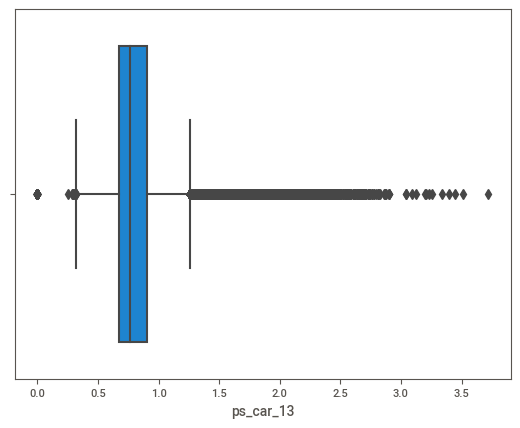

In [288]:
# checking distribution using boxplot & data are not normally distributed

sns.boxplot(x='ps_car_13',data=data)
plt.show()

<AxesSubplot:xlabel='ps_car_13', ylabel='Count'>

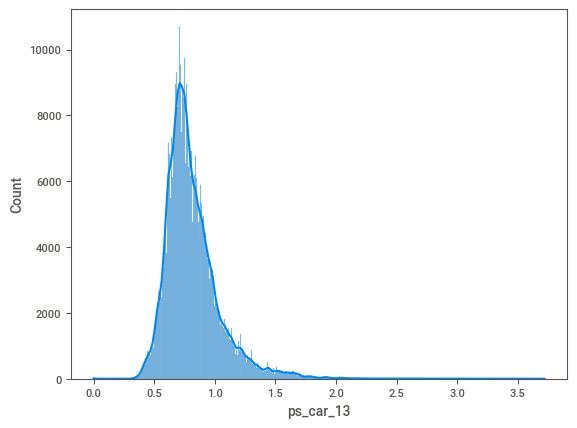

In [289]:
# checking distribution using histplot & data are not normally distributed

sns.histplot(x='ps_car_13',data=data,kde=True)

In [290]:
# finding lower & upper limit using IQR since data are not normally distributed

IQR=stats.iqr(data.ps_car_13,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.ps_car_13.quantile(0.25)
print('Q1 : ',Q1)

Q3=data.ps_car_13.quantile(0.75)
print('Q3 : ',Q3)

Lower_limit=Q3-1.5*IQR
print('Lower_limit : ',Lower_limit)

Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  0.2353647553
Q1 :  0.6707895927
Q3 :  0.906154348
Lower_limit :  0.55310721505
Upper_limit :  1.25920148095


In [291]:
# outlier present in lower limit
data.loc[data['ps_car_13']<Lower_limit]

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
3            16       0          0              1          2              0   
19           64       1          0              1          2              1   
73          194       0          5              1          9              0   
85          215       0          5              3          5              1   
87          217       1          1              1          5              1   
...         ...     ...        ...            ...        ...            ...   
595097  1487705       0          1              2          7              1   
595111  1487745       0          3              1          6              0   
595134  1487803       0          4              2          8              1   
595153  1487846       0          0              1          3              1   
595190  1487964       0          1              2          3              0   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  \
3                   0              1              0              0   
19                  0              1              0              0   
73                  0              1              0              0   
85                  3              0              1              0   
87                  0              0              1              0   
...               ...            ...            ...            ...   
595097              0              1              0              0   
595111              6              1              0              0   
595134              0              0              0              0   
595153              0              1              0              0   
595190              0              1              0              0   

        ps_ind_09_bin  ps_ind_10_bin  ps_ind_11_bin  ps_ind_12_bin  \
3                   0              0              0              0   
19                  0              0              0              0   
73                  0              0              0              0   
85                  0              0              0              0   
87                  0              0              0              0   
...               ...            ...            ...            ...   
595097              0              0              0              0   
595111              0              0              0              0   
595134              1              0              0              0   
595153              0              0              0              0   
595190              0              0              0              0   

        ps_ind_13_bin  ps_ind_14  ps_ind_15  ps_ind_16_bin  ps_ind_17_bin  \
3                   0          0          8              1              0   
19                  0          0          8              1              0   
73                  0          0         11              1              0   
85                  0          0          1              0              0   
87                  0          0          5              1              0   
...               ...        ...        ...            ...            ...   
595097              0          0         13              1              0   
595111              0          0          3              0              1   
595134              0          0         12              1              0   
595153              0          0          6              1              0   
595190              0          0          9              1              0   

        ps_ind_18_bin  ps_reg_01  ps_reg_02  ps_reg_03  ps_car_01_cat  \
3                   0        0.9        0.2   0.580948              7   
19                  0        0.9        0.3   0.402337              7   
73                  0        0.1        0.3  -1.000000              7   
85                  1        0.9        0.8   0.935414              7   
87                  0        0.4        0.0   0.751665             10   
...               .

In [292]:
# outlier present in upper limit
data.loc[data['ps_car_13']>Upper_limit]

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
9            28       1          1              1          2              0   
15           48       0          5              1          3              1   
26           79       0          0              1          4              1   
50          125       0          3              1          2              1   
80          209       0          0              2          2              0   
...         ...     ...        ...            ...        ...            ...   
595137  1487810       0          0              1          4              0   
595154  1487851       0          0              1          3              1   
595164  1487890       0          3              2          5              0   
595166  1487897       0          5              1          6              1   
595176  1487931       0          2              1          4              0   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  \
9                   0              0              1              0   
15                  0              0              1              0   
26                  0              0              0              1   
50                  0              0              1              0   
80                  0              0              1              0   
...               ...            ...            ...            ...   
595137              0              0              0              0   
595154              0              0              0              1   
595164              0              0              1              0   
595166              0              0              1              0   
595176              0              0              0              1   

        ps_ind_09_bin  ps_ind_10_bin  ps_ind_11_bin  ps_ind_12_bin  \
9                   0              0              0              0   
15                  0              0              0              0   
26                  0              0              0              0   
50                  0              0              0              0   
80                  0              0              0              0   
...               ...            ...            ...            ...   
595137              1              0              0              0   
595154              0              0              0              0   
595164              0              0              0              0   
595166              0              0              0              0   
595176              0              0              0              0   

        ps_ind_13_bin  ps_ind_14  ps_ind_15  ps_ind_16_bin  ps_ind_17_bin  \
9                   0          0          4              0              0   
15                  0          0          5              0              0   
26                  0          0          8              1              0   
50                  0          0          6              0              1   
80                  0          0          7              1              0   
...               ...        ...        ...            ...            ...   
595137              0          0          5              1              0   
595154              0          0          6              1              0   
595164              0          0         10              0              0   
595166              0          0          6              1              0   
595176              0          0         12              1              0   

        ps_ind_18_bin  ps_reg_01  ps_reg_02  ps_reg_03  ps_car_01_cat  \
9                   1        0.9        1.4   2.316652             11   
15                  1        0.4        0.3  -1.000000              6   
26                  0        0.6        0.2   0.666146             10   
50                  0        0.9        0.8   1.116636             11   
80                  0        0.1        0.2  -1.000000             11   
...               .

In [293]:
a=len(data.loc[data['ps_car_13']<Lower_limit])
b=len(data.loc[data['ps_car_13']>Upper_limit])
c=(a+b)/len(data)
c

0.10279530654623899

- 10.3 % OUTLIERS IN "ps_car_13"

## ps_car_14

In [294]:
data.ps_car_14.unique()

array([ 0.37080992,  0.38871583,  0.34727511,  0.29495762,  0.36510273,
        0.40620192,  0.36878178,  0.3748333 ,  0.40743098,  0.39025633,
        0.42953463,  0.37934153,  0.38509739,  0.35608988,  0.35832946,
        0.5329165 ,  0.34985711,  0.3207803 ,  0.36633318,  0.36124784,
        0.37027017,  0.36837481,  0.40137264,  0.41291646,  0.52773099,
        0.4       ,  0.44158804,  0.38209946,  0.36152455,  0.38170669,
        0.37682887,  0.39076847,  0.30740852,  0.36193922,  0.38262253,
        0.35986108,  0.39749214,  0.40865633,  0.36851052,  0.38729833,
        0.28879058, -1.        ,  0.3468429 ,  0.31032241,  0.37549967,
        0.32878564,  0.32924155,  0.38548671,  0.33867388,  0.37802116,
        0.37456642,  0.41545156,  0.43497126,  0.41593269,  0.52048055,
        0.35      ,  0.31937439,  0.33763886,  0.39370039,  0.33166248,
        0.34568772,  0.39874804,  0.38144462,  0.37947332,  0.35566838,
        0.30033315,  0.29916551,  0.50576674,  0.3744329 ,  0.38

In [295]:
data.ps_car_14.value_counts()

-1.000000    42611
 0.361525    17696
 0.358329    15523
 0.361939    11885
 0.368782    11626
             ...  
 0.441248        1
 0.406325        1
 0.554346        1
 0.213073        1
 0.511371        1
Name: ps_car_14, Length: 851, dtype: int64

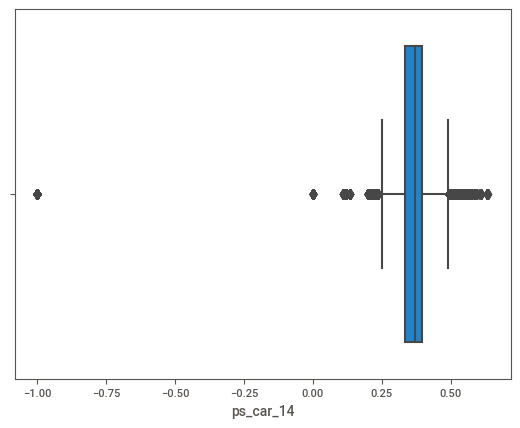

In [296]:
 # outlier present as per data visualization using boxplot

sns.boxplot(x='ps_car_14',data=data)
plt.show()

<AxesSubplot:xlabel='ps_car_14', ylabel='Count'>

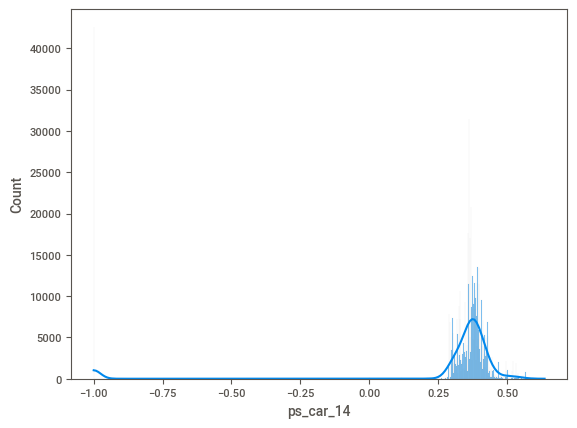

In [297]:
# checking distribution using histplot & data are not normally distributed

sns.histplot(x='ps_car_14',data=data,kde=True)

In [298]:
# finding lower & upper limit using IQR since data are not normally distributed

IQR=stats.iqr(data.ps_car_14,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.ps_car_14.quantile(0.25)
print('Q1 : ',Q1)

Q3=data.ps_car_14.quantile(0.75)
print('Q3 : ',Q3)

Lower_limit=Q3-1.5*IQR
print('Lower_limit : ',Lower_limit)

Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  0.063317927
Q1 :  0.333166625
Q3 :  0.396484552
Lower_limit :  0.30150766149999997
Upper_limit :  0.4914614425


In [299]:
#outlier present in lower limit

data.loc[data['ps_car_14']<Lower_limit]

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
3            16       0          0              1          2              0   
45          117       0          1              1          6              1   
46          119       0          5              1          9              0   
64          160       0          0              1          7              0   
73          194       0          5              1          9              0   
...         ...     ...        ...            ...        ...            ...   
595186  1487957       0          0              1          3              1   
595192  1487973       0          0              1          1              0   
595197  1487988       0          1              1          7              1   
595199  1487992       0          3              1          3              1   
595208  1488016       0          5              1          3              0   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  \
3                   0              1              0              0   
45                  3              0              0              1   
46                  0              0              0              1   
64                  0              1              0              0   
73                  0              1              0              0   
...               ...            ...            ...            ...   
595186              0              0              1              0   
595192              0              0              1              0   
595197              0              0              1              0   
595199              0              0              0              1   
595208              0              0              0              0   

        ps_ind_09_bin  ps_ind_10_bin  ps_ind_11_bin  ps_ind_12_bin  \
3                   0              0              0              0   
45                  0              0              0              0   
46                  0              0              0              0   
64                  0              0              0              0   
73                  0              0              0              0   
...               ...            ...            ...            ...   
595186              0              0              0              0   
595192              0              0              0              0   
595197              0              0              0              0   
595199              0              0              0              0   
595208              1              0              0              0   

        ps_ind_13_bin  ps_ind_14  ps_ind_15  ps_ind_16_bin  ps_ind_17_bin  \
3                   0          0          8              1              0   
45                  0          0          8              0              1   
46                  0          0          9              1              0   
64                  0          0          6              1              0   
73                  0          0         11              1              0   
...               ...        ...        ...            ...            ...   
595186              0          0          7              1              0   
595192              0          0          7              1              0   
595197              0          0         10              0              0   
595199              0          0         13              1              0   
595208              0          0          6              1              0   

        ps_ind_18_bin  ps_reg_01  ps_reg_02  ps_reg_03  ps_car_01_cat  \
3                   0        0.9        0.2   0.580948              7   
45                  0        0.3        0.0   1.176860             11   
46                  0        0.4        0.3   0.722409             11   
64                  0        0.7        0.4   0.731437             11   
73                  0        0.1        0.3  -1.000000              7   
...               .

In [300]:
a=len(data.loc[data['ps_car_14']<Lower_limit])
b=len(data.loc[data['ps_car_14']>Upper_limit])
c=(a+b)/len(data)
c

0.14244000456980033

- 14.2 % OUTLIERS IN "ps_car_14"

## ps_car_15

In [301]:
data.ps_car_15.unique()

array([3.60555128, 2.44948974, 3.31662479, 2.        , 3.        ,
       3.16227766, 2.82842712, 3.74165739, 2.64575131, 0.        ,
       1.41421356, 3.46410162, 1.73205081, 2.23606798, 1.        ])

In [302]:
data.ps_car_15.value_counts()

3.605551    109743
3.464102     77185
3.316625     68729
3.162278     63315
3.741657     57749
2.828427     48674
3.000000     48528
2.645751     30386
2.449490     20443
2.236068     19394
0.000000     14269
2.000000     12830
1.732051     10744
1.000000      6708
1.414214      6515
Name: ps_car_15, dtype: int64

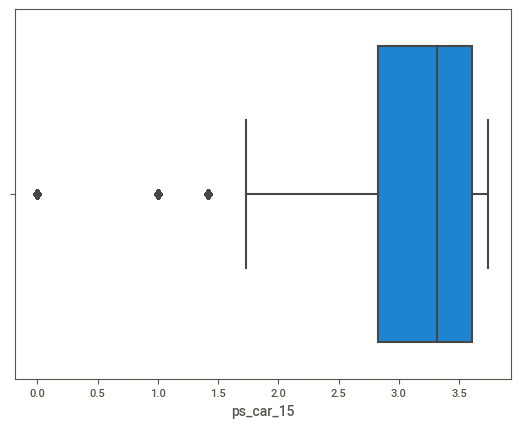

In [303]:
 # outlier present as per data visualization using boxplot

sns.boxplot(x='ps_car_15',data=data)
plt.show()

<AxesSubplot:xlabel='ps_car_15', ylabel='Count'>

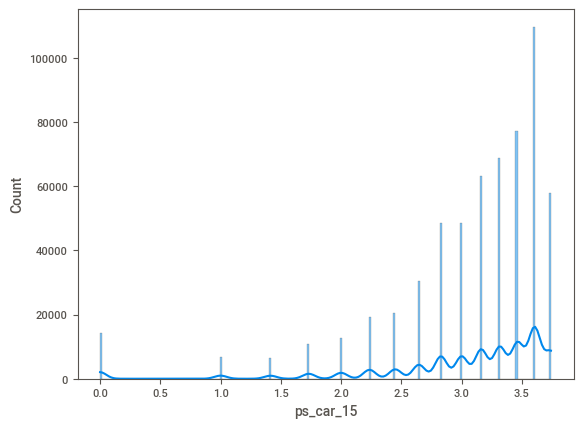

In [304]:
# checking distribution using histplot & data are not normally distributed

sns.histplot(x='ps_car_15',data=data,kde=True)

In [305]:
# finding lower & upper limit using IQR since data are not normally distributed

IQR=stats.iqr(data.ps_car_15,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.ps_car_15.quantile(0.25)
print('Q1 : ',Q1)

Q3=data.ps_car_15.quantile(0.75)
print('Q3 : ',Q3)

Lower_limit=Q3-1.5*IQR
print('Lower_limit : ',Lower_limit)

Upper_limit=Q3+1.5*IQR

print('Upper_limit : ',Upper_limit)

IQR :  0.7771241507999997
Q1 :  2.8284271247
Q3 :  3.6055512755
Lower_limit :  2.4398650493000003
Upper_limit :  4.7712375017


In [306]:
# outlier present in lower limit
data.loc[data['ps_car_15']<Lower_limit]

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
3            16       0          0              1          2              0   
4            17       0          0              2          0              1   
19           64       1          0              1          2              1   
20           65       0          0              1          2              0   
25           78       0          0              1          7              0   
...         ...     ...        ...            ...        ...            ...   
595156  1487863       0          1              1          7              1   
595159  1487868       0          0              1          3              0   
595165  1487892       0          2              1          1              0   
595190  1487964       0          1              2          3              0   
595209  1488017       0          1              1         10              0   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  \
3                   0              1              0              0   
4                   0              1              0              0   
19                  0              1              0              0   
20                  0              1              0              0   
25                  0              1              0              0   
...               ...            ...            ...            ...   
595156              0              1              0              0   
595159              0              1              0              0   
595165              0              1              0              0   
595190              0              1              0              0   
595209              0              1              0              0   

        ps_ind_09_bin  ps_ind_10_bin  ps_ind_11_bin  ps_ind_12_bin  \
3                   0              0              0              0   
4                   0              0              0              0   
19                  0              0              0              0   
20                  0              0              0              0   
25                  0              0              0              0   
...               ...            ...            ...            ...   
595156              0              0              0              0   
595159              0              0              0              0   
595165              0              0              0              0   
595190              0              0              0              0   
595209              0              0              0              0   

        ps_ind_13_bin  ps_ind_14  ps_ind_15  ps_ind_16_bin  ps_ind_17_bin  \
3                   0          0          8              1              0   
4                   0          0          9              1              0   
19                  0          0          8              1              0   
20                  0          0          3              0              0   
25                  0          0         13              1              0   
...               ...        ...        ...            ...            ...   
595156              0          0         12              1              0   
595159              0          0          9              1              0   
595165              0          0          5              0              0   
595190              0          0          9              1              0   
595209              0          0         12              1              0   

        ps_ind_18_bin  ps_reg_01  ps_reg_02  ps_reg_03  ps_car_01_cat  \
3                   0        0.9        0.2   0.580948              7   
4                   0        0.7        0.6   0.840759             11   
19                  0        0.9        0.3   0.402337              7   
20                  1        0.4        0.7   1.372725             11   
25                  0        0.1        0.2  -1.000000              4   
...               .

In [307]:
# no outlier present in upper limit
data.loc[data['ps_car_15']>Upper_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

In [308]:
a=len(data.loc[data['ps_car_15']<Lower_limit])
b=len(data.loc[data['ps_car_15']>Upper_limit])
c=(a+b)/len(data)
c

0.11837798969106805

- 11.8 % OUTLIERS IN "ps_car_15"

## ps_calc_01

In [309]:
data.ps_calc_01.unique()

array([0.6, 0.3, 0.5, 0.4, 0.7, 0.2, 0.1, 0.9, 0.8, 0. ])

In [310]:
data.ps_calc_01.value_counts()

0.0    59853
0.6    59829
0.8    59701
0.5    59606
0.7    59532
0.2    59506
0.1    59496
0.3    59369
0.4    59240
0.9    59080
Name: ps_calc_01, dtype: int64

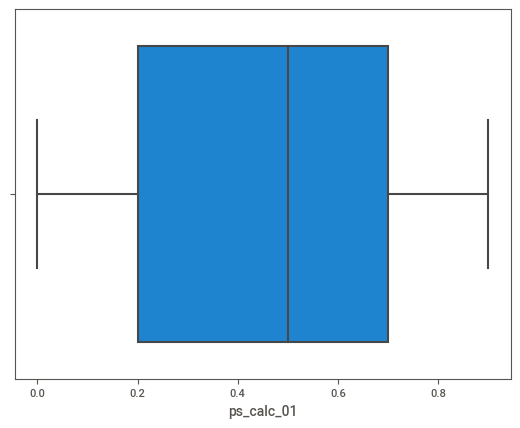

In [311]:
 # no outlier present as per data visualization using boxplot


sns.boxplot(x='ps_calc_01',data=data)
plt.show()

In [312]:

# finding lower & upper limit using IQR since data are not normally distributed

IQR=stats.iqr(data.ps_calc_01,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.ps_calc_01.quantile(0.25)
print('Q1 : ',Q1)

Q3=data.ps_calc_01.quantile(0.75)
print('Q3 : ',Q3)

Lower_limit=Q3-1.5*IQR
print('Lower_limit : ',Lower_limit)

Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  0.49999999999999994
Q1 :  0.2
Q3 :  0.7
Lower_limit :  -0.04999999999999993
Upper_limit :  1.4499999999999997


In [313]:
#no outlier in lower limit

data.loc[data['ps_calc_01']<Lower_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

In [314]:
#no outlier in upper limit

data.loc[data['ps_calc_01']>Upper_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

- THEY HAVE NO OUTLIERS IN "ps_calc_01"

## ps_calc_02

In [315]:
data.ps_calc_02.unique()

array([0.5, 0.1, 0.7, 0.9, 0.6, 0.8, 0.4, 0. , 0.3, 0.2])

In [316]:
data.ps_calc_02.value_counts()

0.5    60062
0.4    59813
0.0    59691
0.3    59586
0.7    59494
0.6    59493
0.2    59379
0.1    59377
0.9    59209
0.8    59108
Name: ps_calc_02, dtype: int64

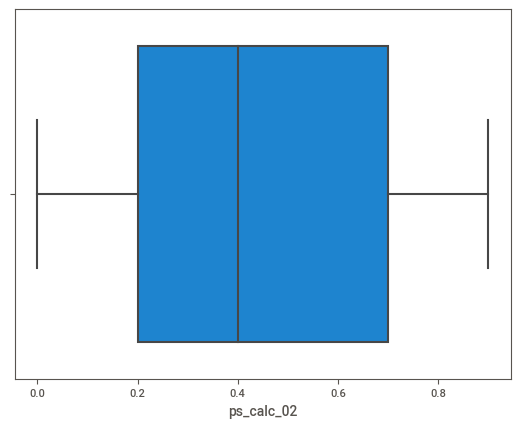

In [317]:
 # no outlier present as per data visualization using boxplot


sns.boxplot(x='ps_calc_02',data=data)
plt.show()

In [318]:
# finding lower & upper limit using IQR since data are not normally distributed

IQR=stats.iqr(data.ps_calc_02,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.ps_calc_02.quantile(0.25)
print('Q1 : ',Q1)

Q3=data.ps_calc_02.quantile(0.75)
print('Q3 : ',Q3)

Lower_limit=Q3-1.5*IQR
print('Lower_limit : ',Lower_limit)

Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  0.49999999999999994
Q1 :  0.2
Q3 :  0.7
Lower_limit :  -0.04999999999999993
Upper_limit :  1.4499999999999997


- NO OUTLIERS IN "ps_calc_02"

## ps_calc_03

In [320]:
data.ps_calc_03.unique()

array([0.2, 0.3, 0.1, 0. , 0.4, 0.5, 0.6, 0.8, 0.9, 0.7])

In [321]:
data.ps_calc_03.value_counts()

0.1    60026
0.5    59822
0.3    59815
0.6    59512
0.8    59501
0.9    59409
0.0    59391
0.7    59383
0.4    59225
0.2    59128
Name: ps_calc_03, dtype: int64

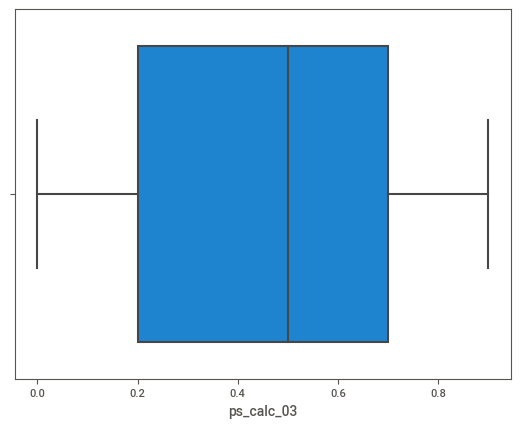

In [322]:
# No outlier present as per data visualization using boxplot

sns.boxplot(x='ps_calc_03',data=data)
plt.show()

In [323]:
# finding lower & upper limit using IQR since data are not normally distributed

IQR=stats.iqr(data.ps_calc_03,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.ps_calc_03.quantile(0.25)
print('Q1 : ',Q1)

Q3=data.ps_calc_03.quantile(0.75)
print('Q3 : ',Q3)

Lower_limit=Q3-1.5*IQR
print('Lower_limit : ',Lower_limit)

Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  0.49999999999999994
Q1 :  0.2
Q3 :  0.7
Lower_limit :  -0.04999999999999993
Upper_limit :  1.4499999999999997


- NO OUTLIERS IN "ps_calc_03"

## ps_calc_04

In [325]:
data.ps_calc_04.unique()

array([3, 2, 1, 4, 0, 5], dtype=int64)

In [326]:
data.ps_calc_04.value_counts()

2    193949
3    175494
1    107996
4     79594
0     23988
5     14191
Name: ps_calc_04, dtype: int64

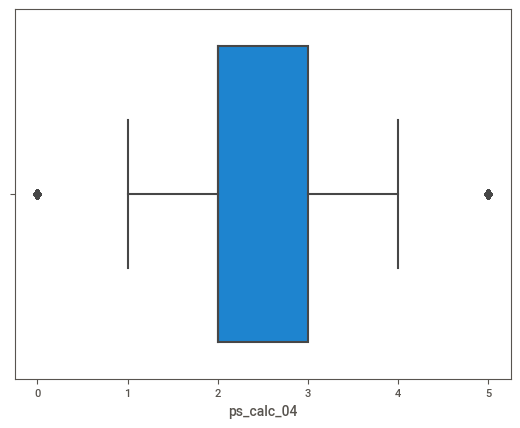

In [327]:
 # outlier present as per data visualization using boxplot

sns.boxplot(x='ps_calc_04',data=data)
plt.show()

<AxesSubplot:xlabel='ps_calc_04', ylabel='Count'>

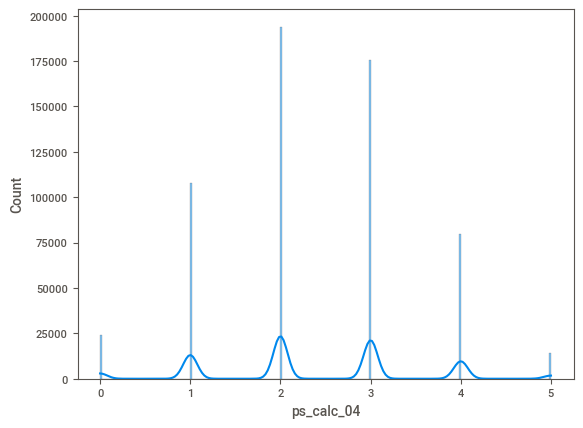

In [328]:
# checking distribution using histplot & data are not normally distributed

sns.histplot(x='ps_calc_04',data=data,kde=True)

In [329]:
# finding lower & upper limit using IQR since data are not normally distributed

IQR=stats.iqr(data.ps_calc_04,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.ps_calc_04.quantile(0.25)
print('Q1 : ',Q1)

Q3=data.ps_calc_04.quantile(0.75)
print('Q3 : ',Q3)

Lower_limit=Q3-1.5*IQR
print('Lower_limit : ',Lower_limit)

Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  1.0
Q1 :  2.0
Q3 :  3.0
Lower_limit :  1.5
Upper_limit :  4.5


In [330]:
#outlier present in lower limit

data.loc[data['ps_calc_04']<Lower_limit]

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
7            22       0          5              1          4              0   
17           58       0          5              1          6              0   
20           65       0          0              1          2              0   
34           96       0          0              1          1              1   
38          104       0          4              1          9              0   
...         ...     ...        ...            ...        ...            ...   
595194  1487976       0          0              1          7              1   
595195  1487980       0          0              3          3              1   
595197  1487988       0          1              1          7              1   
595199  1487992       0          3              1          3              1   
595200  1487994       0          1              1          1              0   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  \
7                   0              1              0              0   
17                  1              1              0              0   
20                  0              1              0              0   
34                  0              0              1              0   
38                  0              0              0              0   
...               ...            ...            ...            ...   
595194              0              0              1              0   
595195              0              0              1              0   
595197              0              0              1              0   
595199              0              0              0              1   
595200              3              1              0              0   

        ps_ind_09_bin  ps_ind_10_bin  ps_ind_11_bin  ps_ind_12_bin  \
7                   0              0              0              0   
17                  0              0              0              0   
20                  0              0              0              0   
34                  0              0              0              0   
38                  1              0              0              0   
...               ...            ...            ...            ...   
595194              0              0              0              0   
595195              0              0              0              0   
595197              0              0              0              0   
595199              0              0              0              0   
595200              0              0              0              0   

        ps_ind_13_bin  ps_ind_14  ps_ind_15  ps_ind_16_bin  ps_ind_17_bin  \
7                   0          0         13              1              0   
17                  0          0          4              1              0   
20                  0          0          3              0              0   
34                  0          0          9              0              0   
38                  0          0          2              0              0   
...               ...        ...        ...            ...            ...   
595194              0          0         12              0              0   
595195              0          0          1              0              0   
595197              0          0         10              0              0   
595199              0          0         13              1              0   
595200              0          0          5              1              0   

        ps_ind_18_bin  ps_reg_01  ps_reg_02  ps_reg_03  ps_car_01_cat  \
7                   0        0.7        0.4   0.607248             11   
17                  0        0.9        0.5   0.810864             11   
20                  1        0.4        0.7   1.372725             11   
34                  0        0.9        0.4   0.922293             11   
38                  1        0.9        1.3   0.938416              6   
...               .

In [331]:
a=len(data.loc[data['ps_calc_04']<Lower_limit])
b=len(data.loc[data['ps_calc_04']>Upper_limit])
c=(a+b)/len(data)
c

0.24558476643616056

- 24.5 % OUTLIERS IN "ps_calc_04"

## ps_calc_05

In [332]:
data.ps_calc_05.unique()

array([1, 2, 4, 3, 0, 5, 6], dtype=int64)

In [333]:
data.ps_calc_05.value_counts()

2    195141
1    170831
3    119171
0     61300
4     40678
5      7534
6       557
Name: ps_calc_05, dtype: int64

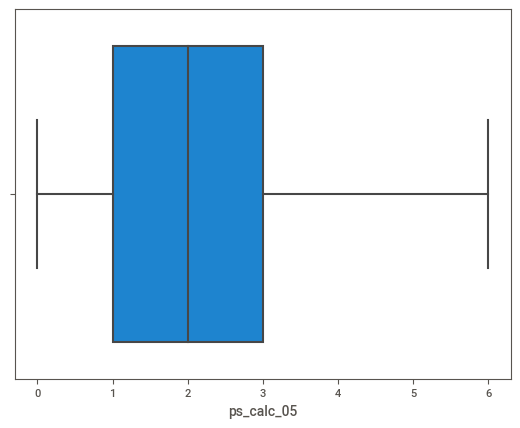

In [334]:
# no outlier present as per data visualization using boxplot
sns.boxplot(x='ps_calc_05',data=data)
plt.show()

In [335]:
# finding lower & upper limit using IQR since data are not normally distributed

IQR=stats.iqr(data.ps_calc_05,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.ps_calc_05.quantile(0.25)
print('Q1 : ',Q1)

Q3=data.ps_calc_05.quantile(0.75)
print('Q3 : ',Q3)

Lower_limit=Q3-1.5*IQR
print('Lower_limit : ',Lower_limit)

Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  2.0
Q1 :  1.0
Q3 :  3.0
Lower_limit :  0.0
Upper_limit :  6.0


- NO OUTLIERS IN "ps_calc_05"

## ps_calc_06`

In [336]:
data.ps_calc_06.value_counts()

8     174990
7     139754
9     129190
6      73465
10     43080
5      26608
4       6704
3       1199
2        132
0         84
1          6
Name: ps_calc_06, dtype: int64

<AxesSubplot:xlabel='ps_calc_06'>

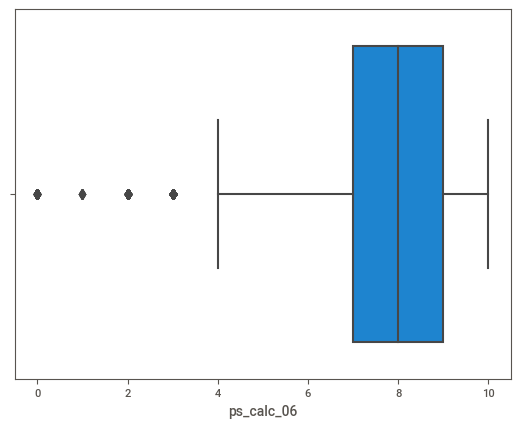

In [337]:
 # outlier present as per data visualization using boxplot

sns.boxplot(x='ps_calc_06',data=data)

<AxesSubplot:xlabel='ps_calc_06', ylabel='Count'>

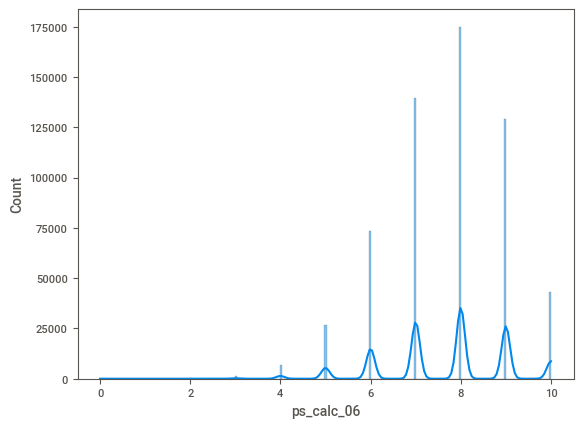

In [338]:
# checking distribution using histplot & data are not normally distributed

sns.histplot(x='ps_calc_06',data=data,kde=True)

In [339]:
# finding lower & upper limit using IQR since data are not normally distributed

IQR=stats.iqr(data.ps_calc_06,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.ps_calc_06.quantile(0.25)
print('Q1 : ',Q1)

Q3=data.ps_calc_06.quantile(0.75)
print('Q3 : ',Q3)

Lower_limit=Q3-1.5*IQR
print('Lower_limit : ',Lower_limit)

Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  2.0
Q1 :  7.0
Q3 :  9.0
Lower_limit :  6.0
Upper_limit :  12.0


In [340]:
# outlier present in lower limit

data.loc[data['ps_calc_06']<Lower_limit]

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
54          142       0          0              1          5              1   
63          156       0          0              1          5              0   
173         449       0          2              1          6              0   
198         498       0          3              1          3              1   
231         582       0          3              3          7              1   
...         ...     ...        ...            ...        ...            ...   
595093  1487694       0          1              1          9              0   
595096  1487702       0          1              2          2              1   
595126  1487780       0          2              1          8              1   
595155  1487859       0          4              1          3              0   
595194  1487976       0          0              1          7              1   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  \
54                  0              1              0              0   
63                  0              1              0              0   
173                 0              0              1              0   
198                 0              0              1              0   
231                 0              0              1              0   
...               ...            ...            ...            ...   
595093              0              1              0              0   
595096              0              0              0              0   
595126              0              0              1              0   
595155              0              1              0              0   
595194              0              0              1              0   

        ps_ind_09_bin  ps_ind_10_bin  ps_ind_11_bin  ps_ind_12_bin  \
54                  0              0              0              0   
63                  0              0              0              0   
173                 0              0              0              0   
198                 0              0              0              0   
231                 0              0              0              0   
...               ...            ...            ...            ...   
595093              0              0              0              0   
595096              1              0              0              0   
595126              0              0              0              0   
595155              0              0              0              0   
595194              0              0              0              0   

        ps_ind_13_bin  ps_ind_14  ps_ind_15  ps_ind_16_bin  ps_ind_17_bin  \
54                  0          0         11              1              0   
63                  0          0          0              0              0   
173                 0          0          4              0              1   
198                 0          0          2              1              0   
231                 0          0          5              1              0   
...               ...        ...        ...            ...            ...   
595093              0          0         13              1              0   
595096              0          0          5              1              0   
595126              0          0         10              1              0   
595155              0          0         12              1              0   
595194              0          0         12              0              0   

        ps_ind_18_bin  ps_reg_01  ps_reg_02  ps_reg_03  ps_car_01_cat  \
54                  0        0.6        0.2   0.608790             11   
63                  1        0.6        0.6   0.690109              0   
173                 0        0.9        0.9   0.877496              7   
198                 0        0.9        0.9   1.101136              7   
231                 0        0.9        0.4   0.619476             11   
...               .

In [341]:
a=len(data.loc[data['ps_calc_06']<Lower_limit])
b=len(data.loc[data['ps_calc_06']>Upper_limit])
c=(a+b)/len(data)
c

0.05835399823928281

- 5.8 % OUTLIERS IN "ps_calc_06"

## ps_calc_07

In [342]:
data.ps_calc_07.unique()

array([1, 5, 3, 2, 4, 6, 0, 7, 8, 9], dtype=int64)

In [343]:
data.ps_calc_07.value_counts()

3    162399
2    139081
4    122017
1     69299
5     61696
6     20400
0     15369
7      4381
8       547
9        23
Name: ps_calc_07, dtype: int64

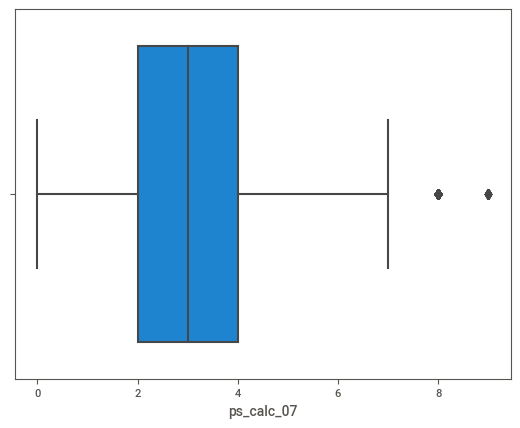

In [344]:
# outlier present as per data visualization using boxplot

sns.boxplot(x='ps_calc_07',data=data)
plt.show()

<AxesSubplot:xlabel='ps_calc_07', ylabel='Count'>

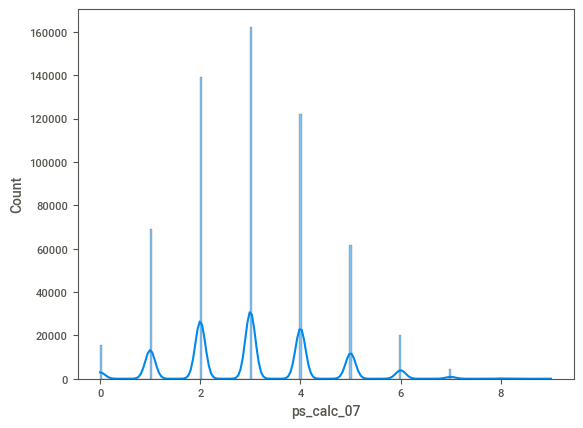

In [345]:
# checking distribution using histplot & data are not normally distributed

sns.histplot(x='ps_calc_07',data=data,kde=True)

In [346]:
# finding lower & upper limit using IQR since data are not normally distributed

IQR=stats.iqr(data.ps_calc_07,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.ps_calc_07.quantile(0.25)
print('Q1 : ',Q1)

Q3=data.ps_calc_07.quantile(0.75)
print('Q3 : ',Q3)

Lower_limit=Q3-1.5*IQR
print('Lower_limit : ',Lower_limit)

Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  2.0
Q1 :  2.0
Q3 :  4.0
Lower_limit :  1.0
Upper_limit :  7.0


In [347]:
# outlier present in lower limit
data.loc[data['ps_calc_07']<Lower_limit]

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
22           72       0          5              3          6              1   
30           89       0          0              1          6              0   
36           99       0          1              1          6              1   
86          216       0          0              1         11              0   
95          235       0          3              1          6              0   
...         ...     ...        ...            ...        ...            ...   
595055  1487584       0          1              2          0              0   
595059  1487594       0          2              1          7              1   
595085  1487673       0          0              1          5              0   
595147  1487828       0          1              2          7              1   
595207  1488013       0          3              1         10              0   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  \
22                  3              0              1              0   
30                  0              1              0              0   
36                  4              0              1              0   
86                  0              0              0              0   
95                  0              0              1              0   
...               ...            ...            ...            ...   
595055              6              0              0              0   
595059              4              0              1              0   
595085              0              0              1              0   
595147              0              0              1              0   
595207              0              0              0              0   

        ps_ind_09_bin  ps_ind_10_bin  ps_ind_11_bin  ps_ind_12_bin  \
22                  0              0              0              0   
30                  0              0              0              0   
36                  0              0              0              0   
86                  1              0              0              0   
95                  0              0              0              0   
...               ...            ...            ...            ...   
595055              1              0              0              0   
595059              0              0              0              0   
595085              0              0              0              0   
595147              0              0              0              0   
595207              1              0              0              0   

        ps_ind_13_bin  ps_ind_14  ps_ind_15  ps_ind_16_bin  ps_ind_17_bin  \
22                  0          0         11              1              0   
30                  0          0          7              0              1   
36                  0          0          4              0              0   
86                  0          0         10              1              0   
95                  0          0          6              0              1   
...               ...        ...        ...            ...            ...   
595055              0          0          7              0              0   
595059              0          0          6              1              0   
595085              0          0         12              1              0   
595147              0          0          3              0              0   
595207              0          0         13              1              0   

        ps_ind_18_bin  ps_reg_01  ps_reg_02  ps_reg_03  ps_car_01_cat  \
22                  0        0.6        0.4   0.742041              5   
30                  0        0.7        0.3   0.828779             11   
36                  1        0.0        0.0   0.603117              7   
86                  0        0.9        0.4   0.840387             11   
95                  0        0.9        0.4   0.918218             11   
...               .

In [348]:
#imputing outlier with median
data.loc[data['ps_calc_07']<Lower_limit,'ps_calc_07']=data.ps_calc_07.median()

In [349]:
data.loc[data['ps_calc_07']<Lower_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

In [350]:
# outlier present in upper limit
data.loc[data['ps_calc_07']>Upper_limit]

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
1651       4239       0          0              1          1              1   
2072       5332       0          7              1          4              1   
3813       9823       0          4              2          4              0   
4775      12224       0          1              2          1              1   
5411      13804       0          0              1         10              0   
...         ...     ...        ...            ...        ...            ...   
590147  1475177       1          1              2          1              1   
590908  1476997       0          1              2          1              1   
592062  1479937       0          0              1          5              0   
592083  1480002       1          1              1          4              1   
594083  1485123       0          1              1          2              0   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  \
1651                0              1              0              0   
2072                0              0              0              1   
3813                0              0              0              1   
4775                0              0              0              0   
5411                0              1              0              0   
...               ...            ...            ...            ...   
590147             -1              0              0              1   
590908              0              0              1              0   
592062              0              0              1              0   
592083              3              0              1              0   
594083              0              1              0              0   

        ps_ind_09_bin  ps_ind_10_bin  ps_ind_11_bin  ps_ind_12_bin  \
1651                0              0              0              0   
2072                0              0              0              0   
3813                0              0              0              0   
4775                1              0              0              0   
5411                0              0              0              0   
...               ...            ...            ...            ...   
590147              0              0              0              0   
590908              0              0              0              0   
592062              0              0              0              0   
592083              0              0              0              0   
594083              0              0              0              0   

        ps_ind_13_bin  ps_ind_14  ps_ind_15  ps_ind_16_bin  ps_ind_17_bin  \
1651                0          0          9              1              0   
2072                0          0          9              1              0   
3813                0          0          0              0              1   
4775                0          0          8              1              0   
5411                0          0          6              1              0   
...               ...        ...        ...            ...            ...   
590147              0          0          8              0              0   
590908              0          0          4              0              1   
592062              0          0          7              1              0   
592083              0          0          2              0              0   
594083              0          0          4              1              0   

        ps_ind_18_bin  ps_reg_01  ps_reg_02  ps_reg_03  ps_car_01_cat  \
1651                0        0.1        0.3  -1.000000              5   
2072                0        0.9        0.4   0.832917              6   
3813                0        0.9        0.2   0.599479             11   
4775                0        0.9        0.4   0.775403             11   
5411                0        0.1        0.1  -1.000000              7   
...               .

In [351]:
# imputing outlier with median
data.loc[data['ps_calc_07']>Upper_limit,'ps_calc_07']=data.ps_calc_07.median()

In [352]:
data.loc[data['ps_calc_07']>Upper_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

## ps_calc_08

In [353]:
data.ps_calc_08.unique()

array([10,  8, 11,  6,  9,  7,  5, 12,  4,  0,  3,  2], dtype=int64)

In [354]:
data.ps_calc_08.value_counts()

9     151722
10    151311
8     102937
11     91624
7      49559
12     25385
6      17180
5       4469
4        842
3         90
0         83
2         10
Name: ps_calc_08, dtype: int64

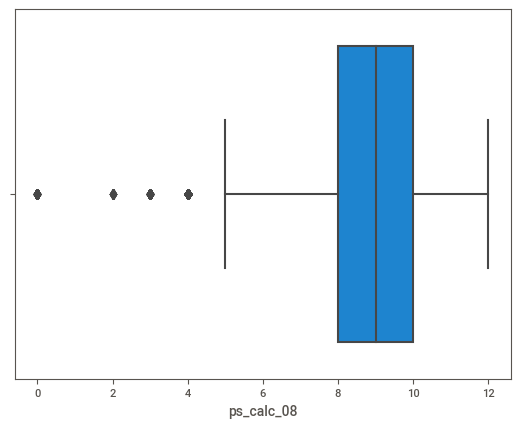

In [355]:
# outlier present as per data visualization using boxplot

sns.boxplot(x='ps_calc_08',data=data)
plt.show()

<AxesSubplot:xlabel='ps_calc_08', ylabel='Count'>

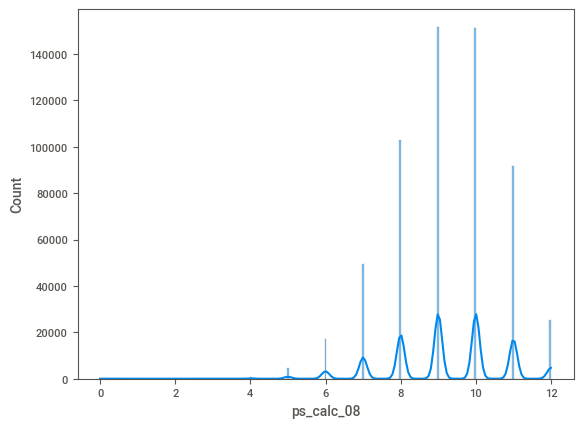

In [356]:
# checking distribution using histplot & data are not normally distributed

sns.histplot(x='ps_calc_08',data=data,kde=True)

In [357]:
# finding lower & upper limit using IQR since data are not normally distributed

IQR=stats.iqr(data.ps_calc_08,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.ps_calc_08.quantile(0.25)
print('Q1 : ',Q1)

Q3=data.ps_calc_08.quantile(0.75)
print('Q3 : ',Q3)

Lower_limit=Q3-1.5*IQR
print('Lower_limit : ',Lower_limit)

Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  2.0
Q1 :  8.0
Q3 :  10.0
Lower_limit :  7.0
Upper_limit :  13.0


In [358]:
# outlier present in lower limit
data.loc[data['ps_calc_08']<Lower_limit]

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
7            22       0          5              1          4              0   
14           46       0          5              1         11              0   
19           64       1          0              1          2              1   
34           96       0          0              1          1              1   
51          127       0          6              1          6              0   
...         ...     ...        ...            ...        ...            ...   
595017  1487500       0          1              1          2              0   
595038  1487547       0          2              1          2              1   
595051  1487573       0          2              1          7              0   
595080  1487646       0          6              2          1              1   
595097  1487705       0          1              2          7              1   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  \
7                   0              1              0              0   
14                  0              0              0              0   
19                  0              1              0              0   
34                  0              0              1              0   
51                  0              1              0              0   
...               ...            ...            ...            ...   
595017              0              0              0              0   
595038              0              0              0              1   
595051              0              1              0              0   
595080              0              0              0              1   
595097              0              1              0              0   

        ps_ind_09_bin  ps_ind_10_bin  ps_ind_11_bin  ps_ind_12_bin  \
7                   0              0              0              0   
14                  1              0              0              0   
19                  0              0              0              0   
34                  0              0              0              0   
51                  0              0              0              0   
...               ...            ...            ...            ...   
595017              1              0              0              0   
595038              0              0              0              0   
595051              0              0              0              0   
595080              0              0              0              0   
595097              0              0              0              0   

        ps_ind_13_bin  ps_ind_14  ps_ind_15  ps_ind_16_bin  ps_ind_17_bin  \
7                   0          0         13              1              0   
14                  0          0         10              0              0   
19                  0          0          8              1              0   
34                  0          0          9              0              0   
51                  0          0         12              0              1   
...               ...        ...        ...            ...            ...   
595017              0          0          4              1              0   
595038              0          0          6              1              0   
595051              0          0          4              1              0   
595080              0          0          5              1              0   
595097              0          0         13              1              0   

        ps_ind_18_bin  ps_reg_01  ps_reg_02  ps_reg_03  ps_car_01_cat  \
7                   0        0.7        0.4   0.607248             11   
14                  1        0.8        0.6   1.052972             11   
19                  0        0.9        0.3   0.402337              7   
34                  0        0.9        0.4   0.922293             11   
51                  0        0.8        0.8   1.304080             11   
...               .

In [359]:
# imputing outlier with median

data.loc[data['ps_calc_08']<Lower_limit,'ps_calc_08']=data.ps_calc_08.median()

In [360]:
data.loc[data['ps_calc_08']<Lower_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

In [361]:
data.loc[data['ps_calc_08']>Upper_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

## ps_calc_009

In [362]:
data.ps_calc_09.unique()

array([1, 2, 4, 3, 0, 5, 6, 7], dtype=int64)

In [363]:
data.ps_calc_09.value_counts()

2    182490
3    152807
1    121377
4     76963
0     34560
5     22970
6      3782
7       263
Name: ps_calc_09, dtype: int64

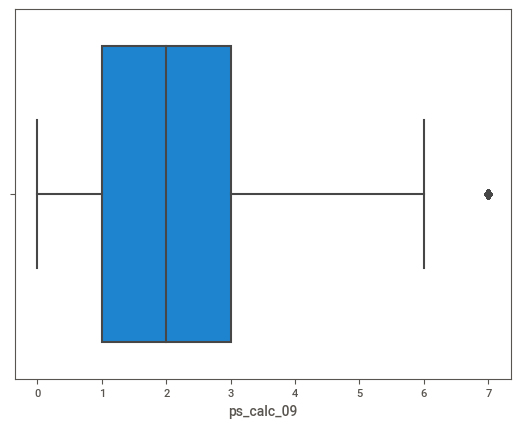

In [364]:
 # outlier present as per data visualization using boxplot

sns.boxplot(x='ps_calc_09',data=data)
plt.show()

<AxesSubplot:xlabel='ps_calc_09', ylabel='Count'>

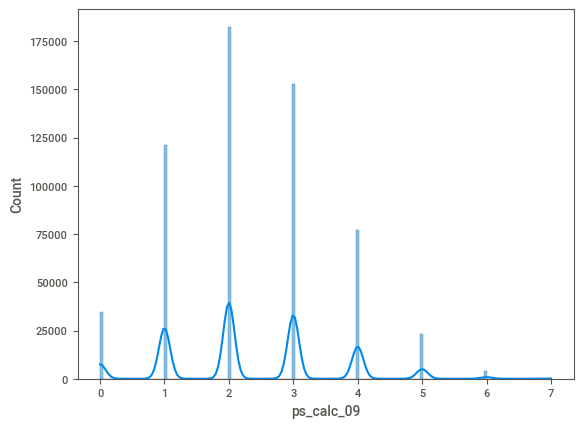

In [365]:
# checking distribution using histplot & data are not normally distributed

sns.histplot(x='ps_calc_09',data=data,kde=True)

In [366]:
# finding lower & upper limit using IQR since data are not normally distributed

IQR=stats.iqr(data.ps_calc_09,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.ps_calc_09.quantile(0.25)
print('Q1 : ',Q1)

Q3=data.ps_calc_09.quantile(0.75)
print('Q3 : ',Q3)

Lower_limit=Q3-1.5*IQR
print('Lower_limit : ',Lower_limit)

Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  2.0
Q1 :  1.0
Q3 :  3.0
Lower_limit :  0.0
Upper_limit :  6.0


In [367]:
# outlier present in upper limit

data.loc[data['ps_calc_09']>Upper_limit]

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
3305       8434       0          0              3          8              0   
3834       9877       0          3              1          5              0   
8504      21568       0          5              1          2              1   
9148      23122       0          5              2          2              0   
10895     27520       0          3              2          2              1   
...         ...     ...        ...            ...        ...            ...   
583327  1458110       0          0              1          2              0   
585580  1463746       0          0              2          3              0   
591109  1477488       0          1              1          2              1   
592334  1480623       0          1              1          2              1   
592836  1481924       0          1              1          6              0   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  \
3305                0              1              0              0   
3834                0              1              0              0   
8504                0              0              0              1   
9148                0              0              0              1   
10895               0              0              1              0   
...               ...            ...            ...            ...   
583327              0              0              1              0   
585580              0              1              0              0   
591109              0              1              0              0   
592334              0              0              1              0   
592836              1              1              0              0   

        ps_ind_09_bin  ps_ind_10_bin  ps_ind_11_bin  ps_ind_12_bin  \
3305                0              0              0              0   
3834                0              0              0              0   
8504                0              0              0              0   
9148                0              0              0              0   
10895               0              0              0              0   
...               ...            ...            ...            ...   
583327              0              0              0              0   
585580              0              0              0              0   
591109              0              0              0              0   
592334              0              0              0              0   
592836              0              0              0              0   

        ps_ind_13_bin  ps_ind_14  ps_ind_15  ps_ind_16_bin  ps_ind_17_bin  \
3305                0          0          6              1              0   
3834                0          0          2              0              0   
8504                0          0          7              0              1   
9148                0          0          6              1              0   
10895               0          0          0              0              1   
...               ...        ...        ...            ...            ...   
583327              0          0          6              0              1   
585580              0          0          5              1              0   
591109              0          0          4              1              0   
592334              0          0          3              1              0   
592836              0          0          6              1              0   

        ps_ind_18_bin  ps_reg_01  ps_reg_02  ps_reg_03  ps_car_01_cat  \
3305                0        0.9        0.2   0.450694              7   
3834                1        0.9        0.3   0.657172              7   
8504                0        0.0        0.0   0.611351              7   
9148                0        0.5        0.3   0.668954              7   
10895               0        0.8        0.5   0.394493              7   
...               .

In [368]:
# imputing outlier with median

data.loc[data['ps_calc_09']>Upper_limit,'ps_calc_09']=data.ps_calc_09.median()

In [369]:
data.loc[data['ps_calc_09']>Upper_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

In [370]:
data.loc[data['ps_calc_09']<Lower_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

## ps_calc_10

In [371]:
data.ps_calc_10.unique()

array([ 5,  7,  2, 12,  8, 10, 13, 11,  9, 18,  4, 15,  6, 14, 16,  3,  1,
       17,  0, 21, 19, 20, 22, 23, 25, 24], dtype=int64)

In [372]:
data.ps_calc_10.value_counts()

8     82027
7     78002
9     76764
10    65295
6     64562
11    49561
5     46177
12    34909
4     27197
13    22706
14    13692
3     12980
15     7696
2      4564
16     4110
17     2040
1      1107
18      922
19      401
0       222
20      168
21       65
22       33
23       10
25        1
24        1
Name: ps_calc_10, dtype: int64

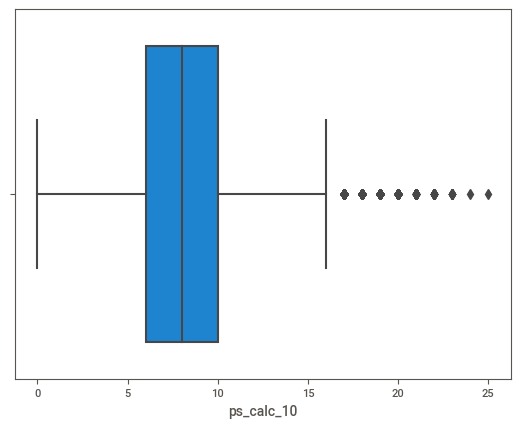

In [373]:
 # outlier present as per data visualization using boxplot

sns.boxplot(x='ps_calc_10',data=data)
plt.show()

<AxesSubplot:xlabel='ps_calc_10', ylabel='Count'>

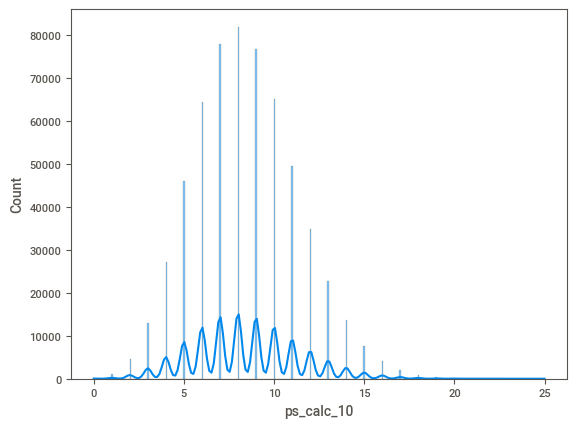

In [374]:
# checking distribution using histplot & data are not normally distributed

sns.histplot(x='ps_calc_10',data=data,kde=True)

In [375]:
# finding lower & upper limit using IQR since data are not normally distributed

IQR=stats.iqr(data.ps_calc_10,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.ps_calc_10.quantile(0.25)
print('Q1 : ',Q1)

Q3=data.ps_calc_10.quantile(0.75)
print('Q3 : ',Q3)

Lower_limit=Q3-1.5*IQR
print('Lower_limit : ',Lower_limit)

Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  4.0
Q1 :  6.0
Q3 :  10.0
Lower_limit :  4.0
Upper_limit :  16.0


In [376]:
# outlier present in lower limit

data.loc[data['ps_calc_10']<Lower_limit]

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
3            16       0          0              1          2              0   
166         435       0          0              1          3              0   
187         475       0          0              1          5              1   
199         502       0          1              1          5              1   
204         524       0          1              2          2              1   
...         ...     ...        ...            ...        ...            ...   
595141  1487816       0          0              1          1              0   
595160  1487875       0          3              1          7              0   
595164  1487890       0          3              2          5              0   
595191  1487968       0          5              1          3              0   
595204  1488008       0          1              2          2              1   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  \
3                   0              1              0              0   
166                 0              1              0              0   
187                 0              0              1              0   
199                 0              1              0              0   
204                 0              0              0              0   
...               ...            ...            ...            ...   
595141              0              1              0              0   
595160              0              1              0              0   
595164              0              0              1              0   
595191              0              0              0              1   
595204              0              0              1              0   

        ps_ind_09_bin  ps_ind_10_bin  ps_ind_11_bin  ps_ind_12_bin  \
3                   0              0              0              0   
166                 0              0              0              0   
187                 0              0              0              0   
199                 0              0              0              0   
204                 1              0              0              0   
...               ...            ...            ...            ...   
595141              0              0              0              0   
595160              0              0              0              0   
595164              0              0              0              0   
595191              0              0              0              0   
595204              0              0              0              0   

        ps_ind_13_bin  ps_ind_14  ps_ind_15  ps_ind_16_bin  ps_ind_17_bin  \
3                   0          0          8              1              0   
166                 0          0          4              0              0   
187                 0          0          6              1              0   
199                 0          0          0              0              0   
204                 0          0         10              1              0   
...               ...        ...        ...            ...            ...   
595141              0          0         10              0              0   
595160              0          0         11              1              0   
595164              0          0         10              0              0   
595191              0          0          8              0              1   
595204              0          0         11              1              0   

        ps_ind_18_bin  ps_reg_01  ps_reg_02  ps_reg_03  ps_car_01_cat  \
3                   0        0.9        0.2   0.580948              7   
166                 1        0.1        0.1  -1.000000             10   
187                 0        0.0        0.0   0.680074             10   
199                 1        0.9        0.4   0.924662             11   
204                 0        0.9        0.6   0.893029              8   
...               .

In [377]:
# imputing outlier with median

data.loc[data['ps_calc_10']<Lower_limit,'ps_calc_10']=data.ps_calc_10.median()

In [378]:
data.loc[data['ps_calc_10']<Lower_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

In [379]:
# outlier present in upper limit

data.loc[data['ps_calc_10']>Upper_limit]

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
20           65       0          0              1          2              0   
486        1328       0          2              2          4              1   
646        1695       0          1              1          2              1   
934        2424       0          3              1          5              0   
1159       3002       0          4              1          2              1   
...         ...     ...        ...            ...        ...            ...   
594239  1485520       0          3              1          8              1   
594428  1486009       0          7              2          1              0   
594609  1486487       0          3              1          2              0   
594852  1487087       0          1              1          3              0   
595196  1487983       0          1              1          2              0   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  \
20                  0              1              0              0   
486                 0              0              1              0   
646                 0              0              0              1   
934                 0              0              0              0   
1159                0              0              0              0   
...               ...            ...            ...            ...   
594239              0              1              0              0   
594428              0              0              0              0   
594609              0              0              1              0   
594852              0              0              0              0   
595196              0              1              0              0   

        ps_ind_09_bin  ps_ind_10_bin  ps_ind_11_bin  ps_ind_12_bin  \
20                  0              0              0              0   
486                 0              0              0              0   
646                 0              0              0              0   
934                 1              0              0              0   
1159                1              0              0              0   
...               ...            ...            ...            ...   
594239              0              0              0              0   
594428              1              0              0              0   
594609              0              0              0              0   
594852              1              0              0              0   
595196              0              0              0              0   

        ps_ind_13_bin  ps_ind_14  ps_ind_15  ps_ind_16_bin  ps_ind_17_bin  \
20                  0          0          3              0              0   
486                 0          0          0              0              1   
646                 0          0         12              1              0   
934                 0          0          8              0              1   
1159                0          0          6              1              0   
...               ...        ...        ...            ...            ...   
594239              0          0          8              1              0   
594428              0          0          7              0              0   
594609              0          0          2              1              0   
594852              0          0          0              0              1   
595196              0          0          0              0              0   

        ps_ind_18_bin  ps_reg_01  ps_reg_02  ps_reg_03  ps_car_01_cat  \
20                  1        0.4        0.7   1.372725             11   
486                 0        0.9        0.3   0.555653              7   
646                 0        0.3        0.4  -1.000000              7   
934                 0        0.9        1.1   1.290591             11   
1159                0        0.9        0.7   1.160819             11   
...               .

In [380]:
# imputing outlier present in median

data.loc[data['ps_calc_10']>Upper_limit,'ps_calc_10']=data.ps_calc_10.median()

In [381]:
data.loc[data['ps_calc_10']>Upper_limit]

Empty DataFrame
Columns: [id, target, ps_ind_01, ps_ind_02_cat, ps_ind_03, ps_ind_04_cat, ps_ind_05_cat, ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_ind_15, ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin, ps_reg_01, ps_reg_02, ps_reg_03, ps_car_01_cat, ps_car_02_cat, ps_car_03_cat, ps_car_04_cat, ps_car_05_cat, ps_car_06_cat, ps_car_07_cat, ps_car_08_cat, ps_car_09_cat, ps_car_10_cat, ps_car_11_cat, ps_car_11, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03, ps_calc_04, ps_calc_05, ps_calc_06, ps_calc_07, ps_calc_08, ps_calc_09, ps_calc_10, ps_calc_11, ps_calc_12, ps_calc_13, ps_calc_14, ps_calc_15_bin, ps_calc_16_bin, ps_calc_17_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin]
Index: []

## ps_calc_11

In [382]:
data.ps_calc_11.unique()

array([ 9,  3,  4,  2,  7,  6,  5, 10,  8,  1,  0, 13, 11, 12, 14, 15, 16,
       19, 17, 18], dtype=int64)

In [383]:
data.ps_calc_11.value_counts()

5     102498
4      93877
6      93099
7      72130
3      69511
8      49101
2      38357
9      29826
10     16230
1      14034
11      7925
12      3583
0       2544
13      1575
14       631
15       189
16        68
17        22
18        11
19         1
Name: ps_calc_11, dtype: int64

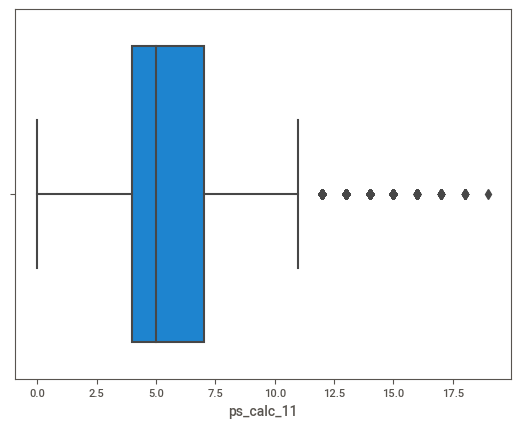

In [384]:
# outlier present as per data visualization using boxplot

sns.boxplot(x='ps_calc_11',data=data)
plt.show()

<AxesSubplot:xlabel='ps_calc_11', ylabel='Count'>

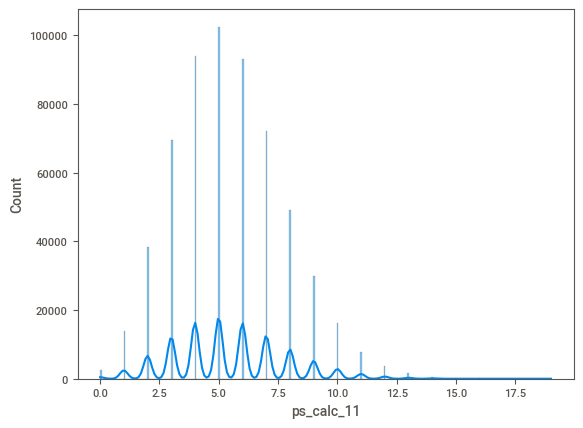

In [385]:
# checking distribution using histplot & data are not normally distributed

sns.histplot(x='ps_calc_11',data=data,kde=True)

In [386]:
# finding lower & upper limit using IQR since data are not normally distributed

IQR=stats.iqr(data.ps_calc_11,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.ps_calc_11.quantile(0.25)
print('Q1 : ',Q1)

Q3=data.ps_calc_11.quantile(0.75)
print('Q3 : ',Q3)

Lower_limit=Q3-1.5*IQR
print('Lower_limit : ',Lower_limit)

Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  3.0
Q1 :  4.0
Q3 :  7.0
Lower_limit :  2.5
Upper_limit :  11.5


In [387]:
# outlier present in lower limit

data.loc[data['ps_calc_11']<Lower_limit]

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
3            16       0          0              1          2              0   
13           43       0          1              1          3              1   
29           85       0          3              2          2              0   
33           95       0          0              1          8              0   
36           99       0          1              1          6              1   
...         ...     ...        ...            ...        ...            ...   
595148  1487837       0          1              2          1              0   
595183  1487951       0          1              1          9              0   
595190  1487964       0          1              2          3              0   
595199  1487992       0          3              1          3              1   
595200  1487994       0          1              1          1              0   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  \
3                   0              1              0              0   
13                  0              0              1              0   
29                  0              1              0              0   
33                  0              1              0              0   
36                  4              0              1              0   
...               ...            ...            ...            ...   
595148              0              1              0              0   
595183              0              1              0              0   
595190              0              1              0              0   
595199              0              0              0              1   
595200              3              1              0              0   

        ps_ind_09_bin  ps_ind_10_bin  ps_ind_11_bin  ps_ind_12_bin  \
3                   0              0              0              0   
13                  0              0              0              0   
29                  0              0              0              0   
33                  0              0              0              0   
36                  0              0              0              0   
...               ...            ...            ...            ...   
595148              0              0              0              0   
595183              0              0              0              0   
595190              0              0              0              0   
595199              0              0              0              0   
595200              0              0              0              0   

        ps_ind_13_bin  ps_ind_14  ps_ind_15  ps_ind_16_bin  ps_ind_17_bin  \
3                   0          0          8              1              0   
13                  0          0         12              1              0   
29                  0          0          8              1              0   
33                  0          0          2              0              1   
36                  0          0          4              0              0   
...               ...        ...        ...            ...            ...   
595148              0          0          4              1              0   
595183              0          0          6              1              0   
595190              0          0          9              1              0   
595199              0          0         13              1              0   
595200              0          0          5              1              0   

        ps_ind_18_bin  ps_reg_01  ps_reg_02  ps_reg_03  ps_car_01_cat  \
3                   0        0.9        0.2   0.580948              7   
13                  0        0.7        0.9   0.684197              9   
29                  0        0.9        1.0   1.155692              8   
33                  0        0.5        0.3   0.653357              6   
36                  1        0.0        0.0   0.603117              7   
...               .

In [388]:
a=len(data.loc[data['ps_calc_11']<Lower_limit])
b=len(data.loc[data['ps_calc_11']>Upper_limit])
c=(a+b)/len(data)
c

0.10250969402498605

- 10.3 % OUTLIERS IN "ps_calc_11"

## ps_calc_12

In [389]:
data.ps_calc_12.unique()

array([ 1,  2,  0,  5,  3,  4,  6,  7,  8,  9, 10], dtype=int64)

In [390]:
data.ps_calc_12.value_counts()

1     203250
2     145300
0     141063
3      70341
4      25777
5       7290
6       1724
7        387
8         66
9         11
10         3
Name: ps_calc_12, dtype: int64

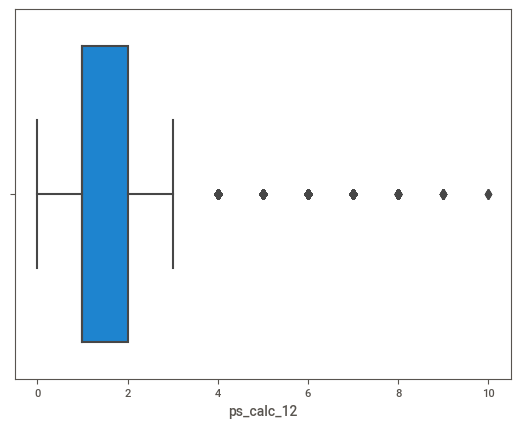

In [391]:
 # outlier present as per data visualization using boxplot

sns.boxplot(x='ps_calc_12',data=data)
plt.show()

<AxesSubplot:xlabel='ps_calc_12', ylabel='Count'>

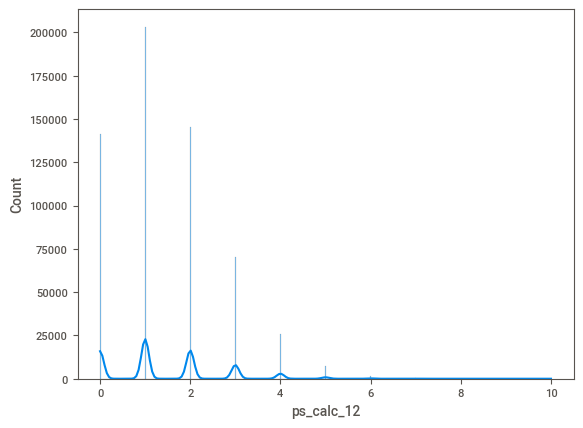

In [392]:
# checking distribution using histplot & data are not normally distributed

sns.histplot(x='ps_calc_12',data=data,kde=True)

In [393]:
# finding lower & upper limit using IQR since data are not normally distributed

IQR=stats.iqr(data.ps_calc_12,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.ps_calc_12.quantile(0.25)
print('Q1 : ',Q1)

Q3=data.ps_calc_12.quantile(0.75)
print('Q3 : ',Q3)

Lower_limit=Q3-1.5*IQR
print('Lower_limit : ',Lower_limit)

Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  1.0
Q1 :  1.0
Q3 :  2.0
Lower_limit :  0.5
Upper_limit :  3.5


In [394]:
a=len(data.loc[data['ps_calc_12']<Lower_limit])
b=len(data.loc[data['ps_calc_12']>Upper_limit])
c=(a+b)/len(data)
c

0.29623226682257753

- 29.6 % OUTLIERS iN "ps_calc_12"

## ps_calc_13

In [395]:
data.ps_calc_13.unique()

array([ 5,  1,  7,  4,  0,  3,  6,  2,  8, 10,  9, 11, 12, 13],
      dtype=int64)

In [396]:
data.ps_calc_13.value_counts()

2     139314
3     132398
1      96644
4      95742
5      54549
0      33736
6      26323
7      11002
8       3881
9       1160
10       351
11        88
12        20
13         4
Name: ps_calc_13, dtype: int64

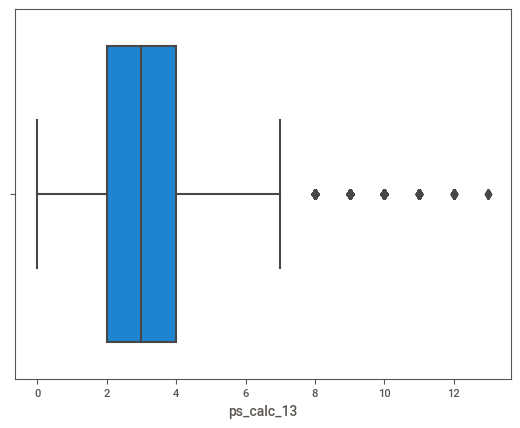

In [397]:
# outlier present as per data visualization using boxplot

sns.boxplot(x='ps_calc_13',data=data)
plt.show()

In [398]:
# finding lower & upper limit using IQR since data are not normally distributed

IQR=stats.iqr(data.ps_calc_13,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.ps_calc_13.quantile(0.25)
print('Q1 : ',Q1)

Q3=data.ps_calc_13.quantile(0.75)
print('Q3 : ',Q3)

Lower_limit=Q3-1.5*IQR
print('Lower_limit : ',Lower_limit)

Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  2.0
Q1 :  2.0
Q3 :  4.0
Lower_limit :  1.0
Upper_limit :  7.0


In [399]:
a=len(data.loc[data['ps_calc_13']<Lower_limit])
b=len(data.loc[data['ps_calc_13']>Upper_limit])
c=(a+b)/len(data)
c

0.06592609019979435

- 6.6 % OUTLIERS iN "ps_calc_13"

## ps_calc_14

In [400]:
data.ps_calc_14.unique()

array([ 8,  9,  7,  3, 10,  6,  5, 11,  4, 14, 13, 12, 16,  2,  1, 15,  0,
       17, 19, 20, 18, 22, 21, 23], dtype=int64)

In [401]:
data.ps_calc_14.value_counts()

7     86662
8     82161
6     80886
9     68472
5     64025
10    52045
4     42589
11    35337
3     22820
12    22224
13    12883
2      8940
14     6934
15     3536
1      2397
16     1666
17      735
0       393
18      305
19      131
20       47
21       18
22        5
23        1
Name: ps_calc_14, dtype: int64

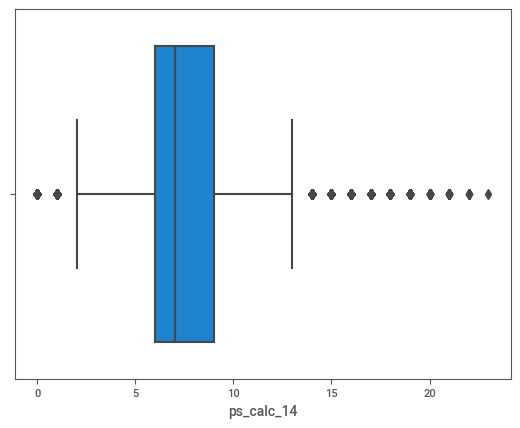

In [402]:
# outlier present as per data visualization using boxplot

sns.boxplot(x='ps_calc_14',data=data)
plt.show()

In [403]:
# finding lower & upper limit using IQR since data are not normally distributed

IQR=stats.iqr(data.ps_calc_14,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.ps_calc_14.quantile(0.25)
print('Q1 : ',Q1)

Q3=data.ps_calc_14.quantile(0.75)
print('Q3 : ',Q3)

Lower_limit=Q3-1.5*IQR
print('Lower_limit : ',Lower_limit)

Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  3.0
Q1 :  6.0
Q3 :  9.0
Lower_limit :  4.5
Upper_limit :  13.5


In [404]:
a=len(data.loc[data['ps_calc_14']<Lower_limit])
b=len(data.loc[data['ps_calc_14']>Upper_limit])
c=(a+b)/len(data)
c

0.1520752269779507

- 15.2 % OUTLIERS IN "ps_calc_14"

## ps_calc_15_bin

In [405]:
data.ps_calc_15_bin.unique()

array([0, 1], dtype=int64)

In [406]:
data.ps_calc_15_bin.value_counts()

0    522351
1     72861
Name: ps_calc_15_bin, dtype: int64

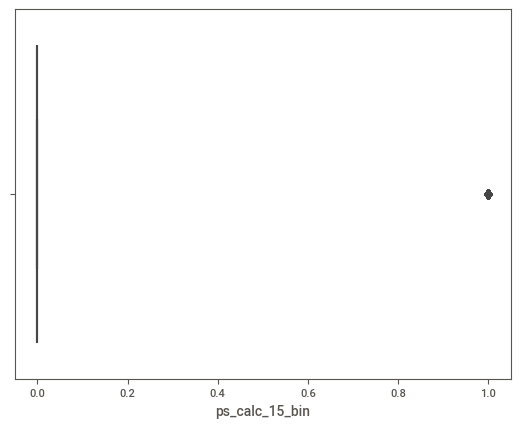

In [407]:
 # outlier present as per data visualization using boxplot

sns.boxplot(x='ps_calc_15_bin',data=data)
plt.show()

In [408]:
# finding lower & upper limit using IQR since data are not normally distributed

IQR=stats.iqr(data.ps_calc_15_bin,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.ps_calc_15_bin.quantile(0.25)
print('Q1 : ',Q1)

Q3=data.ps_calc_15_bin.quantile(0.75)
print('Q3 : ',Q3)

Lower_limit=Q3-1.5*IQR
print('Lower_limit : ',Lower_limit)

Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  0.0
Q1 :  0.0
Q3 :  0.0
Lower_limit :  0.0
Upper_limit :  0.0


In [409]:
a=len(data.loc[data['ps_calc_15_bin']<Lower_limit])
b=len(data.loc[data['ps_calc_15_bin']>Upper_limit])
c=(a+b)/len(data)
c

0.12241184653535211

- 12.2 % OUTLIERS IN "ps_calc_15_bin"

## ps_calc_16_bin

In [410]:
data.ps_calc_16_bin.unique()

array([1, 0], dtype=int64)

In [411]:
data.ps_calc_16_bin.value_counts()

1    373653
0    221559
Name: ps_calc_16_bin, dtype: int64

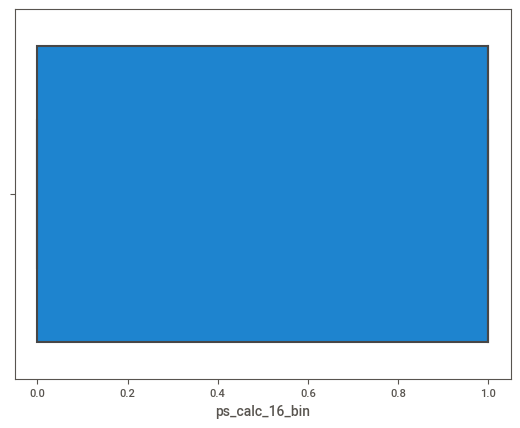

In [412]:
# data visualization using boxplot

sns.boxplot(x='ps_calc_16_bin',data=data)
plt.show()

- THEY HAVE NO OUTLIERS IN "ps_calc_16_BIN"

## ps_calc_17_bin

In [413]:
 data.ps_calc_17_bin.unique()

array([1, 0], dtype=int64)

In [414]:
data.ps_calc_17_bin.value_counts()

1    329807
0    265405
Name: ps_calc_17_bin, dtype: int64

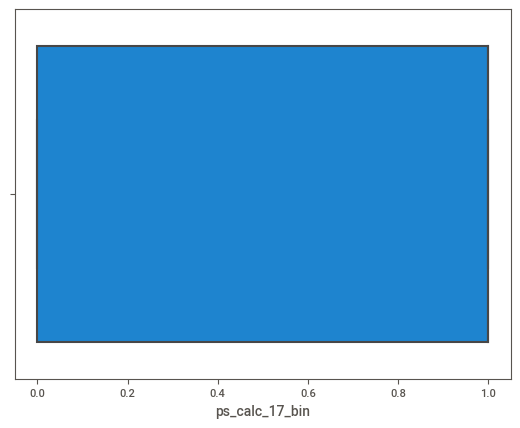

In [415]:
# data visualization using boxplot

sns.boxplot(x='ps_calc_17_bin',data=data)
plt.show()

- THEY HAVE NO OUTLIERS IN 'ps_calc_17_bin'

## ps_calc_18_bin

In [416]:
data.ps_calc_18_bin.unique()

array([0, 1], dtype=int64)

In [417]:
data.ps_calc_18_bin.value_counts()

0    424308
1    170904
Name: ps_calc_18_bin, dtype: int64

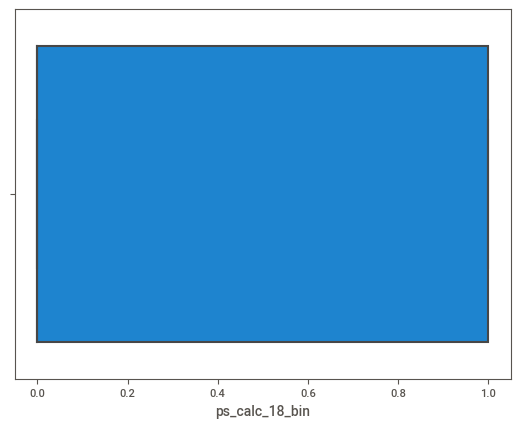

In [418]:
# data visualization using boxplot

sns.boxplot(x='ps_calc_18_bin',data=data)
plt.show()

- THEY HAVE NO OUTLIERS IN "ps_calc_18_bin"

## ps_calc_19_bin

In [419]:
data.ps_calc_19_bin.unique()

array([0, 1], dtype=int64)

In [420]:
data.ps_calc_19_bin.value_counts()

0    387493
1    207719
Name: ps_calc_19_bin, dtype: int64

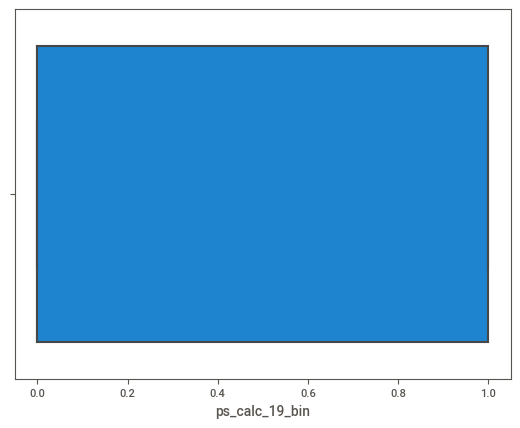

In [421]:
# data visualization using boxplot

sns.boxplot(x='ps_calc_19_bin',data=data)
plt.show()

- THEY HAVE NO OUTLIERS IN "ps_calc_19_bin"

## ps_calc_20_bin

In [422]:
data.ps_calc_20_bin.unique()

array([1, 0], dtype=int64)

In [423]:
data.ps_calc_20_bin.value_counts()

0    503966
1     91246
Name: ps_calc_20_bin, dtype: int64

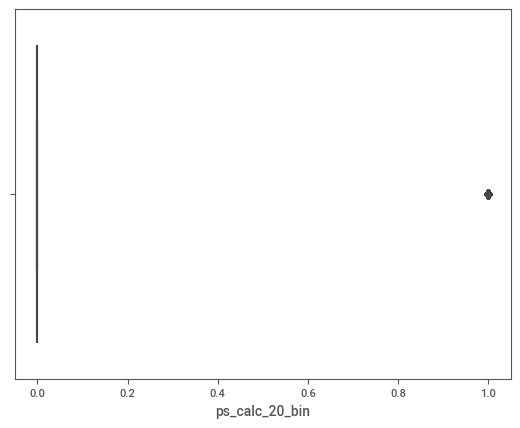

In [424]:
# outlier present as per data visualization using boxplot

sns.boxplot(x='ps_calc_20_bin',data=data)
plt.show()

In [425]:
# finding lower & upper limit using IQR since data are not normally distributed

IQR=stats.iqr(data.ps_calc_20_bin,interpolation='midpoint')
print('IQR : ',IQR)

Q1=data.ps_calc_20_bin.quantile(0.25)
print('Q1 : ',Q1)

Q3=data.ps_calc_20_bin.quantile(0.75)
print('Q3 : ',Q3)

Lower_limit=Q3-1.5*IQR
print('Lower_limit : ',Lower_limit)

Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  0.0
Q1 :  0.0
Q3 :  0.0
Lower_limit :  0.0
Upper_limit :  0.0


In [426]:
a=len(data.loc[data['ps_calc_20_bin']<Lower_limit])
b=len(data.loc[data['ps_calc_20_bin']>Upper_limit])
c=(a+b)/len(data)
c

0.15330000067202945

- 15.3 % OUTLIERS IN "ps_calc_20_bin

# FEATURE SELECTION

In [420]:
# finding the mean, median (50%), std(standerd diviation), minimum, maximum and count
data.describe()

id         target      ps_ind_01  ps_ind_02_cat  \
count  5.952120e+05  595212.000000  595212.000000  595212.000000   
mean   7.436966e+05       0.036392       1.900111       1.302181   
std    4.294275e+05       0.187264       1.983807       0.553043   
min    0.000000e+00       0.000000       0.000000       0.000000   
25%    3.718278e+05       0.000000       0.000000       1.000000   
50%    7.434505e+05       0.000000       1.000000       1.000000   
75%    1.115489e+06       0.000000       3.000000       2.000000   
max    1.488027e+06       1.000000       7.000000       3.000000   

           ps_ind_03  ps_ind_04_cat  ps_ind_05_cat  ps_ind_06_bin  \
count  595212.000000  595212.000000  595212.000000  595212.000000   
mean        4.423269       0.416934       0.405321       0.393710   
std         2.699909       0.493052       1.350553       0.488572   
min         0.000000       0.000000      -1.000000       0.000000   
25%         2.000000       0.000000       0.000000       0.000000   
50%         4.000000       0.000000       0.000000       0.000000   
75%         6.000000       1.000000       0.000000       1.000000   
max        11.000000       1.000000       6.000000       1.000000   

       ps_ind_07_bin  ps_ind_08_bin  ps_ind_09_bin  ps_ind_10_bin  \
count  595212.000000  595212.000000  595212.000000       595212.0   
mean        0.256999       0.163878       0.185273            0.0   
std         0.436979       0.370165       0.388520            0.0   
min         0.000000       0.000000       0.000000            0.0   
25%         0.000000       0.000000       0.000000            0.0   
50%         0.000000       0.000000       0.000000            0.0   
75%         1.000000       0.000000       0.000000            0.0   
max         1.000000       1.000000       1.000000            0.0   

       ps_ind_11_bin  ps_ind_12_bin  ps_ind_13_bin  ps_ind_14      ps_ind_15  \
count       595212.0       595212.0       595212.0   595212.0  595212.000000   
mean             0.0            0.0            0.0        0.0       7.299093   
std              0.0            0.0            0.0        0.0       3.546764   
min              0.0            0.0            0.0        0.0       0.000000   
25%              0.0            0.0            0.0        0.0       5.000000   
50%              0.0            0.0            0.0        0.0       7.000000   
75%              0.0            0.0            0.0        0.0      10.000000   
max              0.0            0.0            0.0        0.0      13.000000   

       ps_ind_16_bin  ps_ind_17_bin  ps_ind_18_bin      ps_reg_01  \
count  595212.000000  595212.000000  595212.000000  595212.000000   
mean        0.660781       0.121026       0.153424       0.610987   
std         0.473445       0.326158       0.360396       0.287645   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.400000   
50%         1.000000       0.000000       0.000000       0.700000   
75%         1.000000       0.000000       0.000000       0.900000   
max         1.000000       1.000000       1.000000       0.900000   

           ps_reg_02      ps_reg_03  ps_car_01_cat  ps_car_02_cat  \
count  595212.000000  595212.000000  595212.000000  595212.000000   
mean        0.439177       0.551226       8.295999       0.829829   
std         0.404259       0.793327       2.507889       0.375806   
min         0.000000      -1.000000      -1.000000      -1.000000   
25%         0.200000       0.525000       7.000000       1.000000   
50%         0.300000       0.720677       7.000000       1.000000   
75%         0.600000       1.000000      11.000000       1.000000   
max         1.800000       4.037945      11.000000       1.000000   

       ps_car_03_cat  ps_car_04_cat  ps_car_05_cat  ps_car_06_cat  \
count  595212.000000  595212.000000  595212.000000  595212.000000   
mean       -0.504953       0.724812      -0.157808       

In [421]:
# finding co-relation
data.corr()

id    target  ps_ind_01  ps_ind_02_cat  ps_ind_03  \
id              1.000000 -0.000166   0.001059       0.001794  -0.000890   
target         -0.000166  1.000000   0.018559       0.004306   0.008854   
ps_ind_01       0.001059  0.018559   1.000000      -0.031920   0.223623   
ps_ind_02_cat   0.001794  0.004306  -0.031920       1.000000  -0.213491   
ps_ind_03      -0.000890  0.008854   0.223623      -0.213491   1.000000   
ps_ind_04_cat   0.000394  0.010168   0.066796       0.109570  -0.096317   
ps_ind_05_cat   0.000106  0.029477   0.014863      -0.019000   0.053098   
ps_ind_06_bin   0.000100 -0.033883  -0.277338      -0.100994  -0.045055   
ps_ind_07_bin   0.002611  0.034269   0.005775       0.020019  -0.060234   
ps_ind_08_bin  -0.000377  0.012949   0.188612       0.021811   0.014239   
ps_ind_09_bin  -0.002082 -0.008202   0.162906       0.084551   0.111425   
ps_ind_10_bin        NaN       NaN        NaN            NaN        NaN   
ps_ind_11_bin        NaN       NaN        NaN            NaN        NaN   
ps_ind_12_bin        NaN       NaN        NaN            NaN        NaN   
ps_ind_13_bin        NaN       NaN        NaN            NaN        NaN   
ps_ind_14            NaN       NaN        NaN            NaN        NaN   
ps_ind_15      -0.001419 -0.021318   0.122359      -0.028951   0.170778   
ps_ind_16_bin  -0.000131 -0.027462   0.037090       0.022051  -0.018118   
ps_ind_17_bin   0.001430  0.036707   0.101328      -0.020211   0.027982   
ps_ind_18_bin   0.000915  0.004597  -0.112185      -0.011811   0.001423   
ps_reg_01      -0.000452  0.023537   0.102485       0.071095   0.003236   
ps_reg_02      -0.003551  0.035151   0.184001       0.088142   0.048331   
ps_reg_03      -0.000781  0.031466   0.139246       0.078854   0.002071   
ps_car_01_cat  -0.000205  0.017362  -0.055691       0.001829  -0.028582   
ps_car_02_cat   0.000118 -0.031368  -0.116604       0.052999  -0.044434   
ps_car_03_cat   0.000211  0.032126   0.043650      -0.015499   0.095751   
ps_car_04_cat   0.002386  0.032656   0.079066      -0.074311   0.073276   
ps_car_05_cat  -0.000897  0.020542   0.212976      -0.028666   0.143728   
ps_car_06_cat  -0.000725  0.011612   0.070307      -0.015771   0.008272   
ps_car_07_cat  -0.002250 -0.034920  -0.000305      -0.032841   0.055844   
ps_car_08_cat   0.001279 -0.020356   0.138378      -0.000771   0.004077   
ps_car_09_cat   0.000835  0.005802  -0.102401       0.011364  -0.013296   
ps_car_10_cat   0.000729  0.000310  -0.004355      -0.004096   0.004434   
ps_car_11_cat   0.001777  0.006167   0.006833       0.017391  -0.021422   
ps_car_11       0.003310 -0.001033   0.008600       0.023734  -0.058745   
ps_car_12       0.000567  0.030464   0.162086      -0.102462   0.070925   
ps_car_13       0.002802  0.053757   0.100108      -0.078630   0.049279   
ps_car_14      -0.000507 -0.004463   0.034568      -0.011507   0.000669   
ps_car_15       0.001710  0.027684  -0.056084       0.001657  -0.047007   
ps_calc_01      0.000055  0.001833  -0.000650       0.000271   0.001064   
ps_calc_02      0.001103  0.001475  -0.000226       0.001905   0.000035   
ps_calc_03     -0.000042  0.001899   0.001416      -0.000281   0.000539   
ps_calc_04      0.004132  0.000177  -0.000658      -0.000839   0.001154   
ps_calc_05     -0.000212  0.000785  -0.000952       0.000676  -0.000861   
ps_calc_06      0.002337  0.000200   0.000909       0.000507   0.003652   
ps_calc_07     -0.000033 -0.000092  -0.000125      -0.000764   0.001294   
ps_calc_08      0.000474 -0.000684   0.002908      -0.002455   0.001469   
ps_calc_09      0.001131  0.000740   0.000130       0.001187  -0.001160   
ps_calc_10      0.001258  0.000836  -0.000467      -0.000383  -0.000049   
ps_calc_11     -0.000688  0.000403  -0.000953       0.002321  -0.002189   
ps_calc_12     -0.000816 -0.001078   0.001694       0.000408  -0.002093   
ps_calc_13      0.000236 -0.000414   0.000442      -0.000874   0.000522   
ps_calc_14      0.002290  0.001452  -0.000544  

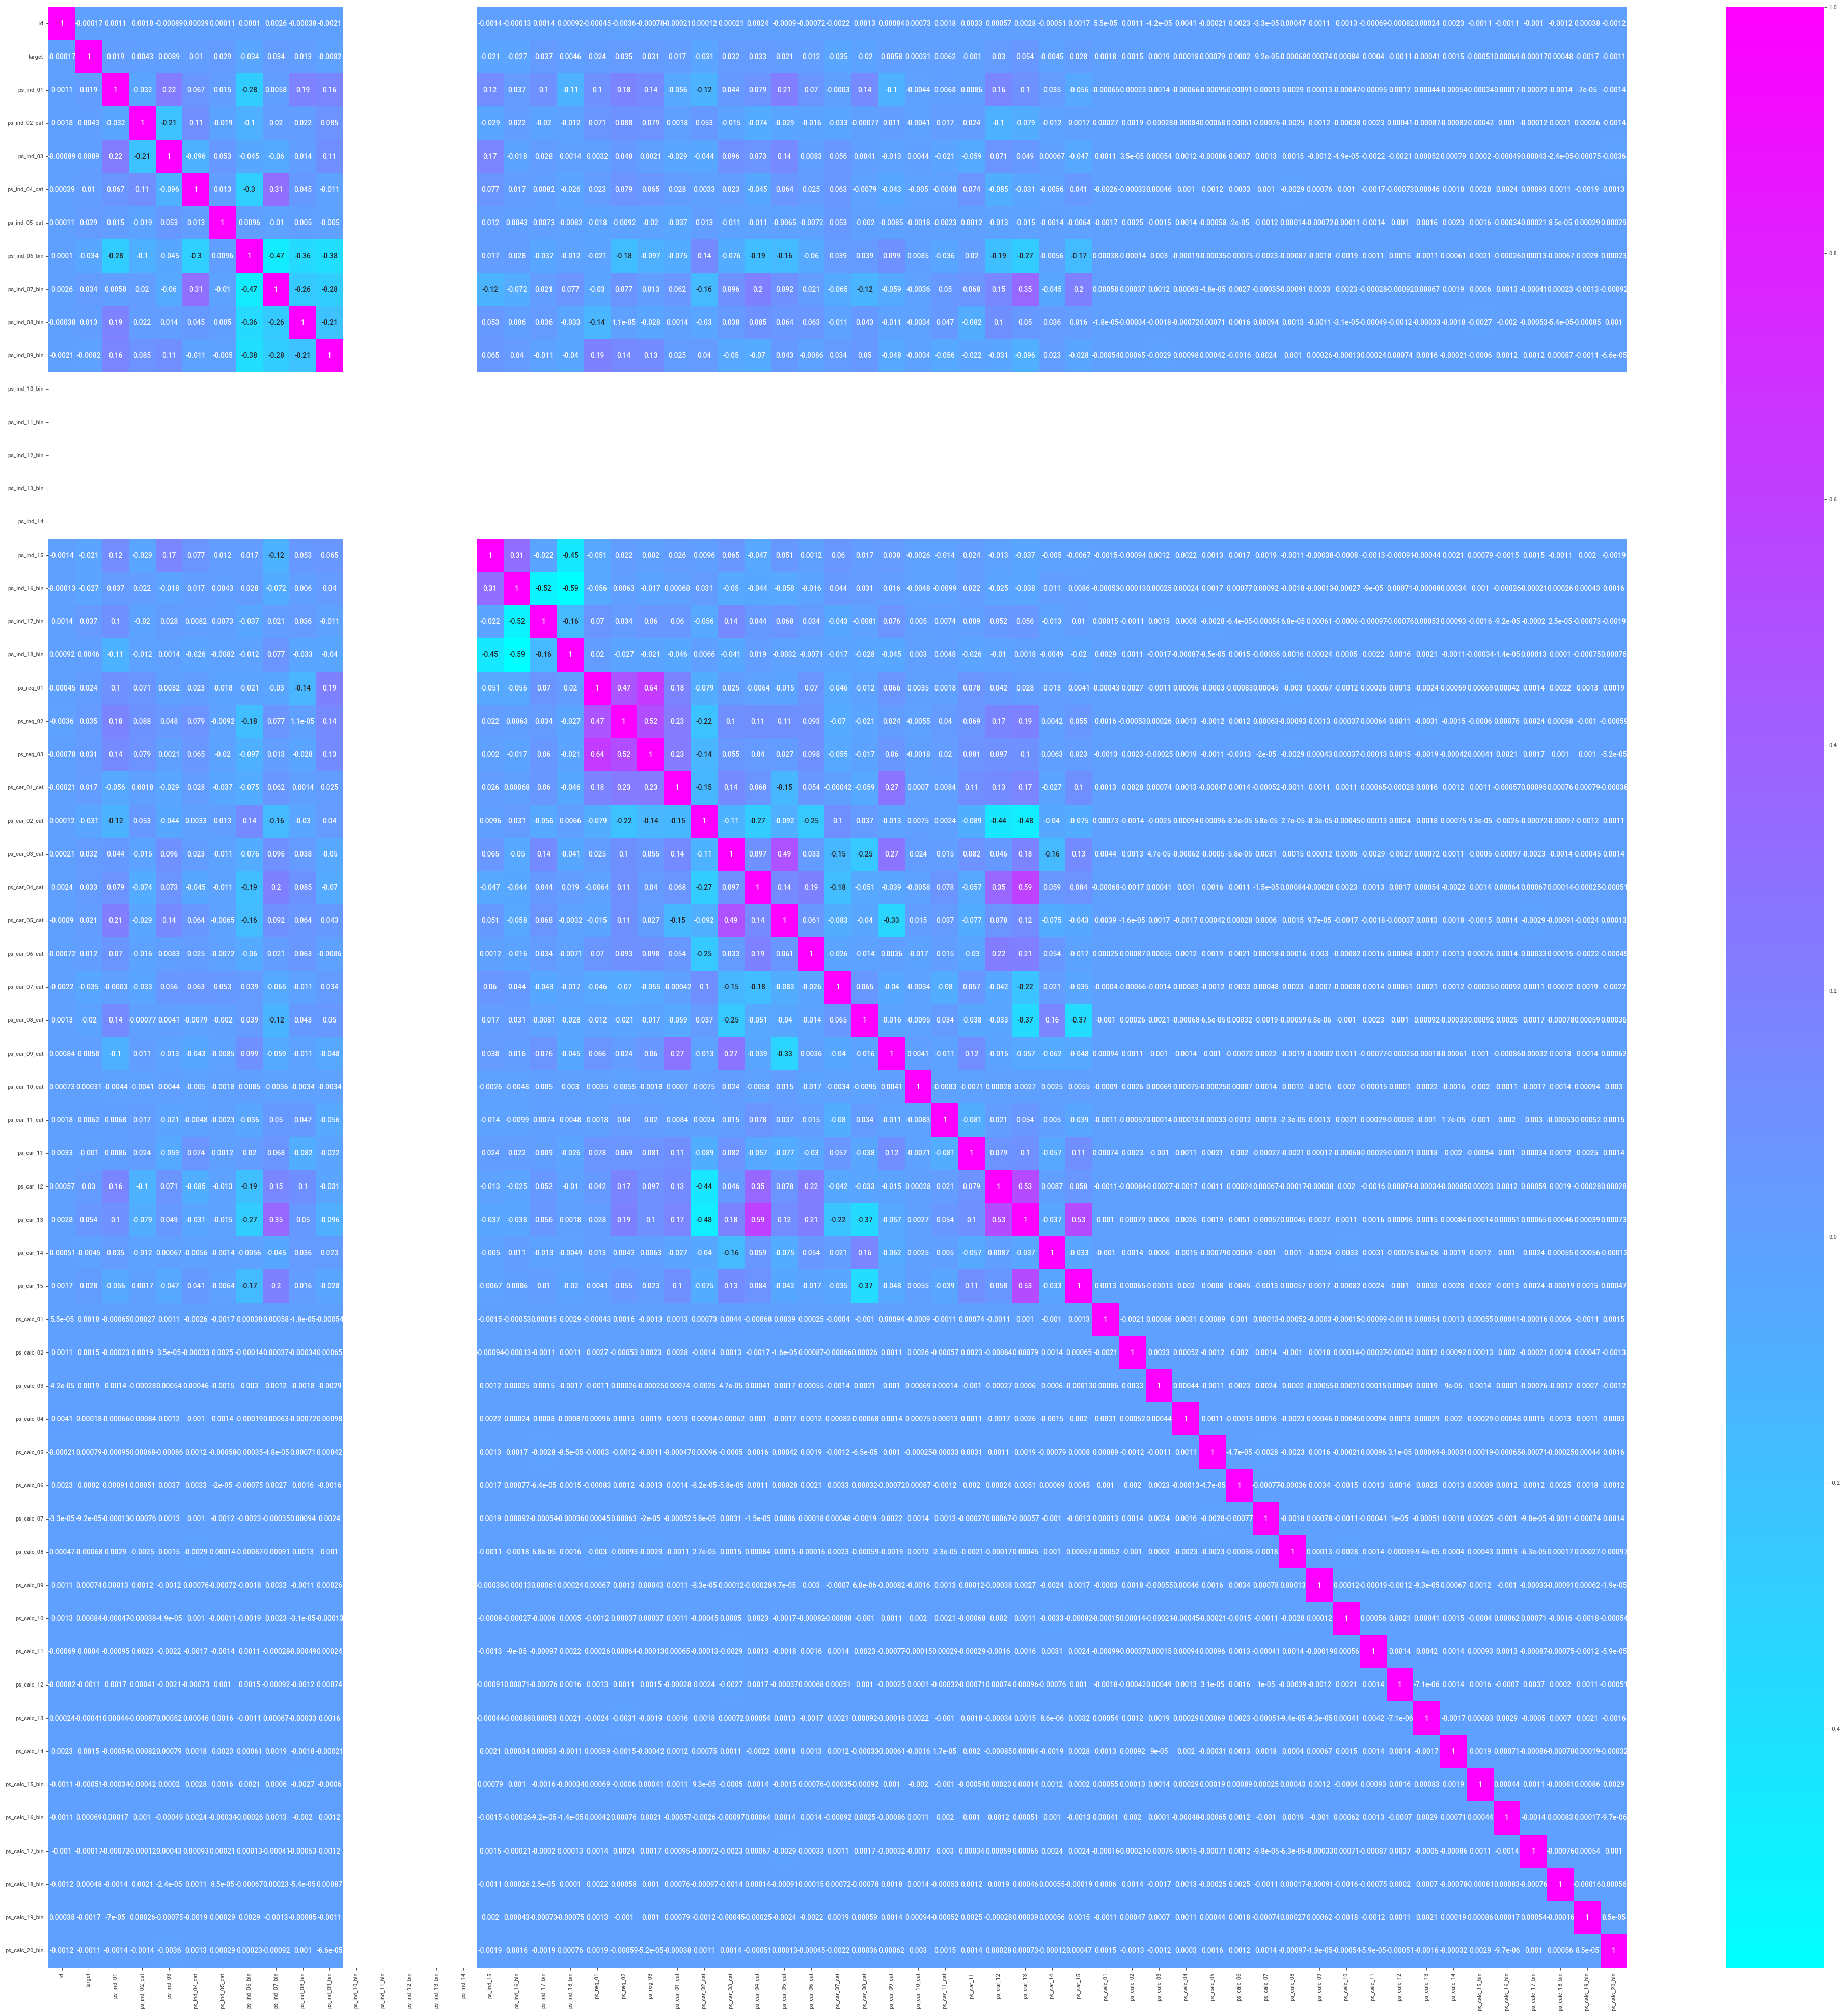

In [422]:
# using heatmap to find higly co-relation values
plt.figure(figsize=(50,50),facecolor='white')
sns.heatmap(data.corr(),annot=True,cmap='cool')
plt.show()

In [427]:
data.drop(['id','ps_ind_10_bin','ps_ind_11_bin','ps_ind_12_bin','ps_ind_13_bin','ps_ind_14'],axis='columns',inplace=True)

*** ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14 are highly correlated so drop the column ***

In [428]:
data.columns

Index(['target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat',
       'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin',
       'ps_ind_09_bin', 'ps_ind_15', 'ps_ind_16_bin', 'ps_ind_17_bin',
       'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat',
       'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat',
       'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat',
       'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13',
       'ps_car_14', 'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03',
       'ps_calc_04', 'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08',
       'ps_calc_09', 'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13',
       'ps_calc_14', 'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin',
       'ps_calc_18_bin', 'ps_calc_19_bin', 'ps_calc_20_bin'],
      dtype='object')

# Task 1

##  Create a predictive model which will help the insurance marketing team to know which customer will buy the product.


# MODEL EVALUATION

## splitting data

In [444]:
data

target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
0            0          2              2          5              1   
1            0          1              1          7              0   
2            0          5              1          9              1   
3            0          0              1          2              0   
4            0          0              2          0              1   
...        ...        ...            ...        ...            ...   
595207       0          3              1         10              0   
595208       0          5              1          3              0   
595209       0          1              1         10              0   
595210       0          5              2          3              1   
595211       0          0              1          8              0   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  \
0                   0              0              1              0   
1                   0              0              0              1   
2                   0              0              0              1   
3                   0              1              0              0   
4                   0              1              0              0   
...               ...            ...            ...            ...   
595207              0              0              0              0   
595208              0              0              0              0   
595209              0              1              0              0   
595210              0              0              0              1   
595211              0              1              0              0   

        ps_ind_09_bin  ps_ind_15  ps_ind_16_bin  ps_ind_17_bin  ps_ind_18_bin  \
0                   0         11              0              1              0   
1                   0          3              0              0              1   
2                   0         12              1              0              0   
3                   0          8              1              0              0   
4                   0          9              1              0              0   
...               ...        ...            ...            ...            ...   
595207              1         13              1              0              0   
595208              1          6              1              0              0   
595209              0         12              1              0              0   
595210              0         12              1              0              0   
595211              0          7              1              0              0   

        ps_reg_01  ps_reg_02  ps_reg_03  ps_car_01_cat  ps_car_02_cat  \
0             0.7        0.2   0.718070             10              1   
1             0.8        0.4   0.766078             11              1   
2             0.0        0.0  -1.000000              7              1   
3             0.9        0.2   0.580948              7              1   
4             0.7        0.6   0.840759             11              1   
...           ...        ...        ...            ...            ...   
595207        0.5        0.3   0.692820             10              1   
595208        0.9        0.7   1.382027              9              1   
595209        0.9        0.2   0.659071              7              1   
595210        0.9        0.4   0.698212             11              1   
595211        0.1        0.2  -1.000000              7              0   

        ps_car_03_cat  ps_car_04_cat  ps_car_05_cat  ps_car_06_cat  \
0                  -1              0              1              4   
1                  -1              0             -1             11   
2                  -1              0             -1             14   
3                   0              0              1             11   
4                  -1              0             -1             14   
...               ...            ...            ...     

In [453]:
# spliting data into x
X= data.drop('target',axis=1)

In [454]:
# spliting data into y
y=data.target

In [427]:
X

ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  ps_ind_05_cat  \
0               2              2          5              1              0   
1               1              1          7              0              0   
2               5              1          9              1              0   
3               0              1          2              0              0   
4               0              2          0              1              0   
...           ...            ...        ...            ...            ...   
595207          3              1         10              0              0   
595208          5              1          3              0              0   
595209          1              1         10              0              0   
595210          5              2          3              1              0   
595211          0              1          8              0              0   

        ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ps_ind_09_bin  ps_ind_15  \
0                   0              1              0              0         11   
1                   0              0              1              0          3   
2                   0              0              1              0         12   
3                   1              0              0              0          8   
4                   1              0              0              0          9   
...               ...            ...            ...            ...        ...   
595207              0              0              0              1         13   
595208              0              0              0              1          6   
595209              1              0              0              0         12   
595210              0              0              1              0         12   
595211              1              0              0              0          7   

        ps_ind_16_bin  ps_ind_17_bin  ps_ind_18_bin  ps_reg_01  ps_reg_02  \
0                   0              1              0        0.7        0.2   
1                   0              0              1        0.8        0.4   
2                   1              0              0        0.0        0.0   
3                   1              0              0        0.9        0.2   
4                   1              0              0        0.7        0.6   
...               ...            ...            ...        ...        ...   
595207              1              0              0        0.5        0.3   
595208              1              0              0        0.9        0.7   
595209              1              0              0        0.9        0.2   
595210              1              0              0        0.9        0.4   
595211              1              0              0        0.1        0.2   

        ps_reg_03  ps_car_01_cat  ps_car_02_cat  ps_car_03_cat  ps_car_04_cat  \
0        0.718070             10              1             -1              0   
1        0.766078             11              1             -1              0   
2       -1.000000              7              1             -1              0   
3        0.580948              7              1              0              0   
4        0.840759             11              1             -1              0   
...           ...            ...            ...            ...            ...   
595207   0.692820             10              1             -1              0   
595208   1.382027              9              1             -1              0   
595209   0.659071              7              1             -1              0   
595210   0.698212             11              1             -1              0   
595211  -1.000000              7              0             -1              0   

        ps_car_05_cat  ps_car_06_cat  ps_car_07_cat  ps_car_08_cat  \
0                   1              4              1              0   
1                  -1             11              1              1   
2 

In [428]:
y

0         0
1         0
2         0
3         0
4         0
         ..
595207    0
595208    0
595209    0
595210    0
595211    0
Name: target, Length: 595212, dtype: int64

In [429]:
y.value_counts()

0    573551
1     21661
Name: target, dtype: int64

- GIVEN DATASET IS IMBALANCE DATA

In [430]:
# spliting train,test data (75% training model, 25% test model) and random state as 42
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [431]:
X_train

ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  ps_ind_05_cat  \
179118          0              1          2              0              0   
186431          1              1          5              0              0   
279377          2              1          7              0              0   
404969          0              2          1              1              0   
32943           1              1          6              1              0   
...           ...            ...        ...            ...            ...   
110268          0              3          5              1              0   
259178          4              1          4              1              0   
365838          2              1          7              0              0   
131932          7              1         11              1              0   
121958          1              1          4              0              0   

        ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ps_ind_09_bin  ps_ind_15  \
179118              0              0              1              0          2   
186431              0              1              0              0          8   
279377              0              0              0              1         12   
404969              0              1              0              0          1   
32943               0              1              0              0          4   
...               ...            ...            ...            ...        ...   
110268              0              1              0              0          0   
259178              0              1              0              0         12   
365838              0              0              1              0          1   
131932              0              1              0              0         13   
121958              1              0              0              0          0   

        ps_ind_16_bin  ps_ind_17_bin  ps_ind_18_bin  ps_reg_01  ps_reg_02  \
179118              0              0              1        0.6        0.2   
186431              0              0              1        0.8        0.3   
279377              1              0              0        0.4        0.0   
404969              0              0              1        0.9        1.4   
32943               1              0              0        0.8        0.4   
...               ...            ...            ...        ...        ...   
110268              0              0              1        0.9        0.4   
259178              1              0              0        0.7        0.4   
365838              0              0              1        0.9        0.2   
131932              1              0              0        0.4        0.0   
121958              0              0              1        0.9        0.2   

        ps_reg_03  ps_car_01_cat  ps_car_02_cat  ps_car_03_cat  ps_car_04_cat  \
179118   0.702673              7              1             -1              8   
186431   0.854766             10              0             -1              9   
279377   0.568990              7              1             -1              0   
404969   1.322876             11              0              0              0   
32943    0.453459              6              1             -1              0   
...           ...            ...            ...            ...            ...   
110268   0.841502              7              1             -1              0   
259178   0.801561             11              1              1              0   
365838   0.530919              5              1             -1              2   
131932   0.610840              6              1             -1              0   
121958   0.541987              6              0             -1              0   

        ps_car_05_cat  ps_car_06_cat  ps_car_07_cat  ps_car_08_cat  \
179118             -1             11              1              1   
186431              1             15              1              1   
27

In [432]:
X_test

ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  ps_ind_05_cat  \
256886          4              1          5              1              0   
118785          6              2         10              1              0   
56083           4              1          9              1              0   
542002          0              1          7              1              4   
349518          1              1          3              1              0   
...           ...            ...        ...            ...            ...   
575321          2              2          2              1              0   
426894          6              1          4              0              0   
496276          1              1          2              1              0   
192409          1              2          2              0              0   
56610           0              2          0              1              0   

        ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ps_ind_09_bin  ps_ind_15  \
256886              1              0              0              0          8   
118785              0              0              0              1          5   
56083               0              0              1              0         10   
542002              0              1              0              0          3   
349518              1              0              0              0         12   
...               ...            ...            ...            ...        ...   
575321              1              0              0              0          6   
426894              1              0              0              0         11   
496276              0              1              0              0         11   
192409              1              0              0              0          0   
56610               1              0              0              0          8   

        ps_ind_16_bin  ps_ind_17_bin  ps_ind_18_bin  ps_reg_01  ps_reg_02  \
256886              0              1              0        0.7        1.4   
118785              1              0              0        0.9        1.4   
56083               0              0              0        0.1        0.1   
542002              0              0              1        0.9        1.3   
349518              0              1              0        0.6        0.4   
...               ...            ...            ...        ...        ...   
575321              1              0              0        0.6        0.2   
426894              1              0              0        0.8        0.5   
496276              1              0              0        0.3        0.0   
192409              1              0              0        0.3        0.2   
56610               1              0              0        0.9        0.8   

        ps_reg_03  ps_car_01_cat  ps_car_02_cat  ps_car_03_cat  ps_car_04_cat  \
256886   1.368393             10              1             -1              0   
118785   1.798437             10              0             -1              0   
56083   -1.000000             11              1              0              0   
542002   0.868907             11              1              1              0   
349518   0.741620             11              1             -1              0   
...           ...            ...            ...            ...            ...   
575321   0.544289              6              1             -1              0   
426894   0.884237              6              1             -1              0   
496276   0.607762              7              1             -1              0   
192409  -1.000000              7              1             -1              0   
56610    1.161088              7              1             -1              0   

        ps_car_05_cat  ps_car_06_cat  ps_car_07_cat  ps_car_08_cat  \
256886              1             11              1              1   
118785              1              5              1              1   
56

In [433]:
y_train

179118    0
186431    0
279377    0
404969    0
32943     0
         ..
110268    0
259178    0
365838    0
131932    0
121958    0
Name: target, Length: 446409, dtype: int64

In [434]:
y_test

256886    0
118785    0
56083     0
542002    0
349518    0
         ..
575321    0
426894    0
496276    0
192409    0
56610     0
Name: target, Length: 148803, dtype: int64

In [435]:
X_train.shape

(446409, 52)

In [436]:
X_test.shape

(148803, 52)

In [437]:
y_train.shape

(446409,)

In [438]:
y_test.shape

(148803,)

# SMOTE

In [439]:
# data is imbalanced so applied to smote technique.
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [440]:
X_smote, y_smote = smote.fit_resample(X_train,y_train)

In [441]:
# import counter using liberary Collections
from collections import Counter
print("Actual Classes",Counter(y_train))
print("SMOTE Classes",Counter(y_smote))

Actual Classes Counter({0: 430240, 1: 16169})
SMOTE Classes Counter({0: 430240, 1: 430240})


In [442]:
X_smote

ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  ps_ind_05_cat  \
0               0              1          2              0              0   
1               1              1          5              0              0   
2               2              1          7              0              0   
3               0              2          1              1              0   
4               1              1          6              1              0   
...           ...            ...        ...            ...            ...   
860475          3              1          3              0              0   
860476          0              1          1              0              0   
860477          2              1          2              0              0   
860478          0              1          1              1              0   
860479          4              1          6              0              0   

        ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ps_ind_09_bin  ps_ind_15  \
0                   0              0              1              0          2   
1                   0              1              0              0          8   
2                   0              0              0              1         12   
3                   0              1              0              0          1   
4                   0              1              0              0          4   
...               ...            ...            ...            ...        ...   
860475              1              0              0              0          5   
860476              0              1              0              0          2   
860477              0              0              1              0          0   
860478              0              1              0              0          2   
860479              0              0              0              0         13   

        ps_ind_16_bin  ps_ind_17_bin  ps_ind_18_bin  ps_reg_01  ps_reg_02  \
0                   0              0              1   0.600000   0.200000   
1                   0              0              1   0.800000   0.300000   
2                   1              0              0   0.400000   0.000000   
3                   0              0              1   0.900000   1.400000   
4                   1              0              0   0.800000   0.400000   
...               ...            ...            ...        ...        ...   
860475              0              0              0   0.462248   0.200000   
860476              0              0              0   0.813204   0.778486   
860477              0              0              0   0.900000   0.334168   
860478              0              0              0   0.900000   1.010940   
860479              1              0              0   0.445718   0.015239   

        ps_reg_03  ps_car_01_cat  ps_car_02_cat  ps_car_03_cat  ps_car_04_cat  \
0        0.702673              7              1             -1              8   
1        0.854766             10              0             -1              9   
2        0.568990              7              1             -1              0   
3        1.322876             11              0              0              0   
4        0.453459              6              1             -1              0   
...           ...            ...            ...            ...            ...   
860475   0.510568              6              1              0              0   
860476   0.800511              1              0              1              0   
860477   0.702235              8              1             -1              0   
860478   1.633910             11              1              1              0   
860479   0.369678              7              0              0              0   

        ps_car_05_cat  ps_car_06_cat  ps_car_07_cat  ps_car_08_cat  \
0                  -1             11              1              1   
1                   1             15              1              1   
2 

In [443]:
y_smote

0         0
1         0
2         0
3         0
4         0
         ..
860475    1
860476    1
860477    1
860478    1
860479    1
Name: target, Length: 860480, dtype: int64

## USING LOGISTIC REGRESSION

In [444]:
# Applying Logistics Regression Classification Method
from sklearn.linear_model import LogisticRegression
LRC=LogisticRegression()
LRC.fit(X_train,y_train)

LogisticRegression()

In [445]:
# Predict The Values Using Without SMOTE 
y_train_pred_LRC=LRC.predict(X_train)

In [446]:
y_test_pred_LRC=LRC.predict(X_test)
y_test_pred_LRC

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## EVALUATION OF LOGISTIC REGRESSION

In [445]:
# Evaluation of Classification Methods
from sklearn.metrics import classification_report,accuracy_score,f1_score,recall_score,precision_score

In [446]:
# Classification Reports on Training Data
print(classification_report(y_train,y_train_pred_LRC))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    430240
           1       0.00      0.00      0.00     16169

    accuracy                           0.96    446409
   macro avg       0.48      0.50      0.49    446409
weighted avg       0.93      0.96      0.95    446409



In [447]:
# Finding Confusion Matrixs in Logestics Regresion
pd.crosstab(y_train,y_train_pred_LRC)

col_0        0
target        
0       430240
1        16169

In [448]:
# Classification Reports in Testing Data
print(classification_report(y_test,y_test_pred_LRC))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    143311
           1       0.00      0.00      0.00      5492

    accuracy                           0.96    148803
   macro avg       0.48      0.50      0.49    148803
weighted avg       0.93      0.96      0.94    148803



In [449]:
# Finding Accuracy Score in Logistics Regression
accuracy_LRC=accuracy_score(y_test,y_test_pred_LRC)
accuracy_LRC

0.9630921419595035

In [450]:
# Finding f1_score in Logistic Regression
f1_LRC=f1_score(y_test,y_test_pred_LRC)
f1_LRC

0.0

In [451]:
# Finding Confusion Matrix in Logistics Regression
pd.crosstab(y_test,y_test_pred_LRC)

col_0        0
target        
0       143311
1         5492

*** Accuracy: 96% ***

## LOGISTIC REGRESSION USING SMOTE

In [452]:
LRC.fit(X_smote,y_smote)

LogisticRegression()

In [453]:
# Predicting the Logistic Regression With SMOTE
y_test_pred_LRC_S=LRC.predict(X_test)

In [454]:
y_test_pred_LRC_S

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## EVALUATION OF LOGISTIC REGRESSION USING SMOTE

In [455]:
# Clasification Reports in Logistics Regression With SMOTE
print(classification_report(y_test,y_test_pred_LRC_S))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92    143311
           1       0.04      0.13      0.06      5492

    accuracy                           0.86    148803
   macro avg       0.50      0.51      0.49    148803
weighted avg       0.93      0.86      0.89    148803



In [456]:
# Finding Accurecy in Logistics Regression With SMOTE
accuracy_LRC_S=accuracy_score(y_test,y_test_pred_LRC_S)
accuracy_LRC_S

0.8558429601553732

In [457]:
# Finding f1-score in Logistics Regression With SMOTE
f1_LRC_S=f1_score(y_test,y_test_pred_LRC_S)
f1_LRC_S

0.061348619437273

In [458]:
# Finding Confusion Matrix
pd.crosstab(y_test,y_test_pred_LRC_S)

col_0        0      1
target               
0       126651  16660
1         4791    701

In [459]:
# predict using smote
y_smote_pred_LRC=LRC.predict(X_smote)

In [460]:
# classification report using smote
print(classification_report(y_smote,y_smote_pred_LRC))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86    430240
           1       0.88      0.84      0.86    430240

    accuracy                           0.86    860480
   macro avg       0.86      0.86      0.86    860480
weighted avg       0.86      0.86      0.86    860480



*** Accuracy: 86% ***

# KNN

In [418]:
# Import KNN algorithm
from sklearn.neighbors import KNeighborsClassifier
# Create Empty List To Store Error Values
error_rate=[]

for i in range(1,11):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    error_rate.append(np.mean(y_pred!=y_test))
error_rate

[0.067827933576608,
 0.03814439225015625,
 0.040388970652473405,
 0.03715650894135199,
 0.03741860043144291,
 0.03694145951358507,
 0.036995221870526805,
 0.036928018924349645,
 0.036928018924349645,
 0.03691457833511421]

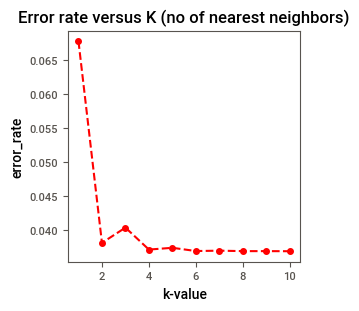

In [419]:
# Finding Best "K" Value in KNN Classifier
plt.figure(figsize=(3,3))
plt.plot(range(1,11),error_rate,color="red",linestyle="dashed",marker='o',markersize=4)
plt.title("Error rate versus K (no of nearest neighbors)")
plt.xlabel("k-value")
plt.ylabel("error_rate")
plt.show()

In [420]:
# KNN Classifier 
knn_model=KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train) # train model
y_pred_KNN=knn_model.predict(X_test) # predicting the model

# EVALUATION OF KNN CLASSIFIER

In [421]:
# Clasification Report Without SMOTE
print(classification_report(y_test,y_pred_KNN))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    143311
           1       0.10      0.00      0.00      5492

    accuracy                           0.96    148803
   macro avg       0.53      0.50      0.49    148803
weighted avg       0.93      0.96      0.94    148803



In [422]:
# Finding "ROC_AUC SCORE" In KNN Classifier
from sklearn.metrics import roc_curve,auc
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,y_pred_KNN)
roc_auc_score=auc(false_positive_rate,true_positive_rate)
print(roc_auc_score)

0.5005228157986213


In [423]:
pd.crosstab(y_test,y_pred_KNN)

col_0        0   1
target            
0       143226  85
1         5483   9

*** Accuracy: 96% ***

*** ROC: 50% ***

## KNN USING SMOTE

In [424]:
# Import KNN Library
from sklearn.neighbors import KNeighborsClassifier
# create empty list to store error values
error_rate=[]

for i in range(1,11):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(X_smote,y_smote)
    y_pred=model.predict(X_test)
    error_rate.append(np.mean(y_pred!=y_test))
error_rate

[0.19476085831602857,
 0.1694589490803277,
 0.2668965007425926,
 0.23854357775044857,
 0.31200983851132036,
 0.283522509626822,
 0.34381027264235264,
 0.3181387472026774,
 0.3688568106825803,
 0.34467719064803803]

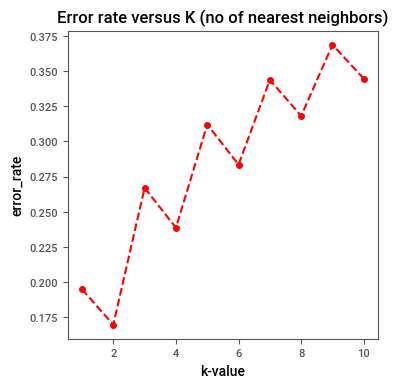

In [425]:
# Finding best 'K' Vlaue In KNN Classifier 
plt.figure(figsize=(4,4))
plt.plot(range(1,11),error_rate,color="red",linestyle="dashed",marker='o',markersize=4)
plt.title("Error rate versus K (no of nearest neighbors)")
plt.xlabel("k-value")
plt.ylabel("error_rate")
plt.show()

# EVALUATION OF KNN USING SMOTE

In [426]:
# Evaluation of KNN Using SMOTE
knn_model=KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_smote,y_smote)
y_pred_KNN_S=knn_model.predict(X_test)

In [427]:
print(classification_report(y_test,y_pred_KNN_S))

              precision    recall  f1-score   support

           0       0.96      0.83      0.89    143311
           1       0.04      0.19      0.07      5492

    accuracy                           0.81    148803
   macro avg       0.50      0.51      0.48    148803
weighted avg       0.93      0.81      0.86    148803



In [428]:
# Confusion Matrix
pd.crosstab(y_test,y_pred_KNN_S)

col_0        0      1
target               
0       118776  24535
1         4446   1046

In [429]:
# Finding "ROC_AUC_SCORE"
from sklearn.metrics import roc_curve,auc
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,y_pred_KNN_S)
roc_auc_score=auc(false_positive_rate,true_positive_rate)
print(roc_auc_score)

0.5096288775556416


In [430]:
# Confution Matrix In KNN Classifier With SMOTE
pd.crosstab(y_test,y_pred_KNN_S)

col_0        0      1
target               
0       118776  24535
1         4446   1046

In [ ]:
*** Accuracy: 81% ***

- when k value is 3 the accuracy is 73% 
- when k value is 5 the accuracy is 69% 
- when k value is 7 the accuracy is 66% 
- when k value is 9 the accuracy is 63% 
- ROC: 51%

# DECISION TREE

In [461]:
# Using Decision Tree Method
from sklearn.tree import DecisionTreeClassifier

tree=DecisionTreeCsslassifier()

tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [462]:
# Predicting Decision Tree Method
y_train_pred_DT=tree.predict(X_train)

In [463]:
y_train_pred_DT

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [464]:
y_test_pred_DT=tree.predict(X_test)

In [465]:
y_test_pred_DT

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

# EVALUATION OF DECISION TREE

In [466]:
# Evaluating Decision Tree Without SMOTE
print(classification_report(y_train,y_train_pred_DT))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    430240
           1       1.00      1.00      1.00     16169

    accuracy                           1.00    446409
   macro avg       1.00      1.00      1.00    446409
weighted avg       1.00      1.00      1.00    446409



In [467]:
# Confusion Matrics in Decision Tree Without SMOTE
pd.crosstab(y_train,y_train_pred_DT)

col_0        0      1
target               
0       430240      0
1            0  16169

In [468]:
# Finding Classificatin Reports In Decision Tree
print(classification_report(y_test,y_test_pred_DT))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96    143311
           1       0.05      0.06      0.05      5492

    accuracy                           0.92    148803
   macro avg       0.50      0.51      0.51    148803
weighted avg       0.93      0.92      0.92    148803



In [469]:
# Finding Accuracy In Decision Tree
accuracy_DT=accuracy_score(y_test,y_test_pred_DT)
accuracy_DT

0.9184559451086336

In [470]:
# Finding f1_score In Decision Tree
f1_DT=f1_score(y_test,y_test_pred_DT)
f1_DT

0.05277127244340359

In [471]:
pd.crosstab(y_test,y_test_pred_DT)

col_0        0     1
target              
0       136331  6980
1         5154   338

*** Accuracy: 92% ***

# DT USING HYPER PARAMETER TUNING

In [417]:
from sklearn.model_selection import GridSearchCV

In [418]:
#creating dictionary--> key value pair of hyperparameters having key as parameter and values as its values
params = {
    "criterion":("gini", "entropy"), #quality of split
    "splitter":("best", "random"), # searches the features for a split
    "max_depth":(list(range(1, 20))), #depth of tree range from 1 to 19
    "min_samples_split":[2, 3, 4],    #the minimum number of samples required to split internal node
    "min_samples_leaf":list(range(1, 20)),#minimum number of samples required to be at a leaf node,we are passing list which is range from 1 to 19 
}


tree_clf = DecisionTreeClassifier(random_state=3)#object creation for decision tree with random state 3
tree_cv = GridSearchCV(tree_clf, params, scoring="f1", n_jobs=-1, verbose=1, cv=3)
#passing model to gridsearchCV ,
#tree_clf-->model
#params---->hyperparametes(dictionary we created)
#scoring--->performance matrix to check performance
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.
#verbose=Controls the verbosity: the higher, the more messages.
#>1 : the computation time for each fold and parameter candidate is displayed;
#>2 : the score is also displayed;
#>3 : the fold and candidate parameter indexes are also displayed together with the starting time of the computation.
#cv------> number of flods




tree_cv.fit(X_train,y_train)#training data on gridsearch cv
best_params = tree_cv.best_params_#it will give you best parameters 
print(f"Best paramters: {best_params})")#printing  best parameters



Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best paramters: {'criterion': 'gini', 'max_depth': 19, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'})


In [472]:
Bestparamters: ({'criterion': 'gini', 'max_depth': 19, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'})

In [ ]:
# finding best parameter
tree_cv.best_params_

In [ ]:
# finding best score
tree_cv.best_score_

In [473]:
# imputing best parameter
dt1=DecisionTreeClassifier(criterion = 'gini', max_depth = 19, min_samples_leaf = 1, min_samples_split = 2, splitter = 'random')

In [474]:
dt1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=19, splitter='random')

In [475]:
# predicting
y_hat1=dt1.predict(X_test)
y_hat1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# EVALUATION OF DECISION TREE USING HYPERPARAMETER TUNING

In [476]:
# checking accuracy
acc_DT_HYPER=accuracy_score(y_test,y_hat1)
acc_DT_HYPER

0.9465669374945398

In [477]:
# f1_score
test_f1=f1_score(y_test,y_hat1)
test_f1

0.037292650441942125

In [478]:
# Checking Classification Report
print(classification_report(y_test,y_hat1))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97    143311
           1       0.06      0.03      0.04      5492

    accuracy                           0.95    148803
   macro avg       0.51      0.50      0.50    148803
weighted avg       0.93      0.95      0.94    148803



In [479]:
# checking confusion matrix
pd.crosstab(y_test,y_hat1)

col_0        0     1
target              
0       140698  2613
1         5338   154

*** Accuracy: 95% ***

# DECISION TREE USING SMOTE TECHNIQE

In [480]:
# fit the decision tree model using the smote
tree.fit(X_smote,y_smote)

DecisionTreeClassifier()

In [481]:
#predict the model
y_smote_pred_DT=tree.predict(X_smote)

In [482]:
y_smote_pred_DT

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [483]:
y_test_pred_DT_S=tree.predict(X_test)

In [484]:
y_test_pred_DT

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

# EVALUATION OF DECITION TREE USING SMOTE

In [485]:
# classification report using smote
print(classification_report(y_smote,y_smote_pred_DT))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    430240
           1       1.00      1.00      1.00    430240

    accuracy                           1.00    860480
   macro avg       1.00      1.00      1.00    860480
weighted avg       1.00      1.00      1.00    860480



In [486]:
# confusion matrix using smote
pd.crosstab(y_smote,y_smote_pred_DT)

col_0        0       1
target                
0       430240       0
1            0  430240

In [487]:
print(classification_report(y_test,y_test_pred_DT_S))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95    143311
           1       0.04      0.08      0.05      5492

    accuracy                           0.90    148803
   macro avg       0.50      0.50      0.50    148803
weighted avg       0.93      0.90      0.91    148803



In [488]:
accuracy_DT_S=accuracy_score(y_test,y_test_pred_DT_S)
accuracy_DT_S

0.9008823746833061

In [489]:
f1_DT=f1_score(y_test,y_test_pred_DT_S)
f1_DT

0.054490672479005076

In [490]:
pd.crosstab(y_test,y_test_pred_DT_S)

col_0        0     1
target              
0       133629  9682
1         5067   425

*** Accuracy: 90% ***

# RANDOM FOREST

In [491]:
from sklearn.ensemble import RandomForestClassifier#importing randomforest

rf_clf = RandomForestClassifier(n_estimators=100)#object creation ,taking 100 decision tree in random forest 
rf_clf.fit(X_train,y_train) # train the model

RandomForestClassifier()

In [492]:
y_pred_RANDOM=rf_clf.predict(X_test) # predicting the model

# EVALUATION OF RANDOM FOREST

In [493]:
print(classification_report(y_test,y_pred_RANDOM)) # classification report

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    143311
           1       0.00      0.00      0.00      5492

    accuracy                           0.96    148803
   macro avg       0.48      0.50      0.49    148803
weighted avg       0.93      0.96      0.94    148803



In [494]:
f1_Score=f1_score(y_test,y_pred_RANDOM) # f1 score
f1_Score

0.0

In [498]:
accuracy_RF=accuracy_score(y_test,y_pred_RANDOM) # accuracy
accuracy_RF

0.9630921419595035

*** Accuracy: 96% ***

# RANDOM FOREST USING SMOTE

In [495]:
rf_clf.fit(X_smote,y_smote) # train the model

RandomForestClassifier()

In [496]:
y_pred_RANDOM_S=rf_clf.predict(X_test) # predict the model

# EVALUATION OF RANDOM FOREST USING SMOTE

In [497]:
print(classification_report(y_test,y_pred_RANDOM_S)) # classification report

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    143311
           1       0.05      0.00      0.01      5492

    accuracy                           0.96    148803
   macro avg       0.51      0.50      0.49    148803
weighted avg       0.93      0.96      0.94    148803



In [499]:
accuracy_RF_S=accuracy_score(y_test,y_pred_RANDOM_S) # accuracy
accuracy_RF_S

0.9608206823787154

In [500]:
f_Score=f1_score(y_test,y_pred_RANDOM_S) # f1 score
f_Score

0.006475800954328561

*** Accuracy: 96% ***

# HYPERPARAMETER IN RANDOM FOREST

In [ ]:
#Random Search sets up a grid of hyperparameter values and selects random combinations to train the model and score.
#This allows you to explicitly control the number of parameter combinations that are attempted.
#The number of search iterations is set based on time or resources.
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]#List Comprehension-using for loop in list
max_features = ['auto', 'sqrt']#maximum number of features allowed to try in individual tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]#List Comprehension-using for loop in list
max_depth.append(None) # ADDING A 12th VALUE OF NONE
min_samples_split = [2, 5, 10]#minimum number of samples required to split an internal node
min_samples_leaf = [1, 2, 4]#minimum number of samples required to be at a leaf node.
bootstrap = [True, False]#sampling 

#dictionary for hyperparameters
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf1 = RandomForestClassifier(random_state=42)#model

rf_cv = RandomizedSearchCV(estimator=rf_clf1, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)
#estimator--number of decision tree
#scoring--->performance matrix to check performance
#param_distribution-->hyperparametes(dictionary we created)
#n_iter--->Number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution.default=10
##cv------> number of folds (typical values are 3, 5 or 10)
#verbose=Controls the verbosity: the higher, the more messages.
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.

rf_cv.fit(X_train, y_train)##training data on randomsearch cv
rf_best_params = rf_cv.best_params_##it will give you best parameters 
print(f"Best paramters: {rf_best_params})")

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [ ]:
rf_best_params

In [ ]:
rf_clf2 = RandomForestClassifier()
rf_clf2.fit(X_train, y_train)# training the 
y_predict=rf_clf2.predict(X_test)#testing
f1_score=f1_score(y_test,y_predict)

In [ ]:
f1_score

*** Due to the kernel dead many times so unable to find accurancy in Random forest using Hyperparameter ***

# GRADIANT BOOSTING

In [501]:
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier() # model creation
gbm.fit(X_train,y_train) # train the model

GradientBoostingClassifier()

In [502]:
y_pred_GB=gbm.predict(X_test) # predict the model

In [503]:
y_train_pred=gbm.predict(X_train)
recall_score(y_train,y_train_pred) 

0.00024738697507576226

# EVALUATION OF GRADIANT BOOSTING

In [504]:
accu_scor=accuracy_score(y_test,y_pred_GB) # accuracy score
accu_scor

0.9630921419595035

In [505]:
print(classification_report(y_test,y_pred_GB)) # classification report

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    143311
           1       0.00      0.00      0.00      5492

    accuracy                           0.96    148803
   macro avg       0.48      0.50      0.49    148803
weighted avg       0.93      0.96      0.94    148803



In [506]:
pd.crosstab(y_test,y_pred_GB) # confusion matrix using the crosstab

col_0        0
target        
0       143311
1         5492

*** Accuracy: 96% ***

# GRADIANT BOOSTING USING SMOTE

In [507]:
gbm.fit(X_smote,y_smote) # model creation

GradientBoostingClassifier()

In [508]:
y_pred_GB_S=gbm.predict(X_test) #predict model

# EVALUATION OF GRADIANT BOOSTING USING SMOTE

In [509]:
# classification report
print(classification_report(y_test,y_pred_GB_S))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97    143311
           1       0.05      0.02      0.03      5492

    accuracy                           0.95    148803
   macro avg       0.51      0.50      0.50    148803
weighted avg       0.93      0.95      0.94    148803



*** Accuracy: 95% ***

# XTREAM GRADIANT BOOSTING (XGBOOSTING)

In [ ]:
import xgboost

In [510]:
from xgboost import XGBClassifier#importing the model library
xgb_c=XGBClassifier() ## model creation
xgb_c.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [511]:
y_hat=xgb_c.predict(X_test) # predict the model

# EVALUATION OF XGBOOSTING

In [512]:
print(classification_report(y_test,y_hat)) # classification report

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    143311
           1       0.20      0.00      0.00      5492

    accuracy                           0.96    148803
   macro avg       0.58      0.50      0.49    148803
weighted avg       0.93      0.96      0.94    148803



In [513]:
accu_scor=accuracy_score(y_test,y_hat) # Accuracy Score
accu_scor

0.9630719810756504

In [515]:
f1_score=f1_score(y_test,y_hat) # f1 score
f1_score

0.00036383481899217757

# XGBOOSTING USING SMOTE

In [516]:
from xgboost import XGBClassifier#importing the model library
xgb_c=XGBClassifier() ## model creation
xgb_c.fit(X_train,y_train) # Train the model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [517]:
y_hat=xgb_c.predict(X_test) # predict the model

# EVALUATION OF XGBOOSTING USING SMOTE

In [ ]:
print(classification_report(y_test,y_hat))

In [521]:
accu_scor=accuracy_score(y_test,y_hat)
accu_scor

0.9630719810756504

In [ ]:
*** Accuracy: 96% ****

# XGBOOSTING USING HYPERPARAMETER TUNING

In [474]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}

XGB=XGBClassifier(random_state=42,verbosity=0,silent=0)
rcv= RandomizedSearchCV(estimator=XGB, scoring='f1',param_distributions=param_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)
                               
#estimator--number of decision tree
#scoring--->performance matrix to check performance
#param_distribution-->hyperparametes(dictionary we created)
#n_iter--->Number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution.default=10
##cv------> number of flods
#verbose=Controls the verbosity: the higher, the more messages.
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.
                        
rcv.fit(X_train, y_train)##training data on randomsearch cv
cv_best_params = rcv.best_params_##it will give you best parameters 
print(f"Best paramters: {cv_best_params})")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'reg_lambda': 0.4, 'reg_alpha': 0.1, 'n_estimators': 50, 'max_depth': 10, 'learning_rate': 0.7, 'gamma': 12.8})


In [832]:
XGB2=XGBClassifier(reg_lambda= 0.4, reg_alpha= 0.1, n_estimators= 50, max_depth= 10, learning_rate= 0.7, gamma= 12.8)
XGB2.fit(X_train, y_train) # train the model
y_predict=XGB2.predict(X_test) # predict the model

In [833]:
f1_score=f1_score(y_predict,y_test) # f1 score

In [834]:
f1_score

0.010314423556812512

In [835]:
print(classification_report(y_test,y_predict)) # classification report

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    143311
           1       0.06      0.01      0.01      5492

    accuracy                           0.96    148803
   macro avg       0.51      0.50      0.49    148803
weighted avg       0.93      0.96      0.94    148803



*** Accuracy:96% ***

# BAGGING

## BAGGING UNSING KNN

In [546]:
from sklearn.neighbors import KNeighborsClassifier#USING KNN
KNN1=KNeighborsClassifier() # model creation
KNN1.fit(X_train,y_train)  # fitting the model
y_hat_knn=KNN1.predict(X_test) # predict the model

In [548]:
y_train_pred= KNN1.predict(X_train) # predict the model

In [552]:
# classification report
print(classification_report(y_test,y_hat_knn))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    143311
           1       0.10      0.00      0.00      5492

    accuracy                           0.96    148803
   macro avg       0.53      0.50      0.49    148803
weighted avg       0.93      0.96      0.94    148803



In [553]:
# confusion matrix
pd.crosstab(y_test,y_hat_knn)

col_0        0   1
target            
0       143226  85
1         5483   9

## BAGGING

In [549]:
from sklearn.ensemble import BaggingClassifier#import bagging 
model_bagg1=BaggingClassifier(base_estimator=KNN1,n_estimators=20) ## model objet creation
#base_estimator---> algorithm which you want to pass
#n_estimotors-----> number of base learners
model_bagg1.fit(X_train,y_train) ## fitting the model
y_hat_bagg=model_bagg1.predict(X_test) ## getting the prediction

In [554]:
# confusion matrix
cm=pd.crosstab(y_test,y_hat_bagg)
cm

col_0        0   1
target            
0       143230  81
1         5485   7

In [555]:
# classification report
print(classification_report(y_test,y_hat_bagg))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    143311
           1       0.08      0.00      0.00      5492

    accuracy                           0.96    148803
   macro avg       0.52      0.50      0.49    148803
weighted avg       0.93      0.96      0.94    148803



*** Accuracy: 96% ***

## USING SUPPOR VECTOR MACHINE(SVM)

In [551]:
from sklearn.svm import SVC
SVC = SVC() # model creation
SVC.fit(X_train,y_train) # train the model

SVC()

In [876]:
y_test_pred_SVC=SVC.predict(X_test) # predict the model

In [877]:
y_train_pred_SVC=SVC.predict(X_train) # predict the model

## EVALVATION OF SUPPORT VECTOR MACHINE(SVM)

In [878]:
# classification report
print(classification_report(y_train,y_train_pred_SVC))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    430240
           1       0.00      0.00      0.00     16169

    accuracy                           0.96    446409
   macro avg       0.48      0.50      0.49    446409
weighted avg       0.93      0.96      0.95    446409



In [879]:
# confusion matrix
pd.crosstab(y_train,y_train_pred_SVC)

col_0        0
target        
0       430240
1        16169

In [880]:
# classification report
print(classification_report(y_test,y_test_pred_SVC))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    143311
           1       0.00      0.00      0.00      5492

    accuracy                           0.96    148803
   macro avg       0.48      0.50      0.49    148803
weighted avg       0.93      0.96      0.94    148803



In [881]:
# confusion matrix
pd.crosstab(y_test,y_test_pred_SVC)

col_0        0
target        
0       143311
1         5492

*** Accuracy: 96% ***

# Task 2:-
 
## Suggestions to the Insurance market team to make  customers  buy the product. 

# Conclusion : -


###### Here's a summary of the accuracy scores for the models:

* 1) Logistic Regression: 0.96 (96%)

* 2) Logistic Regression Using SMOTE: 0.86 (86%)

* 3) K_NEAREST NAIGHBORS(K=5): 0.96 (96%)

* 4) K_NEAREST NAIGHBORS Using SMOTE(K=1,3,5,7,9): 0.81 (81%), 0.73 (73%), 0.69 (69%), 0.66 (66%), 0.63 (63%)

* 5) Decision Tree: 0.92 (92%)

* 6) Decision Tree Using SMOTE: 0.90 (90%)

* 7) Decision Tree Hyperparameter Tuning: 0.95 (95%)

* 8) Random Forest: 0.96 (96%)

* 9) Random Forest Using SMOTE: 0.96 (96%)

* 10) Greadiant Boosting : 0.96 (96%)

* 11) Greadiant Boosting Using SMOTE : 0.95 (95%)

* 12) XGBoosting : 0.96 (96%)

* 13) XGBoosting Using SMOTE : 

* 14) XGBoosting Using Hyperparameter Tuning : 0.96 (96%)

* 15) Bagging Using KNN(Base Learner) : 0.96 (96%)

* 16) Bagging : 0.96(96%)

* 17) Support Vector Machine (SVM): 0.96 (96%)



###### Your conclusion could emphasize the following points:

***Among the above model, as per my opinion we can predict the new data with Decision tree (using hyperparmeter) with best parameter [criterion = 'gini', max_depth = 19, min_samples_leaf = 1, min_samples_split = 2, splitter = 'random'] since the accuracy score 95% and model is genralized model. ***
